In [1]:
#installing the required packages for google colab
!pip install https://github.com/nithinmurali/pygsheets/archive/master.zip
!apt-get -qq install -y graphviz && pip install -q pydot

     | 112kB 5.1MB/s


In [2]:
#authorize 1
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpuuwosfv5/pubring.gpg' created
gpg: /tmp/tmpuuwosfv5/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [0]:
#authorize 2
!pip install -U -q PyDrive ## you will have install for every colab session
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import sklearn
import os
import subprocess
import scipy
import tensorflow as tf
import math
from tensorflow.python.framework import ops
from scipy import stats
import pydot
import matplotlib.pyplot as plt
import pygsheets

In [5]:
#@title Default title text
import keras
from keras.models import Sequential
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.layers import Dense
from keras.utils import plot_model
from keras.initializers import *
from keras.optimizers import *
from keras import losses



Using TensorFlow backend.


In [6]:
#accessing the drive
!mkdir -p drive
!google-drive-ocamlfuse drive


fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
#loading the google sheets
gc = pygsheets.authorize(outh_file='drive/Colab Notebooks/client_secret_430362481330-rp2r1tr6c5p8ef3q3ip4vfhtfabmqehf.apps.googleusercontent.com.json',outh_nonlocal=True)

In [0]:
# Open spreadsheet and then workseet
sh = gc.open('batch size analysis')
wks = sh.sheet1

In [0]:
#loading the dataset from drive to colab
imp = drive.CreateFile({'id':'1Wcf0XRJa1R02lvlUhJl7vcvSN9TVWYW0'})
imp.GetContentFile('pima-indians-diabetes.csv')

In [10]:
#colab to pandas
df= pd.read_csv("pima-indians-diabetes.csv")
df.columns = np.arange(9) #rename labels
df

0    1   2   3    4     5      6   7  8
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
5     3   78  50  32   88  31.0  0.248  26  1
6    10  115   0   0    0  35.3  0.134  29  0
7     2  197  70  45  543  30.5  0.158  53  1
8     8  125  96   0    0   0.0  0.232  54  1
9     4  110  92   0    0  37.6  0.191  30  0
10   10  168  74   0    0  38.0  0.537  34  1
11   10  139  80   0    0  27.1  1.441  57  0
12    1  189  60  23  846  30.1  0.398  59  1
13    5  166  72  19  175  25.8  0.587  51  1
14    7  100   0   0    0  30.0  0.484  32  1
15    0  118  84  47  230  45.8  0.551  31  1
16    7  107  74   0    0  29.6  0.254  31  1
17    1  103  30  38   83  43.3  0.183  33  0
18    1  115  70  30   96  34.6  0.529  32  1
19    3  126  88  41  235  39.3  0.704  27  0
20    8   99  84   0    0  35.4  0.388  50  0
21    7  196  90   0    0  39.8  0.451  41  1
22    9  119  80  35    0  29.0  0.263  29  1
23   11  143  94  33  146  36.6  0.254  51  1
24   10  125  70  26  115  31.1  0.205  41  1
25    7  147  76   0    0  39.4  0.257  43  1
26    1   97  66  15  140  23.2  0.487  22  0
27   13  145  82  19  110  22.2  0.245  57  0
28    5  117  92   0    0  34.1  0.337  38  0
29    5  109  75  26    0  36.0  0.546  60  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
737   2   99  60  17  160  36.6  0.453  21  0
738   1  102  74   0    0  39.5  0.293  42  1
739  11  120  80  37  150  42.3  0.785  48  1
740   3  102  44  20   94  30.8  0.400  26  0
741   1  109  58  18  116  28.5  0.219  22  0
742   9  140  94   0    0  32.7  0.734  45  1
743  13  153  88  37  140  40.6  1.174  39  0
744  12  100  84  33  105  30.0  0.488  46  0
745   1  147  94  41    0  49.3  0.358  27  1
746   1   81  74  41   57  46.3  1.096  32  0
747   3  187  70  22  200  36.4  0.408  36  1
748   6  162  62   0    0  24.3  0.178  50  1
749   4  136  70   0    0  31.2  1.182  22  1
750   1  121  78  39   74  39.0  0.261  28  0
751   3  108  62  24    0  26.0  0.223  25  0
752   0  181  88  44  510  43.3  0.222  26  1
753   8  154  78  32    0  32.4  0.443  45  1
754   1  128  88  39  110  36.5  1.057  37  1
755   7  137  90  41    0  32.0  0.391  39  0
756   0  123  72   0    0  36.3  0.258  52  1
757   1  106  76   0    0  37.5  0.197  26  0
758   6  190  92   0    0  35.5  0.278  66  1
759   2   88  58  26   16  28.4  0.766  22  0
760   9  170  74  31    0  44.0  0.403  43  1
761   9   89  62   0    0  22.5  0.142  33  0
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]

In [0]:
X = df.iloc[:,0:8]
Y = df.iloc[:,8]

In [29]:
analysisdf = pd.DataFrame(columns= ["batchsize",
                                    "accuracy"])
l = 0
i = 90 #batch count
analysisdf  

Empty DataFrame
Columns: [batchsize, accuracy]
Index: []

In [30]:
while i < 110:
  from numpy.random import seed 
  seed(1) 
  from tensorflow import set_random_seed 
  set_random_seed(2)
  model = Sequential()
  model.add(Dense(8, input_dim=8, activation='sigmoid', kernel_initializer='RandomUniform'))
  model.add(Dense(4, activation= 'relu'))
  model.add(Dense(1, activation= 'sigmoid'))
  model.compile(loss='poisson', optimizer='RMSProp', metrics=['accuracy'])
  history = model.fit(X, Y, epochs=500, batch_size= i, ) #validation_split=0.33
  scores = model.evaluate(X, Y)
  analysisdf.loc[l,"batchsize"]= i
  analysisdf.loc[l,"accuracy"]= ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  wks.set_dataframe(analysisdf,(1,1))
  l += 1
  i += 1

Epoch 1/500
767/767 [==============================] - 1s 819us/step - loss: 0.7190 - acc: 0.6519
Epoch 2/500
767/767 [==============================] - 0s 57us/step - loss: 0.7082 - acc: 0.6558
Epoch 3/500
767/767 [==============================] - 0s 62us/step - loss: 0.7049 - acc: 0.6545
Epoch 4/500
767/767 [==============================] - 0s 57us/step - loss: 0.7031 - acc: 0.6519
Epoch 5/500
767/767 [==============================] - 0s 64us/step - loss: 0.7024 - acc: 0.6545
Epoch 6/500
767/767 [==============================] - 0s 60us/step - loss: 0.7007 - acc: 0.6519
Epoch 7/500
767/767 [==============================] - 0s 60us/step - loss: 0.7003 - acc: 0.6519
Epoch 8/500
767/767 [==============================] - 0s 59us/step - loss: 0.6989 - acc: 0.6519
Epoch 9/500
767/767 [==============================] - 0s 62us/step - loss: 0.6974 - acc: 0.6519
Epoch 10/500
767/767 [==============================] - 0s 58us/step - loss: 0.6977 - acc: 0.6519
Epoch 11/500
767/767 [======


767/767 [==============================] - 0s 64us/step - loss: 0.6822 - acc: 0.6623
Epoch 28/500
767/767 [==============================] - 0s 60us/step - loss: 0.6807 - acc: 0.6584
Epoch 29/500
767/767 [==============================] - 0s 68us/step - loss: 0.6807 - acc: 0.6728
Epoch 30/500
767/767 [==============================] - 0s 65us/step - loss: 0.6794 - acc: 0.6675
Epoch 31/500
767/767 [==============================] - 0s 60us/step - loss: 0.6786 - acc: 0.6675
Epoch 32/500
767/767 [==============================] - 0s 60us/step - loss: 0.6783 - acc: 0.6754
Epoch 33/500
767/767 [==============================] - 0s 63us/step - loss: 0.6772 - acc: 0.6741
Epoch 34/500
767/767 [==============================] - 0s 62us/step - loss: 0.6758 - acc: 0.6767
Epoch 35/500
767/767 [==============================] - 0s 66us/step - loss: 0.6756 - acc: 0.6806
Epoch 36/500
767/767 [==============================] - 0s 71us/step - loss: 0.6737 - acc: 0.6871
Epoch 37/500
767/767 [==========

767/767 [==============================] - 0s 75us/step - loss: 0.6650 - acc: 0.7184
Epoch 57/500
767/767 [==============================] - 0s 70us/step - loss: 0.6639 - acc: 0.7197
Epoch 58/500
767/767 [==============================] - 0s 69us/step - loss: 0.6630 - acc: 0.7184
Epoch 59/500
767/767 [==============================] - 0s 67us/step - loss: 0.6612 - acc: 0.7210
Epoch 60/500
767/767 [==============================] - 0s 66us/step - loss: 0.6649 - acc: 0.7249
Epoch 61/500
767/767 [==============================] - 0s 75us/step - loss: 0.6605 - acc: 0.7197
Epoch 62/500
767/767 [==============================] - 0s 70us/step - loss: 0.6592 - acc: 0.7145
Epoch 63/500
767/767 [==============================] - 0s 68us/step - loss: 0.6635 - acc: 0.7223
Epoch 64/500
767/767 [==============================] - 0s 73us/step - loss: 0.6601 - acc: 0.7184
Epoch 65/500
767/767 [==============================] - 0s 69us/step - loss: 0.6604 - acc: 0.7262
Epoch 66/500
767/767 [===========

767/767 [==============================] - 0s 78us/step - loss: 0.6531 - acc: 0.7327
Epoch 88/500
767/767 [==============================] - 0s 74us/step - loss: 0.6537 - acc: 0.7366
Epoch 89/500
767/767 [==============================] - 0s 83us/step - loss: 0.6557 - acc: 0.7419
Epoch 90/500
767/767 [==============================] - 0s 71us/step - loss: 0.6508 - acc: 0.7301
Epoch 91/500
767/767 [==============================] - 0s 70us/step - loss: 0.6534 - acc: 0.7458
Epoch 92/500
767/767 [==============================] - 0s 73us/step - loss: 0.6519 - acc: 0.7445
Epoch 93/500
767/767 [==============================] - 0s 68us/step - loss: 0.6544 - acc: 0.7314
Epoch 94/500
767/767 [==============================] - 0s 70us/step - loss: 0.6516 - acc: 0.7392
Epoch 95/500
767/767 [==============================] - 0s 75us/step - loss: 0.6491 - acc: 0.7366
Epoch 96/500
767/767 [==============================] - 0s 71us/step - loss: 0.6533 - acc: 0.7275
Epoch 97/500
767/767 [===========

767/767 [==============================] - 0s 68us/step - loss: 0.6460 - acc: 0.7405
Epoch 119/500
767/767 [==============================] - 0s 79us/step - loss: 0.6457 - acc: 0.7536
Epoch 120/500
767/767 [==============================] - 0s 73us/step - loss: 0.6468 - acc: 0.7445
Epoch 121/500
767/767 [==============================] - 0s 74us/step - loss: 0.6448 - acc: 0.7471
Epoch 122/500
767/767 [==============================] - 0s 75us/step - loss: 0.6428 - acc: 0.7432
Epoch 123/500
767/767 [==============================] - 0s 68us/step - loss: 0.6439 - acc: 0.7432
Epoch 124/500
767/767 [==============================] - 0s 70us/step - loss: 0.6434 - acc: 0.7523
Epoch 125/500
767/767 [==============================] - 0s 78us/step - loss: 0.6493 - acc: 0.7405
Epoch 126/500
767/767 [==============================] - 0s 69us/step - loss: 0.6427 - acc: 0.7536
Epoch 127/500
767/767 [==============================] - 0s 70us/step - loss: 0.6416 - acc: 0.7366
Epoch 128/500
767/767 [=

Epoch 149/500
767/767 [==============================] - 0s 70us/step - loss: 0.6389 - acc: 0.7523
Epoch 150/500
767/767 [==============================] - 0s 71us/step - loss: 0.6422 - acc: 0.7445
Epoch 151/500
767/767 [==============================] - 0s 68us/step - loss: 0.6381 - acc: 0.7588
Epoch 152/500
767/767 [==============================] - 0s 70us/step - loss: 0.6377 - acc: 0.7432
Epoch 153/500
767/767 [==============================] - 0s 78us/step - loss: 0.6361 - acc: 0.7588
Epoch 154/500
767/767 [==============================] - 0s 72us/step - loss: 0.6347 - acc: 0.7562
Epoch 155/500
767/767 [==============================] - 0s 70us/step - loss: 0.6416 - acc: 0.7471
Epoch 156/500
767/767 [==============================] - 0s 69us/step - loss: 0.6353 - acc: 0.7562
Epoch 157/500
767/767 [==============================] - 0s 67us/step - loss: 0.6369 - acc: 0.7575
Epoch 158/500
767/767 [==============================] - 0s 67us/step - loss: 0.6334 - acc: 0.7471
Epoch 159/

Epoch 180/500
767/767 [==============================] - 0s 66us/step - loss: 0.6325 - acc: 0.7679
Epoch 181/500
767/767 [==============================] - 0s 66us/step - loss: 0.6320 - acc: 0.7523
Epoch 182/500
767/767 [==============================] - 0s 72us/step - loss: 0.6308 - acc: 0.7705
Epoch 183/500
767/767 [==============================] - 0s 82us/step - loss: 0.6305 - acc: 0.7575
Epoch 184/500
767/767 [==============================] - 0s 71us/step - loss: 0.6326 - acc: 0.7549
Epoch 185/500
767/767 [==============================] - 0s 67us/step - loss: 0.6266 - acc: 0.7614
Epoch 186/500
767/767 [==============================] - 0s 70us/step - loss: 0.6281 - acc: 0.7549
Epoch 187/500
767/767 [==============================] - 0s 69us/step - loss: 0.6352 - acc: 0.7432
Epoch 188/500
767/767 [==============================] - 0s 69us/step - loss: 0.6302 - acc: 0.7627
Epoch 189/500
767/767 [==============================] - 0s 76us/step - loss: 0.6281 - acc: 0.7575
Epoch 190/

Epoch 211/500
767/767 [==============================] - 0s 70us/step - loss: 0.6225 - acc: 0.7614
Epoch 212/500
767/767 [==============================] - 0s 67us/step - loss: 0.6231 - acc: 0.7640
Epoch 213/500
767/767 [==============================] - 0s 67us/step - loss: 0.6225 - acc: 0.7705
Epoch 214/500
767/767 [==============================] - 0s 64us/step - loss: 0.6280 - acc: 0.7536
Epoch 215/500
767/767 [==============================] - 0s 65us/step - loss: 0.6198 - acc: 0.7692
Epoch 216/500
767/767 [==============================] - 0s 66us/step - loss: 0.6275 - acc: 0.7601
Epoch 217/500
767/767 [==============================] - 0s 70us/step - loss: 0.6217 - acc: 0.7744
Epoch 218/500
767/767 [==============================] - 0s 69us/step - loss: 0.6251 - acc: 0.7692
Epoch 219/500
767/767 [==============================] - 0s 68us/step - loss: 0.6216 - acc: 0.7666
Epoch 220/500
767/767 [==============================] - 0s 68us/step - loss: 0.6240 - acc: 0.7588
Epoch 221/

Epoch 242/500
767/767 [==============================] - 0s 66us/step - loss: 0.6156 - acc: 0.7836
Epoch 243/500
767/767 [==============================] - 0s 65us/step - loss: 0.6216 - acc: 0.7627
Epoch 244/500
767/767 [==============================] - 0s 66us/step - loss: 0.6161 - acc: 0.7692
Epoch 245/500
767/767 [==============================] - 0s 64us/step - loss: 0.6181 - acc: 0.7640
Epoch 246/500
767/767 [==============================] - 0s 66us/step - loss: 0.6172 - acc: 0.7692
Epoch 247/500
767/767 [==============================] - 0s 75us/step - loss: 0.6144 - acc: 0.7679
Epoch 248/500
767/767 [==============================] - 0s 67us/step - loss: 0.6216 - acc: 0.7823
Epoch 249/500
767/767 [==============================] - 0s 70us/step - loss: 0.6131 - acc: 0.7718
Epoch 250/500
767/767 [==============================] - 0s 69us/step - loss: 0.6171 - acc: 0.7731
Epoch 251/500
767/767 [==============================] - 0s 66us/step - loss: 0.6138 - acc: 0.7718
Epoch 252/

Epoch 273/500
767/767 [==============================] - 0s 69us/step - loss: 0.6109 - acc: 0.7797
Epoch 274/500
767/767 [==============================] - 0s 67us/step - loss: 0.6162 - acc: 0.7731
Epoch 275/500
767/767 [==============================] - 0s 70us/step - loss: 0.6132 - acc: 0.7862
Epoch 276/500
767/767 [==============================] - 0s 82us/step - loss: 0.6061 - acc: 0.7797
Epoch 277/500
767/767 [==============================] - 0s 70us/step - loss: 0.6104 - acc: 0.7718
Epoch 278/500
767/767 [==============================] - 0s 72us/step - loss: 0.6141 - acc: 0.7718
Epoch 279/500
767/767 [==============================] - 0s 64us/step - loss: 0.6117 - acc: 0.7705
Epoch 280/500
767/767 [==============================] - 0s 67us/step - loss: 0.6112 - acc: 0.7718
Epoch 281/500
767/767 [==============================] - 0s 72us/step - loss: 0.6091 - acc: 0.7692
Epoch 282/500
767/767 [==============================] - 0s 78us/step - loss: 0.6102 - acc: 0.7888
Epoch 283/

Epoch 304/500
767/767 [==============================] - 0s 72us/step - loss: 0.6106 - acc: 0.7757
Epoch 305/500
767/767 [==============================] - 0s 77us/step - loss: 0.6027 - acc: 0.7810
Epoch 306/500
767/767 [==============================] - 0s 66us/step - loss: 0.6137 - acc: 0.7810
Epoch 307/500
767/767 [==============================] - 0s 63us/step - loss: 0.6053 - acc: 0.7784
Epoch 308/500
767/767 [==============================] - 0s 70us/step - loss: 0.6054 - acc: 0.7875
Epoch 309/500
767/767 [==============================] - 0s 70us/step - loss: 0.6062 - acc: 0.7771
Epoch 310/500
767/767 [==============================] - 0s 73us/step - loss: 0.6092 - acc: 0.7836
Epoch 311/500
767/767 [==============================] - 0s 76us/step - loss: 0.6096 - acc: 0.7810
Epoch 312/500
767/767 [==============================] - 0s 70us/step - loss: 0.6035 - acc: 0.7757
Epoch 313/500
767/767 [==============================] - 0s 70us/step - loss: 0.6145 - acc: 0.7653
Epoch 314/

Epoch 335/500
767/767 [==============================] - 0s 81us/step - loss: 0.6066 - acc: 0.7757
Epoch 336/500
767/767 [==============================] - 0s 68us/step - loss: 0.6068 - acc: 0.7731
Epoch 337/500
767/767 [==============================] - 0s 69us/step - loss: 0.6042 - acc: 0.7836
Epoch 338/500
767/767 [==============================] - 0s 71us/step - loss: 0.6108 - acc: 0.7757
Epoch 339/500
767/767 [==============================] - 0s 67us/step - loss: 0.5996 - acc: 0.7875
Epoch 340/500
767/767 [==============================] - 0s 68us/step - loss: 0.6014 - acc: 0.7901
Epoch 341/500
767/767 [==============================] - 0s 77us/step - loss: 0.6025 - acc: 0.7810
Epoch 342/500
767/767 [==============================] - 0s 66us/step - loss: 0.6070 - acc: 0.7771
Epoch 343/500
767/767 [==============================] - 0s 67us/step - loss: 0.6025 - acc: 0.7836
Epoch 344/500
767/767 [==============================] - 0s 72us/step - loss: 0.6152 - acc: 0.7510
Epoch 345/

Epoch 366/500
767/767 [==============================] - 0s 68us/step - loss: 0.5978 - acc: 0.7914
Epoch 367/500
767/767 [==============================] - 0s 68us/step - loss: 0.5967 - acc: 0.7888
Epoch 368/500
767/767 [==============================] - 0s 76us/step - loss: 0.6080 - acc: 0.7614
Epoch 369/500
767/767 [==============================] - 0s 64us/step - loss: 0.5966 - acc: 0.7862
Epoch 370/500
767/767 [==============================] - 0s 65us/step - loss: 0.6017 - acc: 0.7731
Epoch 371/500
767/767 [==============================] - 0s 67us/step - loss: 0.6002 - acc: 0.7810
Epoch 372/500
767/767 [==============================] - 0s 65us/step - loss: 0.6013 - acc: 0.7823
Epoch 373/500
767/767 [==============================] - 0s 78us/step - loss: 0.5994 - acc: 0.7953
Epoch 374/500
767/767 [==============================] - 0s 70us/step - loss: 0.5980 - acc: 0.7888
Epoch 375/500
767/767 [==============================] - 0s 67us/step - loss: 0.5918 - acc: 0.7823
Epoch 376/

Epoch 397/500
767/767 [==============================] - 0s 71us/step - loss: 0.6007 - acc: 0.7849
Epoch 398/500
767/767 [==============================] - 0s 69us/step - loss: 0.5978 - acc: 0.7810
Epoch 399/500
767/767 [==============================] - 0s 66us/step - loss: 0.5942 - acc: 0.7797
Epoch 400/500
767/767 [==============================] - 0s 65us/step - loss: 0.6060 - acc: 0.7744
Epoch 401/500
767/767 [==============================] - 0s 66us/step - loss: 0.5929 - acc: 0.7836
Epoch 402/500
767/767 [==============================] - 0s 67us/step - loss: 0.5985 - acc: 0.7849
Epoch 403/500
767/767 [==============================] - 0s 77us/step - loss: 0.5921 - acc: 0.7771
Epoch 404/500
767/767 [==============================] - 0s 69us/step - loss: 0.6096 - acc: 0.7471
Epoch 405/500
767/767 [==============================] - 0s 64us/step - loss: 0.5974 - acc: 0.7771
Epoch 406/500
767/767 [==============================] - 0s 65us/step - loss: 0.5957 - acc: 0.7810
Epoch 407/

Epoch 428/500
767/767 [==============================] - 0s 78us/step - loss: 0.5926 - acc: 0.7744
Epoch 429/500
767/767 [==============================] - 0s 72us/step - loss: 0.5986 - acc: 0.7927
Epoch 430/500
767/767 [==============================] - 0s 72us/step - loss: 0.5988 - acc: 0.7875
Epoch 431/500
767/767 [==============================] - 0s 69us/step - loss: 0.5933 - acc: 0.7784
Epoch 432/500
767/767 [==============================] - 0s 70us/step - loss: 0.5951 - acc: 0.7731
Epoch 433/500
767/767 [==============================] - 0s 69us/step - loss: 0.5922 - acc: 0.7797
Epoch 434/500
767/767 [==============================] - 0s 78us/step - loss: 0.5957 - acc: 0.7823
Epoch 435/500
767/767 [==============================] - 0s 71us/step - loss: 0.5894 - acc: 0.7744
Epoch 436/500
767/767 [==============================] - 0s 64us/step - loss: 0.6023 - acc: 0.7692
Epoch 437/500
767/767 [==============================] - 0s 64us/step - loss: 0.5951 - acc: 0.7797
Epoch 438/

Epoch 459/500
767/767 [==============================] - 0s 68us/step - loss: 0.5963 - acc: 0.7705
Epoch 460/500
767/767 [==============================] - 0s 64us/step - loss: 0.5906 - acc: 0.7849
Epoch 461/500
767/767 [==============================] - 0s 68us/step - loss: 0.6064 - acc: 0.7705
Epoch 462/500
767/767 [==============================] - 0s 64us/step - loss: 0.5980 - acc: 0.7797
Epoch 463/500
767/767 [==============================] - 0s 66us/step - loss: 0.5916 - acc: 0.7797
Epoch 464/500
767/767 [==============================] - 0s 73us/step - loss: 0.5931 - acc: 0.7914
Epoch 465/500
767/767 [==============================] - 0s 68us/step - loss: 0.6007 - acc: 0.7888
Epoch 466/500
767/767 [==============================] - 0s 69us/step - loss: 0.5973 - acc: 0.7823
Epoch 467/500
767/767 [==============================] - 0s 66us/step - loss: 0.5950 - acc: 0.7784
Epoch 468/500
767/767 [==============================] - 0s 64us/step - loss: 0.5896 - acc: 0.7888
Epoch 469/

767/767 [==============================] - 0s 69us/step - loss: 0.5932 - acc: 0.7875
Epoch 490/500
767/767 [==============================] - 0s 67us/step - loss: 0.5947 - acc: 0.7888
Epoch 491/500
767/767 [==============================] - 0s 67us/step - loss: 0.5870 - acc: 0.7901
Epoch 492/500
767/767 [==============================] - 0s 67us/step - loss: 0.6030 - acc: 0.7705
Epoch 493/500
767/767 [==============================] - 0s 71us/step - loss: 0.5947 - acc: 0.7810
Epoch 494/500
767/767 [==============================] - 0s 64us/step - loss: 0.5904 - acc: 0.7914
Epoch 495/500
767/767 [==============================] - 0s 87us/step - loss: 0.5991 - acc: 0.7849
Epoch 496/500
767/767 [==============================] - 0s 65us/step - loss: 0.5965 - acc: 0.7784
Epoch 497/500
767/767 [==============================] - 0s 68us/step - loss: 0.5935 - acc: 0.7849
Epoch 498/500
767/767 [==============================] - 0s 68us/step - loss: 0.5900 - acc: 0.7679
Epoch 499/500
767/767 [=

Epoch 19/500
767/767 [==============================] - 0s 70us/step - loss: 0.6899 - acc: 0.6519
Epoch 20/500
767/767 [==============================] - 0s 71us/step - loss: 0.6888 - acc: 0.6519
Epoch 21/500
767/767 [==============================] - 0s 72us/step - loss: 0.6876 - acc: 0.6519
Epoch 22/500
767/767 [==============================] - 0s 71us/step - loss: 0.6864 - acc: 0.6558
Epoch 23/500
767/767 [==============================] - 0s 74us/step - loss: 0.6860 - acc: 0.6519
Epoch 24/500
767/767 [==============================] - 0s 80us/step - loss: 0.6847 - acc: 0.6519
Epoch 25/500
767/767 [==============================] - 0s 74us/step - loss: 0.6835 - acc: 0.6532
Epoch 26/500
767/767 [==============================] - 0s 70us/step - loss: 0.6834 - acc: 0.6532
Epoch 27/500
767/767 [==============================] - 0s 71us/step - loss: 0.6831 - acc: 0.6636
Epoch 28/500
767/767 [==============================] - 0s 71us/step - loss: 0.6808 - acc: 0.6545
Epoch 29/500
767/767

Epoch 50/500
767/767 [==============================] - 0s 66us/step - loss: 0.6654 - acc: 0.7093
Epoch 51/500
767/767 [==============================] - 0s 67us/step - loss: 0.6670 - acc: 0.7249
Epoch 52/500
767/767 [==============================] - 0s 67us/step - loss: 0.6673 - acc: 0.7210
Epoch 53/500
767/767 [==============================] - 0s 79us/step - loss: 0.6663 - acc: 0.7184
Epoch 54/500
767/767 [==============================] - 0s 66us/step - loss: 0.6635 - acc: 0.7275
Epoch 55/500
767/767 [==============================] - 0s 69us/step - loss: 0.6644 - acc: 0.7158
Epoch 56/500
767/767 [==============================] - 0s 68us/step - loss: 0.6651 - acc: 0.7158
Epoch 57/500
767/767 [==============================] - 0s 69us/step - loss: 0.6654 - acc: 0.7184
Epoch 58/500
767/767 [==============================] - 0s 70us/step - loss: 0.6625 - acc: 0.7158
Epoch 59/500
767/767 [==============================] - 0s 79us/step - loss: 0.6611 - acc: 0.7197
Epoch 60/500
767/767

Epoch 81/500
767/767 [==============================] - 0s 65us/step - loss: 0.6585 - acc: 0.7366
Epoch 82/500
767/767 [==============================] - 0s 65us/step - loss: 0.6552 - acc: 0.7366
Epoch 83/500
767/767 [==============================] - 0s 78us/step - loss: 0.6542 - acc: 0.7275
Epoch 84/500
767/767 [==============================] - 0s 69us/step - loss: 0.6548 - acc: 0.7419
Epoch 85/500
767/767 [==============================] - 0s 65us/step - loss: 0.6550 - acc: 0.7301
Epoch 86/500
767/767 [==============================] - 0s 68us/step - loss: 0.6536 - acc: 0.7353
Epoch 87/500
767/767 [==============================] - 0s 71us/step - loss: 0.6521 - acc: 0.7405
Epoch 88/500
767/767 [==============================] - 0s 68us/step - loss: 0.6542 - acc: 0.7379
Epoch 89/500
767/767 [==============================] - 0s 82us/step - loss: 0.6565 - acc: 0.7379
Epoch 90/500
767/767 [==============================] - 0s 68us/step - loss: 0.6506 - acc: 0.7392
Epoch 91/500
767/767

Epoch 112/500
767/767 [==============================] - 0s 69us/step - loss: 0.6470 - acc: 0.7523
Epoch 113/500
767/767 [==============================] - 0s 68us/step - loss: 0.6491 - acc: 0.7392
Epoch 114/500
767/767 [==============================] - 0s 78us/step - loss: 0.6459 - acc: 0.7536
Epoch 115/500
767/767 [==============================] - 0s 69us/step - loss: 0.6471 - acc: 0.7458
Epoch 116/500
767/767 [==============================] - 0s 72us/step - loss: 0.6463 - acc: 0.7471
Epoch 117/500
767/767 [==============================] - 0s 67us/step - loss: 0.6434 - acc: 0.7340
Epoch 118/500
767/767 [==============================] - 0s 68us/step - loss: 0.6453 - acc: 0.7432
Epoch 119/500
767/767 [==============================] - 0s 78us/step - loss: 0.6449 - acc: 0.7523
Epoch 120/500
767/767 [==============================] - 0s 66us/step - loss: 0.6470 - acc: 0.7445
Epoch 121/500
767/767 [==============================] - 0s 69us/step - loss: 0.6450 - acc: 0.7445
Epoch 122/

Epoch 143/500
767/767 [==============================] - 0s 68us/step - loss: 0.6375 - acc: 0.7575
Epoch 144/500
767/767 [==============================] - 0s 65us/step - loss: 0.6387 - acc: 0.7536
Epoch 145/500
767/767 [==============================] - 0s 76us/step - loss: 0.6441 - acc: 0.7497
Epoch 146/500
767/767 [==============================] - 0s 71us/step - loss: 0.6423 - acc: 0.7458
Epoch 147/500
767/767 [==============================] - 0s 70us/step - loss: 0.6387 - acc: 0.7471
Epoch 148/500
767/767 [==============================] - 0s 64us/step - loss: 0.6383 - acc: 0.7536
Epoch 149/500
767/767 [==============================] - 0s 63us/step - loss: 0.6382 - acc: 0.7471
Epoch 150/500
767/767 [==============================] - 0s 69us/step - loss: 0.6420 - acc: 0.7484
Epoch 151/500
767/767 [==============================] - 0s 77us/step - loss: 0.6380 - acc: 0.7484
Epoch 152/500
767/767 [==============================] - 0s 70us/step - loss: 0.6370 - acc: 0.7419
Epoch 153/

Epoch 174/500
767/767 [==============================] - 0s 77us/step - loss: 0.6339 - acc: 0.7588
Epoch 175/500
767/767 [==============================] - 0s 69us/step - loss: 0.6336 - acc: 0.7640
Epoch 176/500
767/767 [==============================] - 0s 66us/step - loss: 0.6330 - acc: 0.7523
Epoch 177/500
767/767 [==============================] - 0s 70us/step - loss: 0.6312 - acc: 0.7614
Epoch 178/500
767/767 [==============================] - 0s 68us/step - loss: 0.6366 - acc: 0.7575
Epoch 179/500
767/767 [==============================] - 0s 66us/step - loss: 0.6310 - acc: 0.7497
Epoch 180/500
767/767 [==============================] - 0s 75us/step - loss: 0.6330 - acc: 0.7614
Epoch 181/500
767/767 [==============================] - 0s 71us/step - loss: 0.6326 - acc: 0.7523
Epoch 182/500
767/767 [==============================] - 0s 76us/step - loss: 0.6329 - acc: 0.7601
Epoch 183/500
767/767 [==============================] - 0s 70us/step - loss: 0.6304 - acc: 0.7640
Epoch 184/

Epoch 204/500
767/767 [==============================] - 0s 67us/step - loss: 0.6268 - acc: 0.7627
Epoch 205/500
767/767 [==============================] - 0s 70us/step - loss: 0.6290 - acc: 0.7549
Epoch 206/500
767/767 [==============================] - 0s 71us/step - loss: 0.6298 - acc: 0.7497
Epoch 207/500
767/767 [==============================] - 0s 68us/step - loss: 0.6271 - acc: 0.7536
Epoch 208/500
767/767 [==============================] - 0s 69us/step - loss: 0.6273 - acc: 0.7536
Epoch 209/500
767/767 [==============================] - 0s 77us/step - loss: 0.6241 - acc: 0.7679
Epoch 210/500
767/767 [==============================] - 0s 68us/step - loss: 0.6267 - acc: 0.7614
Epoch 211/500
767/767 [==============================] - 0s 70us/step - loss: 0.6236 - acc: 0.7627
Epoch 212/500
767/767 [==============================] - 0s 68us/step - loss: 0.6248 - acc: 0.7510
Epoch 213/500
767/767 [==============================] - 0s 67us/step - loss: 0.6277 - acc: 0.7666
Epoch 214/

Epoch 235/500
767/767 [==============================] - 0s 70us/step - loss: 0.6201 - acc: 0.7744
Epoch 236/500
767/767 [==============================] - 0s 73us/step - loss: 0.6247 - acc: 0.7536
Epoch 237/500
767/767 [==============================] - 0s 68us/step - loss: 0.6221 - acc: 0.7718
Epoch 238/500
767/767 [==============================] - 0s 66us/step - loss: 0.6231 - acc: 0.7679
Epoch 239/500
767/767 [==============================] - 0s 68us/step - loss: 0.6193 - acc: 0.7588
Epoch 240/500
767/767 [==============================] - 0s 67us/step - loss: 0.6214 - acc: 0.7784
Epoch 241/500
767/767 [==============================] - 0s 79us/step - loss: 0.6159 - acc: 0.7849
Epoch 242/500
767/767 [==============================] - 0s 69us/step - loss: 0.6202 - acc: 0.7836
Epoch 243/500
767/767 [==============================] - 0s 72us/step - loss: 0.6240 - acc: 0.7523
Epoch 244/500
767/767 [==============================] - 0s 72us/step - loss: 0.6201 - acc: 0.7718
Epoch 245/

Epoch 266/500
767/767 [==============================] - 0s 75us/step - loss: 0.6126 - acc: 0.7797
Epoch 267/500
767/767 [==============================] - 0s 71us/step - loss: 0.6130 - acc: 0.7823
Epoch 268/500
767/767 [==============================] - 0s 70us/step - loss: 0.6127 - acc: 0.7731
Epoch 269/500
767/767 [==============================] - 0s 69us/step - loss: 0.6126 - acc: 0.7757
Epoch 270/500
767/767 [==============================] - 0s 66us/step - loss: 0.6170 - acc: 0.7705
Epoch 271/500
767/767 [==============================] - 0s 70us/step - loss: 0.6170 - acc: 0.7797
Epoch 272/500
767/767 [==============================] - 0s 80us/step - loss: 0.6169 - acc: 0.7575
Epoch 273/500
767/767 [==============================] - 0s 71us/step - loss: 0.6137 - acc: 0.7744
Epoch 274/500
767/767 [==============================] - 0s 66us/step - loss: 0.6160 - acc: 0.7771
Epoch 275/500
767/767 [==============================] - 0s 66us/step - loss: 0.6167 - acc: 0.7692
Epoch 276/

Epoch 297/500
767/767 [==============================] - 0s 68us/step - loss: 0.6122 - acc: 0.7718
Epoch 298/500
767/767 [==============================] - 0s 66us/step - loss: 0.6110 - acc: 0.7784
Epoch 299/500
767/767 [==============================] - 0s 75us/step - loss: 0.6081 - acc: 0.7731
Epoch 300/500
767/767 [==============================] - 0s 68us/step - loss: 0.6167 - acc: 0.7744
Epoch 301/500
767/767 [==============================] - 0s 68us/step - loss: 0.6063 - acc: 0.7718
Epoch 302/500
767/767 [==============================] - 0s 67us/step - loss: 0.6092 - acc: 0.7718
Epoch 303/500
767/767 [==============================] - 0s 65us/step - loss: 0.6070 - acc: 0.7679
Epoch 304/500
767/767 [==============================] - 0s 71us/step - loss: 0.6081 - acc: 0.7862
Epoch 305/500
767/767 [==============================] - 0s 68us/step - loss: 0.6066 - acc: 0.7744
Epoch 306/500
767/767 [==============================] - 0s 75us/step - loss: 0.6155 - acc: 0.7679
Epoch 307/

Epoch 328/500
767/767 [==============================] - 0s 73us/step - loss: 0.6030 - acc: 0.7679
Epoch 329/500
767/767 [==============================] - 0s 61us/step - loss: 0.6017 - acc: 0.7875
Epoch 330/500
767/767 [==============================] - 0s 64us/step - loss: 0.6046 - acc: 0.7797
Epoch 331/500
767/767 [==============================] - 0s 63us/step - loss: 0.6021 - acc: 0.7771
Epoch 332/500
767/767 [==============================] - 0s 66us/step - loss: 0.6037 - acc: 0.7627
Epoch 333/500
767/767 [==============================] - 0s 71us/step - loss: 0.6046 - acc: 0.7692
Epoch 334/500
767/767 [==============================] - 0s 66us/step - loss: 0.6089 - acc: 0.7692
Epoch 335/500
767/767 [==============================] - 0s 67us/step - loss: 0.6077 - acc: 0.7718
Epoch 336/500
767/767 [==============================] - 0s 76us/step - loss: 0.6038 - acc: 0.7731
Epoch 337/500
767/767 [==============================] - 0s 72us/step - loss: 0.6030 - acc: 0.7810
Epoch 338/

Epoch 359/500
767/767 [==============================] - 0s 71us/step - loss: 0.6058 - acc: 0.7914
Epoch 360/500
767/767 [==============================] - 0s 69us/step - loss: 0.6047 - acc: 0.7757
Epoch 361/500
767/767 [==============================] - 0s 73us/step - loss: 0.6030 - acc: 0.7862
Epoch 362/500
767/767 [==============================] - 0s 68us/step - loss: 0.6106 - acc: 0.7731
Epoch 363/500
767/767 [==============================] - 0s 70us/step - loss: 0.6033 - acc: 0.7940
Epoch 364/500
767/767 [==============================] - 0s 70us/step - loss: 0.5999 - acc: 0.7757
Epoch 365/500
767/767 [==============================] - 0s 69us/step - loss: 0.6010 - acc: 0.7901
Epoch 366/500
767/767 [==============================] - 0s 81us/step - loss: 0.6027 - acc: 0.7888
Epoch 367/500
767/767 [==============================] - 0s 70us/step - loss: 0.5997 - acc: 0.7744
Epoch 368/500
767/767 [==============================] - 0s 68us/step - loss: 0.6083 - acc: 0.7653
Epoch 369/

Epoch 390/500
767/767 [==============================] - 0s 68us/step - loss: 0.6049 - acc: 0.7784
Epoch 391/500
767/767 [==============================] - 0s 65us/step - loss: 0.6035 - acc: 0.7849
Epoch 392/500
767/767 [==============================] - 0s 68us/step - loss: 0.6027 - acc: 0.7823
Epoch 393/500
767/767 [==============================] - 0s 72us/step - loss: 0.5964 - acc: 0.7797
Epoch 394/500
767/767 [==============================] - 0s 69us/step - loss: 0.6027 - acc: 0.7784
Epoch 395/500
767/767 [==============================] - 0s 70us/step - loss: 0.5970 - acc: 0.7888
Epoch 396/500
767/767 [==============================] - 0s 79us/step - loss: 0.5954 - acc: 0.7797
Epoch 397/500
767/767 [==============================] - 0s 67us/step - loss: 0.6029 - acc: 0.7810
Epoch 398/500
767/767 [==============================] - 0s 72us/step - loss: 0.5965 - acc: 0.7836
Epoch 399/500
767/767 [==============================] - 0s 70us/step - loss: 0.5975 - acc: 0.7757
Epoch 400/

Epoch 421/500
767/767 [==============================] - 0s 65us/step - loss: 0.5974 - acc: 0.7810
Epoch 422/500
767/767 [==============================] - 0s 75us/step - loss: 0.6001 - acc: 0.7797
Epoch 423/500
767/767 [==============================] - 0s 68us/step - loss: 0.5971 - acc: 0.7914
Epoch 424/500
767/767 [==============================] - 0s 70us/step - loss: 0.5949 - acc: 0.7901
Epoch 425/500
767/767 [==============================] - 0s 70us/step - loss: 0.5976 - acc: 0.7666
Epoch 426/500
767/767 [==============================] - 0s 70us/step - loss: 0.5957 - acc: 0.7901
Epoch 427/500
767/767 [==============================] - 0s 68us/step - loss: 0.5983 - acc: 0.7810
Epoch 428/500
767/767 [==============================] - 0s 68us/step - loss: 0.5909 - acc: 0.7771
Epoch 429/500
767/767 [==============================] - 0s 71us/step - loss: 0.5972 - acc: 0.7940
Epoch 430/500
767/767 [==============================] - 0s 72us/step - loss: 0.6065 - acc: 0.7731
Epoch 431/

767/767 [==============================] - 0s 70us/step - loss: 0.5974 - acc: 0.7927
Epoch 452/500
767/767 [==============================] - 0s 73us/step - loss: 0.5893 - acc: 0.7901
Epoch 453/500
767/767 [==============================] - 0s 69us/step - loss: 0.5991 - acc: 0.7744
Epoch 454/500
767/767 [==============================] - 0s 70us/step - loss: 0.5980 - acc: 0.7823
Epoch 455/500
767/767 [==============================] - 0s 72us/step - loss: 0.5987 - acc: 0.7862
Epoch 456/500
767/767 [==============================] - 0s 69us/step - loss: 0.5908 - acc: 0.7966
Epoch 457/500
767/767 [==============================] - 0s 74us/step - loss: 0.5898 - acc: 0.7927
Epoch 458/500
767/767 [==============================] - 0s 72us/step - loss: 0.5986 - acc: 0.7927
Epoch 459/500
767/767 [==============================] - 0s 79us/step - loss: 0.6026 - acc: 0.7718
Epoch 460/500
767/767 [==============================] - 0s 70us/step - loss: 0.5930 - acc: 0.7823
Epoch 461/500
767/767 [=

Epoch 482/500
767/767 [==============================] - 0s 68us/step - loss: 0.6049 - acc: 0.7810
Epoch 483/500
767/767 [==============================] - 0s 68us/step - loss: 0.5970 - acc: 0.7797
Epoch 484/500
767/767 [==============================] - 0s 70us/step - loss: 0.5893 - acc: 0.7875
Epoch 485/500
767/767 [==============================] - 0s 73us/step - loss: 0.5938 - acc: 0.7705
Epoch 486/500
767/767 [==============================] - 0s 65us/step - loss: 0.5915 - acc: 0.7823
Epoch 487/500
767/767 [==============================] - 0s 71us/step - loss: 0.5871 - acc: 0.7875
Epoch 488/500
767/767 [==============================] - 0s 67us/step - loss: 0.6019 - acc: 0.7705
Epoch 489/500
767/767 [==============================] - 0s 74us/step - loss: 0.5956 - acc: 0.7862
Epoch 490/500
767/767 [==============================] - 0s 68us/step - loss: 0.5966 - acc: 0.7927
Epoch 491/500
767/767 [==============================] - 0s 74us/step - loss: 0.5898 - acc: 0.7914
Epoch 492/

Epoch 12/500
767/767 [==============================] - 0s 71us/step - loss: 0.6948 - acc: 0.6519
Epoch 13/500
767/767 [==============================] - 0s 68us/step - loss: 0.6942 - acc: 0.6519
Epoch 14/500
767/767 [==============================] - 0s 70us/step - loss: 0.6936 - acc: 0.6519
Epoch 15/500
767/767 [==============================] - 0s 68us/step - loss: 0.6934 - acc: 0.6519
Epoch 16/500
767/767 [==============================] - 0s 66us/step - loss: 0.6912 - acc: 0.6519
Epoch 17/500
767/767 [==============================] - 0s 71us/step - loss: 0.6909 - acc: 0.6519
Epoch 18/500
767/767 [==============================] - 0s 68us/step - loss: 0.6894 - acc: 0.6519
Epoch 19/500
767/767 [==============================] - 0s 72us/step - loss: 0.6900 - acc: 0.6519
Epoch 20/500
767/767 [==============================] - 0s 72us/step - loss: 0.6895 - acc: 0.6519
Epoch 21/500
767/767 [==============================] - 0s 70us/step - loss: 0.6877 - acc: 0.6519
Epoch 22/500
767/767

Epoch 43/500
767/767 [==============================] - 0s 70us/step - loss: 0.6708 - acc: 0.6962
Epoch 44/500
767/767 [==============================] - 0s 64us/step - loss: 0.6704 - acc: 0.7119
Epoch 45/500
767/767 [==============================] - 0s 71us/step - loss: 0.6717 - acc: 0.7014
Epoch 46/500
767/767 [==============================] - 0s 82us/step - loss: 0.6681 - acc: 0.7053
Epoch 47/500
767/767 [==============================] - 0s 71us/step - loss: 0.6694 - acc: 0.7093
Epoch 48/500
767/767 [==============================] - 0s 71us/step - loss: 0.6684 - acc: 0.7119
Epoch 49/500
767/767 [==============================] - 0s 67us/step - loss: 0.6682 - acc: 0.7040
Epoch 50/500
767/767 [==============================] - 0s 68us/step - loss: 0.6668 - acc: 0.7040
Epoch 51/500
767/767 [==============================] - 0s 70us/step - loss: 0.6670 - acc: 0.7275
Epoch 52/500
767/767 [==============================] - 0s 73us/step - loss: 0.6666 - acc: 0.7223
Epoch 53/500
767/767

Epoch 74/500
767/767 [==============================] - 0s 68us/step - loss: 0.6575 - acc: 0.7223
Epoch 75/500
767/767 [==============================] - 0s 71us/step - loss: 0.6593 - acc: 0.7236
Epoch 76/500
767/767 [==============================] - 0s 73us/step - loss: 0.6569 - acc: 0.7327
Epoch 77/500
767/767 [==============================] - 0s 89us/step - loss: 0.6561 - acc: 0.7236
Epoch 78/500
767/767 [==============================] - 0s 72us/step - loss: 0.6595 - acc: 0.7197
Epoch 79/500
767/767 [==============================] - 0s 75us/step - loss: 0.6571 - acc: 0.7249
Epoch 80/500
767/767 [==============================] - 0s 70us/step - loss: 0.6553 - acc: 0.7458
Epoch 81/500
767/767 [==============================] - 0s 74us/step - loss: 0.6592 - acc: 0.7419
Epoch 82/500
767/767 [==============================] - 0s 71us/step - loss: 0.6550 - acc: 0.7236
Epoch 83/500
767/767 [==============================] - 0s 67us/step - loss: 0.6551 - acc: 0.7366
Epoch 84/500
767/767

Epoch 105/500
767/767 [==============================] - 0s 71us/step - loss: 0.6516 - acc: 0.7353
Epoch 106/500
767/767 [==============================] - 0s 66us/step - loss: 0.6491 - acc: 0.7432
Epoch 107/500
767/767 [==============================] - 0s 66us/step - loss: 0.6489 - acc: 0.7432
Epoch 108/500
767/767 [==============================] - 0s 74us/step - loss: 0.6501 - acc: 0.7458
Epoch 109/500
767/767 [==============================] - 0s 70us/step - loss: 0.6466 - acc: 0.7432
Epoch 110/500
767/767 [==============================] - 0s 64us/step - loss: 0.6489 - acc: 0.7392
Epoch 111/500
767/767 [==============================] - 0s 77us/step - loss: 0.6490 - acc: 0.7471
Epoch 112/500
767/767 [==============================] - 0s 72us/step - loss: 0.6474 - acc: 0.7458
Epoch 113/500
767/767 [==============================] - 0s 71us/step - loss: 0.6483 - acc: 0.7353
Epoch 114/500
767/767 [==============================] - 0s 66us/step - loss: 0.6483 - acc: 0.7484
Epoch 115/

Epoch 136/500
767/767 [==============================] - 0s 69us/step - loss: 0.6430 - acc: 0.7340
Epoch 137/500
767/767 [==============================] - 0s 66us/step - loss: 0.6418 - acc: 0.7379
Epoch 138/500
767/767 [==============================] - 0s 70us/step - loss: 0.6477 - acc: 0.7471
Epoch 139/500
767/767 [==============================] - 0s 70us/step - loss: 0.6404 - acc: 0.7419
Epoch 140/500
767/767 [==============================] - 0s 71us/step - loss: 0.6432 - acc: 0.7445
Epoch 141/500
767/767 [==============================] - 0s 67us/step - loss: 0.6426 - acc: 0.7458
Epoch 142/500
767/767 [==============================] - 0s 75us/step - loss: 0.6380 - acc: 0.7484
Epoch 143/500
767/767 [==============================] - 0s 70us/step - loss: 0.6384 - acc: 0.7562
Epoch 144/500
767/767 [==============================] - 0s 71us/step - loss: 0.6429 - acc: 0.7484
Epoch 145/500
767/767 [==============================] - 0s 73us/step - loss: 0.6447 - acc: 0.7523
Epoch 146/

Epoch 167/500
767/767 [==============================] - 0s 74us/step - loss: 0.6333 - acc: 0.7471
Epoch 168/500
767/767 [==============================] - 0s 66us/step - loss: 0.6373 - acc: 0.7419
Epoch 169/500
767/767 [==============================] - 0s 70us/step - loss: 0.6367 - acc: 0.7445
Epoch 170/500
767/767 [==============================] - 0s 71us/step - loss: 0.6365 - acc: 0.7601
Epoch 171/500
767/767 [==============================] - 0s 67us/step - loss: 0.6335 - acc: 0.7549
Epoch 172/500
767/767 [==============================] - 0s 72us/step - loss: 0.6339 - acc: 0.7536
Epoch 173/500
767/767 [==============================] - 0s 68us/step - loss: 0.6357 - acc: 0.7405
Epoch 174/500
767/767 [==============================] - 0s 75us/step - loss: 0.6352 - acc: 0.7614
Epoch 175/500
767/767 [==============================] - 0s 70us/step - loss: 0.6358 - acc: 0.7601
Epoch 176/500
767/767 [==============================] - 0s 70us/step - loss: 0.6336 - acc: 0.7523
Epoch 177/

767/767 [==============================] - 0s 68us/step - loss: 0.6308 - acc: 0.7575
Epoch 198/500
767/767 [==============================] - 0s 64us/step - loss: 0.6287 - acc: 0.7757
Epoch 199/500
767/767 [==============================] - 0s 66us/step - loss: 0.6317 - acc: 0.7627
Epoch 200/500
767/767 [==============================] - 0s 67us/step - loss: 0.6285 - acc: 0.7536
Epoch 201/500
767/767 [==============================] - 0s 68us/step - loss: 0.6321 - acc: 0.7601
Epoch 202/500
767/767 [==============================] - 0s 67us/step - loss: 0.6316 - acc: 0.7523
Epoch 203/500
767/767 [==============================] - 0s 77us/step - loss: 0.6280 - acc: 0.7575
Epoch 204/500
767/767 [==============================] - 0s 68us/step - loss: 0.6284 - acc: 0.7562
Epoch 205/500
767/767 [==============================] - 0s 69us/step - loss: 0.6322 - acc: 0.7510
Epoch 206/500
767/767 [==============================] - 0s 67us/step - loss: 0.6317 - acc: 0.7497
Epoch 207/500
767/767 [=

Epoch 228/500
767/767 [==============================] - 0s 70us/step - loss: 0.6209 - acc: 0.7692
Epoch 229/500
767/767 [==============================] - 0s 80us/step - loss: 0.6201 - acc: 0.7875
Epoch 230/500
767/767 [==============================] - 0s 70us/step - loss: 0.6292 - acc: 0.7614
Epoch 231/500
767/767 [==============================] - 0s 72us/step - loss: 0.6217 - acc: 0.7705
Epoch 232/500
767/767 [==============================] - 0s 67us/step - loss: 0.6338 - acc: 0.7549
Epoch 233/500
767/767 [==============================] - 0s 69us/step - loss: 0.6227 - acc: 0.7614
Epoch 234/500
767/767 [==============================] - 0s 66us/step - loss: 0.6213 - acc: 0.7562
Epoch 235/500
767/767 [==============================] - 0s 68us/step - loss: 0.6222 - acc: 0.7718
Epoch 236/500
767/767 [==============================] - 0s 70us/step - loss: 0.6256 - acc: 0.7653
Epoch 237/500
767/767 [==============================] - 0s 73us/step - loss: 0.6224 - acc: 0.7692
Epoch 238/

Epoch 259/500
767/767 [==============================] - 0s 65us/step - loss: 0.6186 - acc: 0.7666
Epoch 260/500
767/767 [==============================] - 0s 69us/step - loss: 0.6179 - acc: 0.7744
Epoch 261/500
767/767 [==============================] - 0s 76us/step - loss: 0.6176 - acc: 0.7744
Epoch 262/500
767/767 [==============================] - 0s 68us/step - loss: 0.6155 - acc: 0.7640
Epoch 263/500
767/767 [==============================] - 0s 69us/step - loss: 0.6201 - acc: 0.7784
Epoch 264/500
767/767 [==============================] - 0s 69us/step - loss: 0.6162 - acc: 0.7640
Epoch 265/500
767/767 [==============================] - 0s 68us/step - loss: 0.6126 - acc: 0.7784
Epoch 266/500
767/767 [==============================] - 0s 71us/step - loss: 0.6151 - acc: 0.7771
Epoch 267/500
767/767 [==============================] - 0s 67us/step - loss: 0.6204 - acc: 0.7692
Epoch 268/500
767/767 [==============================] - 0s 76us/step - loss: 0.6144 - acc: 0.7692
Epoch 269/

Epoch 290/500
767/767 [==============================] - 0s 68us/step - loss: 0.6209 - acc: 0.7614
Epoch 291/500
767/767 [==============================] - 0s 68us/step - loss: 0.6144 - acc: 0.7757
Epoch 292/500
767/767 [==============================] - 0s 66us/step - loss: 0.6095 - acc: 0.7771
Epoch 293/500
767/767 [==============================] - 0s 67us/step - loss: 0.6076 - acc: 0.7849
Epoch 294/500
767/767 [==============================] - 0s 65us/step - loss: 0.6183 - acc: 0.7705
Epoch 295/500
767/767 [==============================] - 0s 65us/step - loss: 0.6084 - acc: 0.7797
Epoch 296/500
767/767 [==============================] - 0s 71us/step - loss: 0.6140 - acc: 0.7718
Epoch 297/500
767/767 [==============================] - 0s 69us/step - loss: 0.6120 - acc: 0.7744
Epoch 298/500
767/767 [==============================] - 0s 67us/step - loss: 0.6120 - acc: 0.7784
Epoch 299/500
767/767 [==============================] - 0s 68us/step - loss: 0.6095 - acc: 0.7744
Epoch 300/

Epoch 321/500
767/767 [==============================] - 0s 76us/step - loss: 0.6124 - acc: 0.7731
Epoch 322/500
767/767 [==============================] - 0s 72us/step - loss: 0.6083 - acc: 0.7836
Epoch 323/500
767/767 [==============================] - 0s 69us/step - loss: 0.6054 - acc: 0.7875
Epoch 324/500
767/767 [==============================] - 0s 69us/step - loss: 0.6064 - acc: 0.7901
Epoch 325/500
767/767 [==============================] - 0s 68us/step - loss: 0.6157 - acc: 0.7653
Epoch 326/500
767/767 [==============================] - 0s 66us/step - loss: 0.6127 - acc: 0.7627
Epoch 327/500
767/767 [==============================] - 0s 63us/step - loss: 0.6044 - acc: 0.7705
Epoch 328/500
767/767 [==============================] - 0s 69us/step - loss: 0.6031 - acc: 0.7692
Epoch 329/500
767/767 [==============================] - 0s 66us/step - loss: 0.5991 - acc: 0.7862
Epoch 330/500
767/767 [==============================] - 0s 64us/step - loss: 0.6070 - acc: 0.7784
Epoch 331/

Epoch 352/500
767/767 [==============================] - 0s 69us/step - loss: 0.6069 - acc: 0.7757
Epoch 353/500
767/767 [==============================] - 0s 71us/step - loss: 0.5992 - acc: 0.7875
Epoch 354/500
767/767 [==============================] - 0s 71us/step - loss: 0.6034 - acc: 0.7744
Epoch 355/500
767/767 [==============================] - 0s 65us/step - loss: 0.6039 - acc: 0.7705
Epoch 356/500
767/767 [==============================] - 0s 66us/step - loss: 0.6029 - acc: 0.7836
Epoch 357/500
767/767 [==============================] - 0s 69us/step - loss: 0.6043 - acc: 0.7862
Epoch 358/500
767/767 [==============================] - 0s 68us/step - loss: 0.6002 - acc: 0.7862
Epoch 359/500
767/767 [==============================] - 0s 79us/step - loss: 0.6096 - acc: 0.7875
Epoch 360/500
767/767 [==============================] - 0s 70us/step - loss: 0.6042 - acc: 0.7849
Epoch 361/500
767/767 [==============================] - 0s 71us/step - loss: 0.6045 - acc: 0.7836
Epoch 362/

Epoch 383/500
767/767 [==============================] - 0s 65us/step - loss: 0.5956 - acc: 0.7797
Epoch 384/500
767/767 [==============================] - 0s 68us/step - loss: 0.6033 - acc: 0.7784
Epoch 385/500
767/767 [==============================] - 0s 71us/step - loss: 0.6021 - acc: 0.7705
Epoch 386/500
767/767 [==============================] - 0s 66us/step - loss: 0.6019 - acc: 0.7757
Epoch 387/500
767/767 [==============================] - 0s 67us/step - loss: 0.6042 - acc: 0.7797
Epoch 388/500
767/767 [==============================] - 0s 65us/step - loss: 0.5959 - acc: 0.7914
Epoch 389/500
767/767 [==============================] - 0s 67us/step - loss: 0.5977 - acc: 0.7692
Epoch 390/500
767/767 [==============================] - 0s 65us/step - loss: 0.6006 - acc: 0.7810
Epoch 391/500
767/767 [==============================] - 0s 75us/step - loss: 0.6101 - acc: 0.7862
Epoch 392/500
767/767 [==============================] - 0s 68us/step - loss: 0.5993 - acc: 0.7823
Epoch 393/

Epoch 414/500
767/767 [==============================] - 0s 71us/step - loss: 0.6013 - acc: 0.7653
Epoch 415/500
767/767 [==============================] - 0s 68us/step - loss: 0.5984 - acc: 0.7914
Epoch 416/500
767/767 [==============================] - 0s 64us/step - loss: 0.5943 - acc: 0.7836
Epoch 417/500
767/767 [==============================] - 0s 66us/step - loss: 0.6023 - acc: 0.7692
Epoch 418/500
767/767 [==============================] - 0s 65us/step - loss: 0.5941 - acc: 0.7875
Epoch 419/500
767/767 [==============================] - 0s 64us/step - loss: 0.6040 - acc: 0.7836
Epoch 420/500
767/767 [==============================] - 0s 61us/step - loss: 0.6080 - acc: 0.7666
Epoch 421/500
767/767 [==============================] - 0s 71us/step - loss: 0.5960 - acc: 0.7888
Epoch 422/500
767/767 [==============================] - 0s 72us/step - loss: 0.6000 - acc: 0.7810
Epoch 423/500
767/767 [==============================] - 0s 71us/step - loss: 0.5964 - acc: 0.7875
Epoch 424/

Epoch 445/500
767/767 [==============================] - 0s 73us/step - loss: 0.5964 - acc: 0.7823
Epoch 446/500
767/767 [==============================] - 0s 66us/step - loss: 0.5877 - acc: 0.7914
Epoch 447/500
767/767 [==============================] - 0s 67us/step - loss: 0.6059 - acc: 0.7627
Epoch 448/500
767/767 [==============================] - 0s 65us/step - loss: 0.5963 - acc: 0.7797
Epoch 449/500
767/767 [==============================] - 0s 65us/step - loss: 0.5903 - acc: 0.7914
Epoch 450/500
767/767 [==============================] - 0s 63us/step - loss: 0.5975 - acc: 0.7744
Epoch 451/500
767/767 [==============================] - 0s 73us/step - loss: 0.5991 - acc: 0.7953
Epoch 452/500
767/767 [==============================] - 0s 66us/step - loss: 0.5904 - acc: 0.7901
Epoch 453/500
767/767 [==============================] - 0s 64us/step - loss: 0.5961 - acc: 0.7823
Epoch 454/500
767/767 [==============================] - 0s 63us/step - loss: 0.5976 - acc: 0.7718
Epoch 455/

767/767 [==============================] - 0s 67us/step - loss: 0.5931 - acc: 0.7784
Epoch 476/500
767/767 [==============================] - 0s 74us/step - loss: 0.5916 - acc: 0.7849
Epoch 477/500
767/767 [==============================] - 0s 62us/step - loss: 0.5978 - acc: 0.7771
Epoch 478/500
767/767 [==============================] - 0s 71us/step - loss: 0.5918 - acc: 0.7679
Epoch 479/500
767/767 [==============================] - 0s 65us/step - loss: 0.5924 - acc: 0.7731
Epoch 480/500
767/767 [==============================] - 0s 69us/step - loss: 0.5923 - acc: 0.8005
Epoch 481/500
767/767 [==============================] - 0s 72us/step - loss: 0.6006 - acc: 0.7562
Epoch 482/500
767/767 [==============================] - 0s 78us/step - loss: 0.6023 - acc: 0.7797
Epoch 483/500
767/767 [==============================] - 0s 67us/step - loss: 0.5978 - acc: 0.7797
Epoch 484/500
767/767 [==============================] - 0s 66us/step - loss: 0.5932 - acc: 0.7836
Epoch 485/500
767/767 [=

Epoch 5/500
767/767 [==============================] - 0s 74us/step - loss: 0.7030 - acc: 0.6532
Epoch 6/500
767/767 [==============================] - 0s 68us/step - loss: 0.7016 - acc: 0.6519
Epoch 7/500
767/767 [==============================] - 0s 63us/step - loss: 0.7015 - acc: 0.6519
Epoch 8/500
767/767 [==============================] - 0s 67us/step - loss: 0.6996 - acc: 0.6519
Epoch 9/500
767/767 [==============================] - 0s 76us/step - loss: 0.6982 - acc: 0.6519
Epoch 10/500
767/767 [==============================] - 0s 65us/step - loss: 0.6980 - acc: 0.6519
Epoch 11/500
767/767 [==============================] - 0s 67us/step - loss: 0.6965 - acc: 0.6519
Epoch 12/500
767/767 [==============================] - 0s 69us/step - loss: 0.6960 - acc: 0.6519
Epoch 13/500
767/767 [==============================] - 0s 67us/step - loss: 0.6951 - acc: 0.6519
Epoch 14/500
767/767 [==============================] - 0s 62us/step - loss: 0.6948 - acc: 0.6519
Epoch 15/500
767/767 [===

767/767 [==============================] - 0s 68us/step - loss: 0.6756 - acc: 0.6662
Epoch 37/500
767/767 [==============================] - 0s 68us/step - loss: 0.6759 - acc: 0.6714
Epoch 38/500
767/767 [==============================] - 0s 70us/step - loss: 0.6749 - acc: 0.6767
Epoch 39/500
767/767 [==============================] - 0s 69us/step - loss: 0.6753 - acc: 0.6871
Epoch 40/500
767/767 [==============================] - 0s 74us/step - loss: 0.6744 - acc: 0.6923
Epoch 41/500
767/767 [==============================] - 0s 67us/step - loss: 0.6725 - acc: 0.7027
Epoch 42/500
767/767 [==============================] - 0s 71us/step - loss: 0.6735 - acc: 0.6819
Epoch 43/500
767/767 [==============================] - 0s 65us/step - loss: 0.6727 - acc: 0.6897
Epoch 44/500
767/767 [==============================] - 0s 71us/step - loss: 0.6703 - acc: 0.7040
Epoch 45/500
767/767 [==============================] - 0s 79us/step - loss: 0.6729 - acc: 0.6936
Epoch 46/500
767/767 [===========

767/767 [==============================] - 0s 64us/step - loss: 0.6622 - acc: 0.7158
Epoch 68/500
767/767 [==============================] - 0s 66us/step - loss: 0.6610 - acc: 0.7236
Epoch 69/500
767/767 [==============================] - 0s 71us/step - loss: 0.6610 - acc: 0.7223
Epoch 70/500
767/767 [==============================] - 0s 66us/step - loss: 0.6596 - acc: 0.7301
Epoch 71/500
767/767 [==============================] - 0s 66us/step - loss: 0.6582 - acc: 0.7301
Epoch 72/500
767/767 [==============================] - 0s 68us/step - loss: 0.6602 - acc: 0.7093
Epoch 73/500
767/767 [==============================] - 0s 69us/step - loss: 0.6603 - acc: 0.7210
Epoch 74/500
767/767 [==============================] - 0s 71us/step - loss: 0.6580 - acc: 0.7314
Epoch 75/500
767/767 [==============================] - 0s 82us/step - loss: 0.6585 - acc: 0.7249
Epoch 76/500
767/767 [==============================] - 0s 67us/step - loss: 0.6575 - acc: 0.7314
Epoch 77/500
767/767 [===========

767/767 [==============================] - 0s 67us/step - loss: 0.6558 - acc: 0.7262
Epoch 99/500
767/767 [==============================] - 0s 84us/step - loss: 0.6515 - acc: 0.7327
Epoch 100/500
767/767 [==============================] - 0s 66us/step - loss: 0.6518 - acc: 0.7262
Epoch 101/500
767/767 [==============================] - 0s 68us/step - loss: 0.6462 - acc: 0.7445
Epoch 102/500
767/767 [==============================] - 0s 65us/step - loss: 0.6533 - acc: 0.7405
Epoch 103/500
767/767 [==============================] - 0s 69us/step - loss: 0.6530 - acc: 0.7093
Epoch 104/500
767/767 [==============================] - 0s 69us/step - loss: 0.6519 - acc: 0.7210
Epoch 105/500
767/767 [==============================] - 0s 82us/step - loss: 0.6534 - acc: 0.7366
Epoch 106/500
767/767 [==============================] - 0s 70us/step - loss: 0.6487 - acc: 0.7379
Epoch 107/500
767/767 [==============================] - 0s 69us/step - loss: 0.6502 - acc: 0.7327
Epoch 108/500
767/767 [==

Epoch 128/500
767/767 [==============================] - 0s 71us/step - loss: 0.6461 - acc: 0.7340
Epoch 129/500
767/767 [==============================] - 0s 65us/step - loss: 0.6442 - acc: 0.7484
Epoch 130/500
767/767 [==============================] - 0s 70us/step - loss: 0.6441 - acc: 0.7549
Epoch 131/500
767/767 [==============================] - 0s 66us/step - loss: 0.6435 - acc: 0.7327
Epoch 132/500
767/767 [==============================] - 0s 66us/step - loss: 0.6443 - acc: 0.7471
Epoch 133/500
767/767 [==============================] - 0s 71us/step - loss: 0.6452 - acc: 0.7432
Epoch 134/500
767/767 [==============================] - 0s 74us/step - loss: 0.6437 - acc: 0.7536
Epoch 135/500
767/767 [==============================] - 0s 67us/step - loss: 0.6427 - acc: 0.7445
Epoch 136/500
767/767 [==============================] - 0s 69us/step - loss: 0.6434 - acc: 0.7405
Epoch 137/500
767/767 [==============================] - 0s 70us/step - loss: 0.6444 - acc: 0.7366
Epoch 138/

Epoch 159/500
767/767 [==============================] - 0s 72us/step - loss: 0.6403 - acc: 0.7484
Epoch 160/500
767/767 [==============================] - 0s 68us/step - loss: 0.6377 - acc: 0.7510
Epoch 161/500
767/767 [==============================] - 0s 68us/step - loss: 0.6402 - acc: 0.7549
Epoch 162/500
767/767 [==============================] - 0s 71us/step - loss: 0.6381 - acc: 0.7405
Epoch 163/500
767/767 [==============================] - 0s 69us/step - loss: 0.6391 - acc: 0.7575
Epoch 164/500
767/767 [==============================] - 0s 65us/step - loss: 0.6377 - acc: 0.7497
Epoch 165/500
767/767 [==============================] - 0s 72us/step - loss: 0.6363 - acc: 0.7432
Epoch 166/500
767/767 [==============================] - 0s 70us/step - loss: 0.6415 - acc: 0.7458
Epoch 167/500
767/767 [==============================] - 0s 67us/step - loss: 0.6339 - acc: 0.7432
Epoch 168/500
767/767 [==============================] - 0s 71us/step - loss: 0.6362 - acc: 0.7497
Epoch 169/

Epoch 190/500
767/767 [==============================] - 0s 79us/step - loss: 0.6312 - acc: 0.7653
Epoch 191/500
767/767 [==============================] - 0s 72us/step - loss: 0.6321 - acc: 0.7653
Epoch 192/500
767/767 [==============================] - 0s 68us/step - loss: 0.6272 - acc: 0.7601
Epoch 193/500
767/767 [==============================] - 0s 71us/step - loss: 0.6321 - acc: 0.7497
Epoch 194/500
767/767 [==============================] - 0s 81us/step - loss: 0.6305 - acc: 0.7523
Epoch 195/500
767/767 [==============================] - 0s 69us/step - loss: 0.6310 - acc: 0.7575
Epoch 196/500
767/767 [==============================] - 0s 68us/step - loss: 0.6271 - acc: 0.7757
Epoch 197/500
767/767 [==============================] - 0s 69us/step - loss: 0.6316 - acc: 0.7575
Epoch 198/500
767/767 [==============================] - 0s 72us/step - loss: 0.6276 - acc: 0.7614
Epoch 199/500
767/767 [==============================] - 0s 77us/step - loss: 0.6317 - acc: 0.7653
Epoch 200/

Epoch 221/500
767/767 [==============================] - 0s 65us/step - loss: 0.6294 - acc: 0.7471
Epoch 222/500
767/767 [==============================] - 0s 69us/step - loss: 0.6234 - acc: 0.7562
Epoch 223/500
767/767 [==============================] - 0s 74us/step - loss: 0.6262 - acc: 0.7549
Epoch 224/500
767/767 [==============================] - 0s 73us/step - loss: 0.6241 - acc: 0.7627
Epoch 225/500
767/767 [==============================] - 0s 65us/step - loss: 0.6254 - acc: 0.7666
Epoch 226/500
767/767 [==============================] - 0s 64us/step - loss: 0.6238 - acc: 0.7810
Epoch 227/500
767/767 [==============================] - 0s 68us/step - loss: 0.6278 - acc: 0.7640
Epoch 228/500
767/767 [==============================] - 0s 71us/step - loss: 0.6225 - acc: 0.7666
Epoch 229/500
767/767 [==============================] - 0s 69us/step - loss: 0.6198 - acc: 0.7784
Epoch 230/500
767/767 [==============================] - 0s 79us/step - loss: 0.6239 - acc: 0.7705
Epoch 231/

Epoch 252/500
767/767 [==============================] - 0s 70us/step - loss: 0.6202 - acc: 0.7653
Epoch 253/500
767/767 [==============================] - 0s 74us/step - loss: 0.6152 - acc: 0.7797
Epoch 254/500
767/767 [==============================] - 0s 65us/step - loss: 0.6278 - acc: 0.7705
Epoch 255/500
767/767 [==============================] - 0s 69us/step - loss: 0.6192 - acc: 0.7718
Epoch 256/500
767/767 [==============================] - 0s 68us/step - loss: 0.6224 - acc: 0.7640
Epoch 257/500
767/767 [==============================] - 0s 72us/step - loss: 0.6227 - acc: 0.7757
Epoch 258/500
767/767 [==============================] - 0s 69us/step - loss: 0.6185 - acc: 0.7692
Epoch 259/500
767/767 [==============================] - 0s 75us/step - loss: 0.6190 - acc: 0.7575
Epoch 260/500
767/767 [==============================] - 0s 68us/step - loss: 0.6189 - acc: 0.7797
Epoch 261/500
767/767 [==============================] - 0s 65us/step - loss: 0.6189 - acc: 0.7810
Epoch 262/

Epoch 283/500
767/767 [==============================] - 0s 80us/step - loss: 0.6120 - acc: 0.7718
Epoch 284/500
767/767 [==============================] - 0s 73us/step - loss: 0.6171 - acc: 0.7731
Epoch 285/500
767/767 [==============================] - 0s 70us/step - loss: 0.6169 - acc: 0.7666
Epoch 286/500
767/767 [==============================] - 0s 63us/step - loss: 0.6120 - acc: 0.7705
Epoch 287/500
767/767 [==============================] - 0s 68us/step - loss: 0.6156 - acc: 0.7666
Epoch 288/500
767/767 [==============================] - 0s 66us/step - loss: 0.6115 - acc: 0.7718
Epoch 289/500
767/767 [==============================] - 0s 75us/step - loss: 0.6113 - acc: 0.7810
Epoch 290/500
767/767 [==============================] - 0s 69us/step - loss: 0.6209 - acc: 0.7627
Epoch 291/500
767/767 [==============================] - 0s 70us/step - loss: 0.6143 - acc: 0.7771
Epoch 292/500
767/767 [==============================] - 0s 69us/step - loss: 0.6104 - acc: 0.7757
Epoch 293/

Epoch 314/500
767/767 [==============================] - 0s 68us/step - loss: 0.6049 - acc: 0.7784
Epoch 315/500
767/767 [==============================] - 0s 71us/step - loss: 0.6164 - acc: 0.7562
Epoch 316/500
767/767 [==============================] - 0s 69us/step - loss: 0.6139 - acc: 0.7823
Epoch 317/500
767/767 [==============================] - 0s 69us/step - loss: 0.6112 - acc: 0.7718
Epoch 318/500
767/767 [==============================] - 0s 69us/step - loss: 0.6073 - acc: 0.7849
Epoch 319/500
767/767 [==============================] - 0s 78us/step - loss: 0.6084 - acc: 0.7862
Epoch 320/500
767/767 [==============================] - 0s 68us/step - loss: 0.6073 - acc: 0.7849
Epoch 321/500
767/767 [==============================] - 0s 70us/step - loss: 0.6158 - acc: 0.7666
Epoch 322/500
767/767 [==============================] - 0s 68us/step - loss: 0.6103 - acc: 0.7797
Epoch 323/500
767/767 [==============================] - 0s 66us/step - loss: 0.6075 - acc: 0.7914
Epoch 324/

Epoch 345/500
767/767 [==============================] - 0s 65us/step - loss: 0.6167 - acc: 0.7705
Epoch 346/500
767/767 [==============================] - 0s 65us/step - loss: 0.6042 - acc: 0.7862
Epoch 347/500
767/767 [==============================] - 0s 63us/step - loss: 0.6041 - acc: 0.7771
Epoch 348/500
767/767 [==============================] - 0s 69us/step - loss: 0.6053 - acc: 0.7718
Epoch 349/500
767/767 [==============================] - 0s 75us/step - loss: 0.6034 - acc: 0.7823
Epoch 350/500
767/767 [==============================] - 0s 68us/step - loss: 0.6091 - acc: 0.7901
Epoch 351/500
767/767 [==============================] - 0s 68us/step - loss: 0.5985 - acc: 0.7849
Epoch 352/500
767/767 [==============================] - 0s 65us/step - loss: 0.6090 - acc: 0.7757
Epoch 353/500
767/767 [==============================] - 0s 71us/step - loss: 0.5996 - acc: 0.7862
Epoch 354/500
767/767 [==============================] - 0s 69us/step - loss: 0.6011 - acc: 0.7875
Epoch 355/

Epoch 376/500
767/767 [==============================] - 0s 69us/step - loss: 0.6086 - acc: 0.7888
Epoch 377/500
767/767 [==============================] - 0s 67us/step - loss: 0.6072 - acc: 0.7862
Epoch 378/500
767/767 [==============================] - 0s 76us/step - loss: 0.6008 - acc: 0.7888
Epoch 379/500
767/767 [==============================] - 0s 70us/step - loss: 0.6012 - acc: 0.7836
Epoch 380/500
767/767 [==============================] - 0s 64us/step - loss: 0.5959 - acc: 0.7797
Epoch 381/500
767/767 [==============================] - 0s 64us/step - loss: 0.6165 - acc: 0.7757
Epoch 382/500
767/767 [==============================] - 0s 70us/step - loss: 0.6015 - acc: 0.7797
Epoch 383/500
767/767 [==============================] - 0s 77us/step - loss: 0.6003 - acc: 0.7666
Epoch 384/500
767/767 [==============================] - 0s 68us/step - loss: 0.6041 - acc: 0.7784
Epoch 385/500
767/767 [==============================] - 0s 67us/step - loss: 0.6016 - acc: 0.7849
Epoch 386/

Epoch 407/500
767/767 [==============================] - 0s 79us/step - loss: 0.5955 - acc: 0.7836
Epoch 408/500
767/767 [==============================] - 0s 66us/step - loss: 0.6281 - acc: 0.7744
Epoch 409/500
767/767 [==============================] - 0s 66us/step - loss: 0.5969 - acc: 0.7810
Epoch 410/500
767/767 [==============================] - 0s 60us/step - loss: 0.5937 - acc: 0.7771
Epoch 411/500
767/767 [==============================] - 0s 71us/step - loss: 0.5993 - acc: 0.7849
Epoch 412/500
767/767 [==============================] - 0s 68us/step - loss: 0.6079 - acc: 0.7888
Epoch 413/500
767/767 [==============================] - 0s 69us/step - loss: 0.5967 - acc: 0.7849
Epoch 414/500
767/767 [==============================] - 0s 74us/step - loss: 0.6100 - acc: 0.7692
Epoch 415/500
767/767 [==============================] - 0s 67us/step - loss: 0.5997 - acc: 0.7836
Epoch 416/500
767/767 [==============================] - 0s 70us/step - loss: 0.5957 - acc: 0.7927
Epoch 417/

Epoch 438/500
767/767 [==============================] - 0s 72us/step - loss: 0.5929 - acc: 0.7862
Epoch 439/500
767/767 [==============================] - 0s 66us/step - loss: 0.6003 - acc: 0.7797
Epoch 440/500
767/767 [==============================] - 0s 72us/step - loss: 0.5985 - acc: 0.7771
Epoch 441/500
767/767 [==============================] - 0s 68us/step - loss: 0.5997 - acc: 0.7718
Epoch 442/500
767/767 [==============================] - 0s 68us/step - loss: 0.6126 - acc: 0.7784
Epoch 443/500
767/767 [==============================] - 0s 67us/step - loss: 0.5973 - acc: 0.7888
Epoch 444/500
767/767 [==============================] - 0s 66us/step - loss: 0.5994 - acc: 0.7862
Epoch 445/500
767/767 [==============================] - 0s 78us/step - loss: 0.5956 - acc: 0.7875
Epoch 446/500
767/767 [==============================] - 0s 75us/step - loss: 0.5939 - acc: 0.7771
Epoch 447/500
767/767 [==============================] - 0s 71us/step - loss: 0.6063 - acc: 0.7705
Epoch 448/

Epoch 469/500
767/767 [==============================] - 0s 78us/step - loss: 0.5913 - acc: 0.7888
Epoch 470/500
767/767 [==============================] - 0s 73us/step - loss: 0.6054 - acc: 0.7744
Epoch 471/500
767/767 [==============================] - 0s 70us/step - loss: 0.6079 - acc: 0.7705
Epoch 472/500
767/767 [==============================] - 0s 72us/step - loss: 0.5954 - acc: 0.7849
Epoch 473/500
767/767 [==============================] - 0s 78us/step - loss: 0.6030 - acc: 0.7692
Epoch 474/500
767/767 [==============================] - 0s 83us/step - loss: 0.5921 - acc: 0.7901
Epoch 475/500
767/767 [==============================] - 0s 75us/step - loss: 0.5985 - acc: 0.7823
Epoch 476/500
767/767 [==============================] - 0s 67us/step - loss: 0.5952 - acc: 0.7862
Epoch 477/500
767/767 [==============================] - 0s 70us/step - loss: 0.6024 - acc: 0.7731
Epoch 478/500
767/767 [==============================] - 0s 71us/step - loss: 0.5926 - acc: 0.7692
Epoch 479/

Epoch 500/500
767/767 [==============================] - 0s 414us/step
Epoch 1/500
767/767 [==============================] - 1s 913us/step - loss: 0.7191 - acc: 0.6506
Epoch 2/500
767/767 [==============================] - 0s 65us/step - loss: 0.7093 - acc: 0.6584
Epoch 3/500
767/767 [==============================] - 0s 66us/step - loss: 0.7060 - acc: 0.6571
Epoch 4/500
767/767 [==============================] - 0s 72us/step - loss: 0.7050 - acc: 0.6532
Epoch 5/500
767/767 [==============================] - 0s 67us/step - loss: 0.7033 - acc: 0.6519
Epoch 6/500
767/767 [==============================] - 0s 81us/step - loss: 0.7022 - acc: 0.6519
Epoch 7/500
767/767 [==============================] - 0s 73us/step - loss: 0.7020 - acc: 0.6519
Epoch 8/500
767/767 [==============================] - 0s 72us/step - loss: 0.6998 - acc: 0.6519
Epoch 9/500
767/767 [==============================] - 0s 73us/step - loss: 0.6986 - acc: 0.6519
Epoch 10/500
767/767 [==============================] -

Epoch 30/500
767/767 [==============================] - 0s 72us/step - loss: 0.6818 - acc: 0.6649
Epoch 31/500
767/767 [==============================] - 0s 76us/step - loss: 0.6815 - acc: 0.6584
Epoch 32/500
767/767 [==============================] - 0s 83us/step - loss: 0.6803 - acc: 0.6662
Epoch 33/500
767/767 [==============================] - 0s 75us/step - loss: 0.6798 - acc: 0.6688
Epoch 34/500
767/767 [==============================] - 0s 71us/step - loss: 0.6776 - acc: 0.6754
Epoch 35/500
767/767 [==============================] - 0s 69us/step - loss: 0.6795 - acc: 0.6688
Epoch 36/500
767/767 [==============================] - 0s 66us/step - loss: 0.6764 - acc: 0.6675
Epoch 37/500
767/767 [==============================] - 0s 69us/step - loss: 0.6760 - acc: 0.6714
Epoch 38/500
767/767 [==============================] - 0s 78us/step - loss: 0.6754 - acc: 0.6701
Epoch 39/500
767/767 [==============================] - 0s 72us/step - loss: 0.6751 - acc: 0.6780
Epoch 40/500
767/767

Epoch 61/500
767/767 [==============================] - 0s 71us/step - loss: 0.6654 - acc: 0.7184
Epoch 62/500
767/767 [==============================] - 0s 73us/step - loss: 0.6635 - acc: 0.7171
Epoch 63/500
767/767 [==============================] - 0s 71us/step - loss: 0.6650 - acc: 0.7236
Epoch 64/500
767/767 [==============================] - 0s 74us/step - loss: 0.6661 - acc: 0.7171
Epoch 65/500
767/767 [==============================] - 0s 76us/step - loss: 0.6627 - acc: 0.7197
Epoch 66/500
767/767 [==============================] - 0s 73us/step - loss: 0.6617 - acc: 0.7197
Epoch 67/500
767/767 [==============================] - 0s 70us/step - loss: 0.6637 - acc: 0.7158
Epoch 68/500
767/767 [==============================] - 0s 70us/step - loss: 0.6629 - acc: 0.7223
Epoch 69/500
767/767 [==============================] - 0s 69us/step - loss: 0.6616 - acc: 0.7236
Epoch 70/500
767/767 [==============================] - 0s 75us/step - loss: 0.6601 - acc: 0.7366
Epoch 71/500
767/767

Epoch 92/500
767/767 [==============================] - 0s 71us/step - loss: 0.6548 - acc: 0.7301
Epoch 93/500
767/767 [==============================] - 0s 72us/step - loss: 0.6569 - acc: 0.7314
Epoch 94/500
767/767 [==============================] - 0s 77us/step - loss: 0.6538 - acc: 0.7314
Epoch 95/500
767/767 [==============================] - 0s 79us/step - loss: 0.6543 - acc: 0.7301
Epoch 96/500
767/767 [==============================] - 0s 68us/step - loss: 0.6554 - acc: 0.7392
Epoch 97/500
767/767 [==============================] - 0s 67us/step - loss: 0.6540 - acc: 0.7314
Epoch 98/500
767/767 [==============================] - 0s 68us/step - loss: 0.6567 - acc: 0.7353
Epoch 99/500
767/767 [==============================] - 0s 74us/step - loss: 0.6542 - acc: 0.7366
Epoch 100/500
767/767 [==============================] - 0s 75us/step - loss: 0.6518 - acc: 0.7314
Epoch 101/500
767/767 [==============================] - 0s 70us/step - loss: 0.6482 - acc: 0.7471
Epoch 102/500
767/

767/767 [==============================] - 0s 68us/step - loss: 0.6480 - acc: 0.7314
Epoch 123/500
767/767 [==============================] - 0s 71us/step - loss: 0.6466 - acc: 0.7392
Epoch 124/500
767/767 [==============================] - 0s 77us/step - loss: 0.6483 - acc: 0.7445
Epoch 125/500
767/767 [==============================] - 0s 78us/step - loss: 0.6534 - acc: 0.7392
Epoch 126/500
767/767 [==============================] - 0s 73us/step - loss: 0.6461 - acc: 0.7445
Epoch 127/500
767/767 [==============================] - 0s 76us/step - loss: 0.6460 - acc: 0.7458
Epoch 128/500
767/767 [==============================] - 0s 71us/step - loss: 0.6464 - acc: 0.7301
Epoch 129/500
767/767 [==============================] - 0s 78us/step - loss: 0.6463 - acc: 0.7549
Epoch 130/500
767/767 [==============================] - 0s 67us/step - loss: 0.6444 - acc: 0.7405
Epoch 131/500
767/767 [==============================] - 0s 70us/step - loss: 0.6445 - acc: 0.7340
Epoch 132/500
767/767 [=

Epoch 153/500
767/767 [==============================] - 0s 67us/step - loss: 0.6428 - acc: 0.7432
Epoch 154/500
767/767 [==============================] - 0s 68us/step - loss: 0.6373 - acc: 0.7432
Epoch 155/500
767/767 [==============================] - 0s 70us/step - loss: 0.6401 - acc: 0.7497
Epoch 156/500
767/767 [==============================] - 0s 76us/step - loss: 0.6406 - acc: 0.7510
Epoch 157/500
767/767 [==============================] - 0s 66us/step - loss: 0.6437 - acc: 0.7471
Epoch 158/500
767/767 [==============================] - 0s 67us/step - loss: 0.6382 - acc: 0.7366
Epoch 159/500
767/767 [==============================] - 0s 68us/step - loss: 0.6426 - acc: 0.7510
Epoch 160/500
767/767 [==============================] - 0s 66us/step - loss: 0.6404 - acc: 0.7523
Epoch 161/500
767/767 [==============================] - 0s 66us/step - loss: 0.6443 - acc: 0.7484
Epoch 162/500
767/767 [==============================] - 0s 76us/step - loss: 0.6401 - acc: 0.7405
Epoch 163/

Epoch 184/500
767/767 [==============================] - 0s 69us/step - loss: 0.6377 - acc: 0.7523
Epoch 185/500
767/767 [==============================] - 0s 69us/step - loss: 0.6341 - acc: 0.7484
Epoch 186/500
767/767 [==============================] - 0s 68us/step - loss: 0.6338 - acc: 0.7510
Epoch 187/500
767/767 [==============================] - 0s 72us/step - loss: 0.6380 - acc: 0.7432
Epoch 188/500
767/767 [==============================] - 0s 82us/step - loss: 0.6368 - acc: 0.7523
Epoch 189/500
767/767 [==============================] - 0s 72us/step - loss: 0.6344 - acc: 0.7445
Epoch 190/500
767/767 [==============================] - 0s 70us/step - loss: 0.6337 - acc: 0.7575
Epoch 191/500
767/767 [==============================] - 0s 71us/step - loss: 0.6355 - acc: 0.7549
Epoch 192/500
767/767 [==============================] - 0s 69us/step - loss: 0.6284 - acc: 0.7510
Epoch 193/500
767/767 [==============================] - 0s 69us/step - loss: 0.6367 - acc: 0.7497
Epoch 194/

Epoch 215/500
767/767 [==============================] - 0s 69us/step - loss: 0.6291 - acc: 0.7549
Epoch 216/500
767/767 [==============================] - 0s 78us/step - loss: 0.6304 - acc: 0.7562
Epoch 217/500
767/767 [==============================] - 0s 71us/step - loss: 0.6272 - acc: 0.7562
Epoch 218/500
767/767 [==============================] - 0s 71us/step - loss: 0.6335 - acc: 0.7458
Epoch 219/500
767/767 [==============================] - 0s 69us/step - loss: 0.6276 - acc: 0.7549
Epoch 220/500
767/767 [==============================] - 0s 70us/step - loss: 0.6297 - acc: 0.7471
Epoch 221/500
767/767 [==============================] - 0s 73us/step - loss: 0.6325 - acc: 0.7510
Epoch 222/500
767/767 [==============================] - 0s 72us/step - loss: 0.6307 - acc: 0.7471
Epoch 223/500
767/767 [==============================] - 0s 82us/step - loss: 0.6299 - acc: 0.7523
Epoch 224/500
767/767 [==============================] - 0s 70us/step - loss: 0.6271 - acc: 0.7627
Epoch 225/

Epoch 246/500
767/767 [==============================] - 0s 72us/step - loss: 0.6301 - acc: 0.7640
Epoch 247/500
767/767 [==============================] - 0s 76us/step - loss: 0.6226 - acc: 0.7640
Epoch 248/500
767/767 [==============================] - 0s 67us/step - loss: 0.6286 - acc: 0.7757
Epoch 249/500
767/767 [==============================] - 0s 71us/step - loss: 0.6266 - acc: 0.7588
Epoch 250/500
767/767 [==============================] - 0s 71us/step - loss: 0.6229 - acc: 0.7640
Epoch 251/500
767/767 [==============================] - 0s 65us/step - loss: 0.6280 - acc: 0.7549
Epoch 252/500
767/767 [==============================] - 0s 69us/step - loss: 0.6223 - acc: 0.7562
Epoch 253/500
767/767 [==============================] - 0s 76us/step - loss: 0.6214 - acc: 0.7601
Epoch 254/500
767/767 [==============================] - 0s 67us/step - loss: 0.6270 - acc: 0.7640
Epoch 255/500
767/767 [==============================] - 0s 71us/step - loss: 0.6247 - acc: 0.7653
Epoch 256/

Epoch 277/500
767/767 [==============================] - 0s 75us/step - loss: 0.6231 - acc: 0.7536
Epoch 278/500
767/767 [==============================] - 0s 67us/step - loss: 0.6212 - acc: 0.7484
Epoch 279/500
767/767 [==============================] - 0s 68us/step - loss: 0.6184 - acc: 0.7523
Epoch 280/500
767/767 [==============================] - 0s 68us/step - loss: 0.6183 - acc: 0.7718
Epoch 281/500
767/767 [==============================] - 0s 72us/step - loss: 0.6233 - acc: 0.7640
Epoch 282/500
767/767 [==============================] - 0s 79us/step - loss: 0.6256 - acc: 0.7575
Epoch 283/500
767/767 [==============================] - 0s 67us/step - loss: 0.6164 - acc: 0.7653
Epoch 284/500
767/767 [==============================] - 0s 70us/step - loss: 0.6206 - acc: 0.7692
Epoch 285/500
767/767 [==============================] - 0s 70us/step - loss: 0.6228 - acc: 0.7627
Epoch 286/500
767/767 [==============================] - 0s 70us/step - loss: 0.6181 - acc: 0.7601
Epoch 287/

Epoch 308/500
767/767 [==============================] - 0s 70us/step - loss: 0.6216 - acc: 0.7679
Epoch 309/500
767/767 [==============================] - 0s 70us/step - loss: 0.6198 - acc: 0.7744
Epoch 310/500
767/767 [==============================] - 0s 73us/step - loss: 0.6163 - acc: 0.7810
Epoch 311/500
767/767 [==============================] - 0s 76us/step - loss: 0.6103 - acc: 0.7705
Epoch 312/500
767/767 [==============================] - 0s 72us/step - loss: 0.6137 - acc: 0.7784
Epoch 313/500
767/767 [==============================] - 0s 70us/step - loss: 0.6125 - acc: 0.7705
Epoch 314/500
767/767 [==============================] - 0s 70us/step - loss: 0.6091 - acc: 0.7797
Epoch 315/500
767/767 [==============================] - 0s 69us/step - loss: 0.6138 - acc: 0.7784
Epoch 316/500
767/767 [==============================] - 0s 68us/step - loss: 0.6179 - acc: 0.7705
Epoch 317/500
767/767 [==============================] - 0s 78us/step - loss: 0.6183 - acc: 0.7627
Epoch 318/

Epoch 339/500
767/767 [==============================] - 0s 71us/step - loss: 0.6031 - acc: 0.7836
Epoch 340/500
767/767 [==============================] - 0s 69us/step - loss: 0.6140 - acc: 0.7614
Epoch 341/500
767/767 [==============================] - 0s 80us/step - loss: 0.6134 - acc: 0.7627
Epoch 342/500
767/767 [==============================] - 0s 72us/step - loss: 0.6176 - acc: 0.7784
Epoch 343/500
767/767 [==============================] - 0s 72us/step - loss: 0.6053 - acc: 0.7836
Epoch 344/500
767/767 [==============================] - 0s 69us/step - loss: 0.6122 - acc: 0.7601
Epoch 345/500
767/767 [==============================] - 0s 66us/step - loss: 0.6253 - acc: 0.7445
Epoch 346/500
767/767 [==============================] - 0s 74us/step - loss: 0.6075 - acc: 0.7797
Epoch 347/500
767/767 [==============================] - 0s 66us/step - loss: 0.6054 - acc: 0.7784
Epoch 348/500
767/767 [==============================] - 0s 71us/step - loss: 0.6135 - acc: 0.7784
Epoch 349/

Epoch 370/500
767/767 [==============================] - 0s 73us/step - loss: 0.5997 - acc: 0.7901
Epoch 371/500
767/767 [==============================] - 0s 71us/step - loss: 0.6152 - acc: 0.7679
Epoch 372/500
767/767 [==============================] - 0s 70us/step - loss: 0.6090 - acc: 0.7771
Epoch 373/500
767/767 [==============================] - 0s 67us/step - loss: 0.6093 - acc: 0.7744
Epoch 374/500
767/767 [==============================] - 0s 83us/step - loss: 0.6088 - acc: 0.7731
Epoch 375/500
767/767 [==============================] - 0s 69us/step - loss: 0.6030 - acc: 0.7757
Epoch 376/500
767/767 [==============================] - 0s 66us/step - loss: 0.6081 - acc: 0.7797
Epoch 377/500
767/767 [==============================] - 0s 69us/step - loss: 0.6081 - acc: 0.7771
Epoch 378/500
767/767 [==============================] - 0s 74us/step - loss: 0.6017 - acc: 0.7901
Epoch 379/500
767/767 [==============================] - 0s 67us/step - loss: 0.6076 - acc: 0.7875
Epoch 380/

Epoch 401/500
767/767 [==============================] - 0s 67us/step - loss: 0.6067 - acc: 0.7875
Epoch 402/500
767/767 [==============================] - 0s 69us/step - loss: 0.6059 - acc: 0.7771
Epoch 403/500
767/767 [==============================] - 0s 74us/step - loss: 0.6007 - acc: 0.7823
Epoch 404/500
767/767 [==============================] - 0s 74us/step - loss: 0.6047 - acc: 0.7705
Epoch 405/500
767/767 [==============================] - 0s 68us/step - loss: 0.6067 - acc: 0.7705
Epoch 406/500
767/767 [==============================] - 0s 78us/step - loss: 0.6033 - acc: 0.7718
Epoch 407/500
767/767 [==============================] - 0s 73us/step - loss: 0.5999 - acc: 0.7823
Epoch 408/500
767/767 [==============================] - 0s 70us/step - loss: 0.6242 - acc: 0.7784
Epoch 409/500
767/767 [==============================] - 0s 74us/step - loss: 0.5992 - acc: 0.7862
Epoch 410/500
767/767 [==============================] - 0s 69us/step - loss: 0.5974 - acc: 0.7705
Epoch 411/

Epoch 432/500
767/767 [==============================] - 0s 71us/step - loss: 0.6038 - acc: 0.7771
Epoch 433/500
767/767 [==============================] - 0s 70us/step - loss: 0.5977 - acc: 0.7888
Epoch 434/500
767/767 [==============================] - 0s 72us/step - loss: 0.5980 - acc: 0.7901
Epoch 435/500
767/767 [==============================] - 0s 70us/step - loss: 0.5977 - acc: 0.7797
Epoch 436/500
767/767 [==============================] - 0s 78us/step - loss: 0.5999 - acc: 0.7927
Epoch 437/500
767/767 [==============================] - 0s 72us/step - loss: 0.5968 - acc: 0.7810
Epoch 438/500
767/767 [==============================] - 0s 70us/step - loss: 0.5972 - acc: 0.7875
Epoch 439/500
767/767 [==============================] - 0s 70us/step - loss: 0.5995 - acc: 0.7953
Epoch 440/500
767/767 [==============================] - 0s 71us/step - loss: 0.5985 - acc: 0.7771
Epoch 441/500
767/767 [==============================] - 0s 75us/step - loss: 0.6054 - acc: 0.7718
Epoch 442/

767/767 [==============================] - 0s 69us/step - loss: 0.6057 - acc: 0.7692
Epoch 462/500
767/767 [==============================] - 0s 67us/step - loss: 0.6023 - acc: 0.7914
Epoch 463/500
767/767 [==============================] - 0s 67us/step - loss: 0.5919 - acc: 0.7862
Epoch 464/500
767/767 [==============================] - 0s 69us/step - loss: 0.5977 - acc: 0.7888
Epoch 465/500
767/767 [==============================] - 0s 75us/step - loss: 0.5993 - acc: 0.7979
Epoch 466/500
767/767 [==============================] - 0s 65us/step - loss: 0.5934 - acc: 0.7849
Epoch 467/500
767/767 [==============================] - 0s 72us/step - loss: 0.6171 - acc: 0.7679
Epoch 468/500
767/767 [==============================] - 0s 69us/step - loss: 0.5915 - acc: 0.7901
Epoch 469/500
767/767 [==============================] - 0s 66us/step - loss: 0.5938 - acc: 0.7940
Epoch 470/500
767/767 [==============================] - 0s 67us/step - loss: 0.6097 - acc: 0.7757
Epoch 471/500
767/767 [=

Epoch 492/500
767/767 [==============================] - 0s 68us/step - loss: 0.6084 - acc: 0.7679
Epoch 493/500
767/767 [==============================] - 0s 72us/step - loss: 0.6032 - acc: 0.7757
Epoch 494/500
767/767 [==============================] - 0s 73us/step - loss: 0.5921 - acc: 0.7914
Epoch 495/500
767/767 [==============================] - 0s 70us/step - loss: 0.6012 - acc: 0.7849
Epoch 496/500
767/767 [==============================] - 0s 71us/step - loss: 0.5977 - acc: 0.7784
Epoch 497/500
767/767 [==============================] - 0s 67us/step - loss: 0.6110 - acc: 0.7588
Epoch 498/500
767/767 [==============================] - 0s 70us/step - loss: 0.5968 - acc: 0.7731
Epoch 499/500
767/767 [==============================] - 0s 72us/step - loss: 0.5930 - acc: 0.7914
Epoch 500/500
767/767 [==============================] - 0s 443us/step
Epoch 1/500
767/767 [==============================] - 1s 1ms/step - loss: 0.7195 - acc: 0.6506
Epoch 2/500
767/767 [====================

Epoch 22/500
767/767 [==============================] - 0s 68us/step - loss: 0.6895 - acc: 0.6519
Epoch 23/500
767/767 [==============================] - 0s 76us/step - loss: 0.6901 - acc: 0.6519
Epoch 24/500
767/767 [==============================] - 0s 74us/step - loss: 0.6880 - acc: 0.6519
Epoch 25/500
767/767 [==============================] - 0s 66us/step - loss: 0.6881 - acc: 0.6519
Epoch 26/500
767/767 [==============================] - 0s 68us/step - loss: 0.6874 - acc: 0.6545
Epoch 27/500
767/767 [==============================] - 0s 69us/step - loss: 0.6870 - acc: 0.6558
Epoch 28/500
767/767 [==============================] - 0s 65us/step - loss: 0.6848 - acc: 0.6519
Epoch 29/500
767/767 [==============================] - 0s 79us/step - loss: 0.6866 - acc: 0.6545
Epoch 30/500
767/767 [==============================] - 0s 71us/step - loss: 0.6857 - acc: 0.6688
Epoch 31/500
767/767 [==============================] - 0s 66us/step - loss: 0.6832 - acc: 0.6545
Epoch 32/500
767/767

Epoch 53/500
767/767 [==============================] - 0s 68us/step - loss: 0.6714 - acc: 0.6819
Epoch 54/500
767/767 [==============================] - 0s 75us/step - loss: 0.6698 - acc: 0.7066
Epoch 55/500
767/767 [==============================] - 0s 71us/step - loss: 0.6700 - acc: 0.6975
Epoch 56/500
767/767 [==============================] - 0s 71us/step - loss: 0.6718 - acc: 0.6988
Epoch 57/500
767/767 [==============================] - 0s 79us/step - loss: 0.6693 - acc: 0.7066
Epoch 58/500
767/767 [==============================] - 0s 72us/step - loss: 0.6680 - acc: 0.6975
Epoch 59/500
767/767 [==============================] - 0s 66us/step - loss: 0.6658 - acc: 0.7040
Epoch 60/500
767/767 [==============================] - 0s 73us/step - loss: 0.6668 - acc: 0.7262
Epoch 61/500
767/767 [==============================] - 0s 64us/step - loss: 0.6684 - acc: 0.7014
Epoch 62/500
767/767 [==============================] - 0s 69us/step - loss: 0.6662 - acc: 0.7184
Epoch 63/500
767/767

Epoch 84/500
767/767 [==============================] - 0s 72us/step - loss: 0.6594 - acc: 0.7288
Epoch 85/500
767/767 [==============================] - 0s 72us/step - loss: 0.6594 - acc: 0.7158
Epoch 86/500
767/767 [==============================] - 0s 80us/step - loss: 0.6573 - acc: 0.7392
Epoch 87/500
767/767 [==============================] - 0s 66us/step - loss: 0.6575 - acc: 0.7301
Epoch 88/500
767/767 [==============================] - 0s 73us/step - loss: 0.6587 - acc: 0.7249
Epoch 89/500
767/767 [==============================] - 0s 72us/step - loss: 0.6585 - acc: 0.7288
Epoch 90/500
767/767 [==============================] - 0s 71us/step - loss: 0.6578 - acc: 0.7405
Epoch 91/500
767/767 [==============================] - 0s 71us/step - loss: 0.6659 - acc: 0.7340
Epoch 92/500
767/767 [==============================] - 0s 78us/step - loss: 0.6579 - acc: 0.7249
Epoch 93/500
767/767 [==============================] - 0s 68us/step - loss: 0.6588 - acc: 0.7262
Epoch 94/500
767/767

Epoch 115/500
767/767 [==============================] - 0s 74us/step - loss: 0.6529 - acc: 0.7301
Epoch 116/500
767/767 [==============================] - 0s 69us/step - loss: 0.6535 - acc: 0.7314
Epoch 117/500
767/767 [==============================] - 0s 78us/step - loss: 0.6491 - acc: 0.7419
Epoch 118/500
767/767 [==============================] - 0s 73us/step - loss: 0.6530 - acc: 0.7392
Epoch 119/500
767/767 [==============================] - 0s 72us/step - loss: 0.6517 - acc: 0.7419
Epoch 120/500
767/767 [==============================] - 0s 71us/step - loss: 0.6514 - acc: 0.7340
Epoch 121/500
767/767 [==============================] - 0s 68us/step - loss: 0.6525 - acc: 0.7419
Epoch 122/500
767/767 [==============================] - 0s 75us/step - loss: 0.6508 - acc: 0.7236
Epoch 123/500
767/767 [==============================] - 0s 72us/step - loss: 0.6505 - acc: 0.7379
Epoch 124/500
767/767 [==============================] - 0s 70us/step - loss: 0.6518 - acc: 0.7392
Epoch 125/

Epoch 146/500
767/767 [==============================] - 0s 69us/step - loss: 0.6470 - acc: 0.7405
Epoch 147/500
767/767 [==============================] - 0s 69us/step - loss: 0.6436 - acc: 0.7471
Epoch 148/500
767/767 [==============================] - 0s 78us/step - loss: 0.6438 - acc: 0.7536
Epoch 149/500
767/767 [==============================] - 0s 66us/step - loss: 0.6486 - acc: 0.7353
Epoch 150/500
767/767 [==============================] - 0s 69us/step - loss: 0.6486 - acc: 0.7419
Epoch 151/500
767/767 [==============================] - 0s 68us/step - loss: 0.6439 - acc: 0.7471
Epoch 152/500
767/767 [==============================] - 0s 70us/step - loss: 0.6459 - acc: 0.7471
Epoch 153/500
767/767 [==============================] - 0s 69us/step - loss: 0.6444 - acc: 0.7392
Epoch 154/500
767/767 [==============================] - 0s 80us/step - loss: 0.6470 - acc: 0.7471
Epoch 155/500
767/767 [==============================] - 0s 73us/step - loss: 0.6443 - acc: 0.7458
Epoch 156/

Epoch 177/500
767/767 [==============================] - 0s 73us/step - loss: 0.6406 - acc: 0.7471
Epoch 178/500
767/767 [==============================] - 0s 70us/step - loss: 0.6404 - acc: 0.7497
Epoch 179/500
767/767 [==============================] - 0s 67us/step - loss: 0.6374 - acc: 0.7601
Epoch 180/500
767/767 [==============================] - 0s 71us/step - loss: 0.6452 - acc: 0.7562
Epoch 181/500
767/767 [==============================] - 0s 65us/step - loss: 0.6419 - acc: 0.7497
Epoch 182/500
767/767 [==============================] - 0s 69us/step - loss: 0.6389 - acc: 0.7366
Epoch 183/500
767/767 [==============================] - 0s 65us/step - loss: 0.6442 - acc: 0.7379
Epoch 184/500
767/767 [==============================] - 0s 80us/step - loss: 0.6397 - acc: 0.7510
Epoch 185/500
767/767 [==============================] - 0s 73us/step - loss: 0.6400 - acc: 0.7340
Epoch 186/500
767/767 [==============================] - 0s 72us/step - loss: 0.6368 - acc: 0.7484
Epoch 187/

Epoch 208/500
767/767 [==============================] - 0s 71us/step - loss: 0.6363 - acc: 0.7523
Epoch 209/500
767/767 [==============================] - 0s 72us/step - loss: 0.6364 - acc: 0.7484
Epoch 210/500
767/767 [==============================] - 0s 69us/step - loss: 0.6352 - acc: 0.7614
Epoch 211/500
767/767 [==============================] - 0s 66us/step - loss: 0.6378 - acc: 0.7445
Epoch 212/500
767/767 [==============================] - 0s 76us/step - loss: 0.6355 - acc: 0.7432
Epoch 213/500
767/767 [==============================] - 0s 67us/step - loss: 0.6312 - acc: 0.7601
Epoch 214/500
767/767 [==============================] - 0s 71us/step - loss: 0.6394 - acc: 0.7379
Epoch 215/500
767/767 [==============================] - 0s 69us/step - loss: 0.6338 - acc: 0.7445
Epoch 216/500
767/767 [==============================] - 0s 73us/step - loss: 0.6346 - acc: 0.7562
Epoch 217/500
767/767 [==============================] - 0s 74us/step - loss: 0.6332 - acc: 0.7588
Epoch 218/

Epoch 239/500
767/767 [==============================] - 0s 68us/step - loss: 0.6355 - acc: 0.7471
Epoch 240/500
767/767 [==============================] - 0s 67us/step - loss: 0.6313 - acc: 0.7549
Epoch 241/500
767/767 [==============================] - 0s 69us/step - loss: 0.6286 - acc: 0.7510
Epoch 242/500
767/767 [==============================] - 0s 65us/step - loss: 0.6309 - acc: 0.7692
Epoch 243/500
767/767 [==============================] - 0s 70us/step - loss: 0.6302 - acc: 0.7575
Epoch 244/500
767/767 [==============================] - 0s 71us/step - loss: 0.6308 - acc: 0.7666
Epoch 245/500
767/767 [==============================] - 0s 70us/step - loss: 0.6326 - acc: 0.7575
Epoch 246/500
767/767 [==============================] - 0s 68us/step - loss: 0.6348 - acc: 0.7653
Epoch 247/500
767/767 [==============================] - 0s 66us/step - loss: 0.6267 - acc: 0.7679
Epoch 248/500
767/767 [==============================] - 0s 70us/step - loss: 0.6350 - acc: 0.7679
Epoch 249/

Epoch 270/500
767/767 [==============================] - 0s 68us/step - loss: 0.6262 - acc: 0.7601
Epoch 271/500
767/767 [==============================] - 0s 68us/step - loss: 0.6273 - acc: 0.7640
Epoch 272/500
767/767 [==============================] - 0s 65us/step - loss: 0.6306 - acc: 0.7549
Epoch 273/500
767/767 [==============================] - 0s 73us/step - loss: 0.6282 - acc: 0.7497
Epoch 274/500
767/767 [==============================] - 0s 83us/step - loss: 0.6263 - acc: 0.7523
Epoch 275/500
767/767 [==============================] - 0s 71us/step - loss: 0.6237 - acc: 0.7497
Epoch 276/500
767/767 [==============================] - 0s 69us/step - loss: 0.6258 - acc: 0.7731
Epoch 277/500
767/767 [==============================] - 0s 68us/step - loss: 0.6288 - acc: 0.7432
Epoch 278/500
767/767 [==============================] - 0s 72us/step - loss: 0.6235 - acc: 0.7575
Epoch 279/500
767/767 [==============================] - 0s 77us/step - loss: 0.6238 - acc: 0.7484
Epoch 280/

Epoch 301/500
767/767 [==============================] - 0s 71us/step - loss: 0.6205 - acc: 0.7588
Epoch 302/500
767/767 [==============================] - 0s 70us/step - loss: 0.6221 - acc: 0.7601
Epoch 303/500
767/767 [==============================] - 0s 78us/step - loss: 0.6195 - acc: 0.7601
Epoch 304/500
767/767 [==============================] - 0s 69us/step - loss: 0.6219 - acc: 0.7549
Epoch 305/500
767/767 [==============================] - 0s 72us/step - loss: 0.6195 - acc: 0.7718
Epoch 306/500
767/767 [==============================] - 0s 68us/step - loss: 0.6214 - acc: 0.7588
Epoch 307/500
767/767 [==============================] - 0s 68us/step - loss: 0.6164 - acc: 0.7666
Epoch 308/500
767/767 [==============================] - 0s 65us/step - loss: 0.6260 - acc: 0.7692
Epoch 309/500
767/767 [==============================] - 0s 76us/step - loss: 0.6307 - acc: 0.7666
Epoch 310/500
767/767 [==============================] - 0s 68us/step - loss: 0.6183 - acc: 0.7771
Epoch 311/

Epoch 332/500
767/767 [==============================] - 0s 71us/step - loss: 0.6147 - acc: 0.7679
Epoch 333/500
767/767 [==============================] - 0s 72us/step - loss: 0.6207 - acc: 0.7510
Epoch 334/500
767/767 [==============================] - 0s 69us/step - loss: 0.6177 - acc: 0.7575
Epoch 335/500
767/767 [==============================] - 0s 80us/step - loss: 0.6148 - acc: 0.7784
Epoch 336/500
767/767 [==============================] - 0s 70us/step - loss: 0.6196 - acc: 0.7562
Epoch 337/500
767/767 [==============================] - 0s 71us/step - loss: 0.6272 - acc: 0.7614
Epoch 338/500
767/767 [==============================] - 0s 72us/step - loss: 0.6196 - acc: 0.7744
Epoch 339/500
767/767 [==============================] - 0s 72us/step - loss: 0.6103 - acc: 0.7823
Epoch 340/500
767/767 [==============================] - 0s 70us/step - loss: 0.6259 - acc: 0.7575
Epoch 341/500
767/767 [==============================] - 0s 78us/step - loss: 0.6209 - acc: 0.7588
Epoch 342/

Epoch 363/500
767/767 [==============================] - 0s 66us/step - loss: 0.6146 - acc: 0.7771
Epoch 364/500
767/767 [==============================] - 0s 72us/step - loss: 0.6096 - acc: 0.7862
Epoch 365/500
767/767 [==============================] - 0s 64us/step - loss: 0.6102 - acc: 0.7797
Epoch 366/500
767/767 [==============================] - 0s 63us/step - loss: 0.6137 - acc: 0.7823
Epoch 367/500
767/767 [==============================] - 0s 77us/step - loss: 0.6098 - acc: 0.7823
Epoch 368/500
767/767 [==============================] - 0s 70us/step - loss: 0.6327 - acc: 0.7497
Epoch 369/500
767/767 [==============================] - 0s 71us/step - loss: 0.6132 - acc: 0.7679
Epoch 370/500
767/767 [==============================] - 0s 65us/step - loss: 0.6112 - acc: 0.7757
Epoch 371/500
767/767 [==============================] - 0s 69us/step - loss: 0.6148 - acc: 0.7666
Epoch 372/500
767/767 [==============================] - 0s 71us/step - loss: 0.6118 - acc: 0.7810
Epoch 373/

Epoch 394/500
767/767 [==============================] - 0s 76us/step - loss: 0.6108 - acc: 0.7601
Epoch 395/500
767/767 [==============================] - 0s 75us/step - loss: 0.6065 - acc: 0.7771
Epoch 396/500
767/767 [==============================] - 0s 71us/step - loss: 0.6067 - acc: 0.7823
Epoch 397/500
767/767 [==============================] - 0s 76us/step - loss: 0.6170 - acc: 0.7627
Epoch 398/500
767/767 [==============================] - 0s 69us/step - loss: 0.6056 - acc: 0.7744
Epoch 399/500
767/767 [==============================] - 0s 65us/step - loss: 0.6123 - acc: 0.7718
Epoch 400/500
767/767 [==============================] - 0s 75us/step - loss: 0.6151 - acc: 0.7784
Epoch 401/500
767/767 [==============================] - 0s 72us/step - loss: 0.6098 - acc: 0.7666
Epoch 402/500
767/767 [==============================] - 0s 71us/step - loss: 0.6117 - acc: 0.7588
Epoch 403/500
767/767 [==============================] - 0s 71us/step - loss: 0.6082 - acc: 0.7797
Epoch 404/

Epoch 425/500
767/767 [==============================] - 0s 70us/step - loss: 0.6126 - acc: 0.7562
Epoch 426/500
767/767 [==============================] - 0s 69us/step - loss: 0.6064 - acc: 0.7771
Epoch 427/500
767/767 [==============================] - 0s 70us/step - loss: 0.6053 - acc: 0.7771
Epoch 428/500
767/767 [==============================] - 0s 63us/step - loss: 0.6107 - acc: 0.7614
Epoch 429/500
767/767 [==============================] - 0s 71us/step - loss: 0.6052 - acc: 0.7679
Epoch 430/500
767/767 [==============================] - 0s 74us/step - loss: 0.6036 - acc: 0.7797
Epoch 431/500
767/767 [==============================] - 0s 70us/step - loss: 0.6002 - acc: 0.7875
Epoch 432/500
767/767 [==============================] - 0s 66us/step - loss: 0.6215 - acc: 0.7627
Epoch 433/500
767/767 [==============================] - 0s 64us/step - loss: 0.6061 - acc: 0.7744
Epoch 434/500
767/767 [==============================] - 0s 64us/step - loss: 0.6117 - acc: 0.7666
Epoch 435/

Epoch 456/500
767/767 [==============================] - 0s 68us/step - loss: 0.6048 - acc: 0.7797
Epoch 457/500
767/767 [==============================] - 0s 68us/step - loss: 0.6057 - acc: 0.7823
Epoch 458/500
767/767 [==============================] - 0s 71us/step - loss: 0.6093 - acc: 0.7875
Epoch 459/500
767/767 [==============================] - 0s 64us/step - loss: 0.6161 - acc: 0.7666
Epoch 460/500
767/767 [==============================] - 0s 66us/step - loss: 0.5993 - acc: 0.7823
Epoch 461/500
767/767 [==============================] - 0s 72us/step - loss: 0.6011 - acc: 0.7784
Epoch 462/500
767/767 [==============================] - 0s 79us/step - loss: 0.6117 - acc: 0.7810
Epoch 463/500
767/767 [==============================] - 0s 73us/step - loss: 0.5969 - acc: 0.7836
Epoch 464/500
767/767 [==============================] - 0s 70us/step - loss: 0.6092 - acc: 0.7692
Epoch 465/500
767/767 [==============================] - 0s 71us/step - loss: 0.6025 - acc: 0.7836
Epoch 466/

Epoch 487/500
767/767 [==============================] - 0s 70us/step - loss: 0.6301 - acc: 0.7679
Epoch 488/500
767/767 [==============================] - 0s 73us/step - loss: 0.6049 - acc: 0.7705
Epoch 489/500
767/767 [==============================] - 0s 70us/step - loss: 0.5966 - acc: 0.7875
Epoch 490/500
767/767 [==============================] - 0s 67us/step - loss: 0.5999 - acc: 0.7953
Epoch 491/500
767/767 [==============================] - 0s 75us/step - loss: 0.6063 - acc: 0.7653
Epoch 492/500
767/767 [==============================] - 0s 71us/step - loss: 0.6088 - acc: 0.7744
Epoch 493/500
767/767 [==============================] - 0s 70us/step - loss: 0.6067 - acc: 0.7640
Epoch 494/500
767/767 [==============================] - 0s 71us/step - loss: 0.6013 - acc: 0.7784
Epoch 495/500
767/767 [==============================] - 0s 70us/step - loss: 0.5985 - acc: 0.7744
Epoch 496/500
767/767 [==============================] - 0s 78us/step - loss: 0.6057 - acc: 0.7705
Epoch 497/

767/767 [==============================] - 0s 69us/step - loss: 0.6919 - acc: 0.6519
Epoch 17/500
767/767 [==============================] - 0s 65us/step - loss: 0.6917 - acc: 0.6519
Epoch 18/500
767/767 [==============================] - 0s 68us/step - loss: 0.6905 - acc: 0.6519
Epoch 19/500
767/767 [==============================] - 0s 73us/step - loss: 0.6899 - acc: 0.6519
Epoch 20/500
767/767 [==============================] - 0s 65us/step - loss: 0.6898 - acc: 0.6519
Epoch 21/500
767/767 [==============================] - 0s 63us/step - loss: 0.6889 - acc: 0.6519
Epoch 22/500
767/767 [==============================] - 0s 69us/step - loss: 0.6869 - acc: 0.6519
Epoch 23/500
767/767 [==============================] - 0s 65us/step - loss: 0.6872 - acc: 0.6519
Epoch 24/500
767/767 [==============================] - 0s 62us/step - loss: 0.6858 - acc: 0.6519
Epoch 25/500
767/767 [==============================] - 0s 66us/step - loss: 0.6849 - acc: 0.6519
Epoch 26/500
767/767 [===========

767/767 [==============================] - 0s 63us/step - loss: 0.6731 - acc: 0.6923
Epoch 44/500
767/767 [==============================] - 0s 68us/step - loss: 0.6715 - acc: 0.7014
Epoch 45/500
767/767 [==============================] - 0s 64us/step - loss: 0.6710 - acc: 0.7053
Epoch 46/500
767/767 [==============================] - 0s 63us/step - loss: 0.6686 - acc: 0.6988
Epoch 47/500
767/767 [==============================] - 0s 71us/step - loss: 0.6692 - acc: 0.7040
Epoch 48/500
767/767 [==============================] - 0s 67us/step - loss: 0.6689 - acc: 0.7014
Epoch 49/500
767/767 [==============================] - 0s 66us/step - loss: 0.6694 - acc: 0.7080
Epoch 50/500
767/767 [==============================] - 0s 63us/step - loss: 0.6677 - acc: 0.7106
Epoch 51/500
767/767 [==============================] - 0s 65us/step - loss: 0.6711 - acc: 0.7158
Epoch 52/500
767/767 [==============================] - 0s 63us/step - loss: 0.6665 - acc: 0.7093
Epoch 53/500
767/767 [===========

Epoch 72/500
767/767 [==============================] - 0s 65us/step - loss: 0.6625 - acc: 0.7158
Epoch 73/500
767/767 [==============================] - 0s 72us/step - loss: 0.6599 - acc: 0.7249
Epoch 74/500
767/767 [==============================] - 0s 63us/step - loss: 0.6582 - acc: 0.7327
Epoch 75/500
767/767 [==============================] - 0s 66us/step - loss: 0.6587 - acc: 0.7223
Epoch 76/500
767/767 [==============================] - 0s 59us/step - loss: 0.6570 - acc: 0.7340
Epoch 77/500
767/767 [==============================] - 0s 64us/step - loss: 0.6581 - acc: 0.7236
Epoch 78/500
767/767 [==============================] - 0s 66us/step - loss: 0.6586 - acc: 0.7249
Epoch 79/500
767/767 [==============================] - 0s 60us/step - loss: 0.6617 - acc: 0.7197
Epoch 80/500
767/767 [==============================] - 0s 74us/step - loss: 0.6565 - acc: 0.7379
Epoch 81/500
767/767 [==============================] - 0s 71us/step - loss: 0.6592 - acc: 0.7314
Epoch 82/500
767/767

767/767 [==============================] - 0s 67us/step - loss: 0.6519 - acc: 0.7301
Epoch 101/500
767/767 [==============================] - 0s 65us/step - loss: 0.6473 - acc: 0.7458
Epoch 102/500
767/767 [==============================] - 0s 64us/step - loss: 0.6503 - acc: 0.7366
Epoch 103/500
767/767 [==============================] - 0s 67us/step - loss: 0.6514 - acc: 0.7210
Epoch 104/500
767/767 [==============================] - 0s 64us/step - loss: 0.6535 - acc: 0.7301
Epoch 105/500
767/767 [==============================] - 0s 75us/step - loss: 0.6529 - acc: 0.7327
Epoch 106/500
767/767 [==============================] - 0s 64us/step - loss: 0.6518 - acc: 0.7314
Epoch 107/500
767/767 [==============================] - 0s 65us/step - loss: 0.6499 - acc: 0.7366
Epoch 108/500
767/767 [==============================] - 0s 70us/step - loss: 0.6522 - acc: 0.7392
Epoch 109/500
767/767 [==============================] - 0s 62us/step - loss: 0.6506 - acc: 0.7379
Epoch 110/500
767/767 [=

Epoch 130/500
767/767 [==============================] - 0s 61us/step - loss: 0.6469 - acc: 0.7458
Epoch 131/500
767/767 [==============================] - 0s 75us/step - loss: 0.6430 - acc: 0.7445
Epoch 132/500
767/767 [==============================] - 0s 60us/step - loss: 0.6431 - acc: 0.7523
Epoch 133/500
767/767 [==============================] - 0s 67us/step - loss: 0.6471 - acc: 0.7379
Epoch 134/500
767/767 [==============================] - 0s 64us/step - loss: 0.6439 - acc: 0.7484
Epoch 135/500
767/767 [==============================] - 0s 65us/step - loss: 0.6450 - acc: 0.7366
Epoch 136/500
767/767 [==============================] - 0s 63us/step - loss: 0.6428 - acc: 0.7366
Epoch 137/500
767/767 [==============================] - 0s 60us/step - loss: 0.6415 - acc: 0.7445
Epoch 138/500
767/767 [==============================] - 0s 75us/step - loss: 0.6471 - acc: 0.7458
Epoch 139/500
767/767 [==============================] - 0s 69us/step - loss: 0.6427 - acc: 0.7314
Epoch 140/

Epoch 161/500
767/767 [==============================] - 0s 59us/step - loss: 0.6418 - acc: 0.7458
Epoch 162/500
767/767 [==============================] - 0s 66us/step - loss: 0.6359 - acc: 0.7497
Epoch 163/500
767/767 [==============================] - 0s 78us/step - loss: 0.6381 - acc: 0.7627
Epoch 164/500
767/767 [==============================] - 0s 62us/step - loss: 0.6349 - acc: 0.7588
Epoch 165/500
767/767 [==============================] - 0s 66us/step - loss: 0.6413 - acc: 0.7419
Epoch 166/500
767/767 [==============================] - 0s 61us/step - loss: 0.6398 - acc: 0.7471
Epoch 167/500
767/767 [==============================] - 0s 63us/step - loss: 0.6347 - acc: 0.7510
Epoch 168/500
767/767 [==============================] - 0s 69us/step - loss: 0.6382 - acc: 0.7484
Epoch 169/500
767/767 [==============================] - 0s 73us/step - loss: 0.6369 - acc: 0.7510
Epoch 170/500
767/767 [==============================] - 0s 65us/step - loss: 0.6365 - acc: 0.7575
Epoch 171/

Epoch 192/500
767/767 [==============================] - 0s 62us/step - loss: 0.6283 - acc: 0.7432
Epoch 193/500
767/767 [==============================] - 0s 61us/step - loss: 0.6321 - acc: 0.7445
Epoch 194/500
767/767 [==============================] - 0s 66us/step - loss: 0.6328 - acc: 0.7614
Epoch 195/500
767/767 [==============================] - 0s 77us/step - loss: 0.6290 - acc: 0.7549
Epoch 196/500
767/767 [==============================] - 0s 67us/step - loss: 0.6301 - acc: 0.7666
Epoch 197/500
767/767 [==============================] - 0s 70us/step - loss: 0.6330 - acc: 0.7510
Epoch 198/500
767/767 [==============================] - 0s 66us/step - loss: 0.6311 - acc: 0.7640
Epoch 199/500
767/767 [==============================] - 0s 65us/step - loss: 0.6307 - acc: 0.7640
Epoch 200/500
767/767 [==============================] - 0s 66us/step - loss: 0.6316 - acc: 0.7549
Epoch 201/500
767/767 [==============================] - 0s 76us/step - loss: 0.6279 - acc: 0.7614
Epoch 202/

767/767 [==============================] - 0s 65us/step - loss: 0.6249 - acc: 0.7575
Epoch 223/500
767/767 [==============================] - 0s 59us/step - loss: 0.6279 - acc: 0.7679
Epoch 224/500
767/767 [==============================] - 0s 62us/step - loss: 0.6261 - acc: 0.7588
Epoch 225/500
767/767 [==============================] - 0s 65us/step - loss: 0.6244 - acc: 0.7562
Epoch 226/500
767/767 [==============================] - 0s 64us/step - loss: 0.6265 - acc: 0.7718
Epoch 227/500
767/767 [==============================] - 0s 61us/step - loss: 0.6257 - acc: 0.7588
Epoch 228/500
767/767 [==============================] - 0s 75us/step - loss: 0.6312 - acc: 0.7653
Epoch 229/500
767/767 [==============================] - 0s 62us/step - loss: 0.6232 - acc: 0.7784
Epoch 230/500
767/767 [==============================] - 0s 66us/step - loss: 0.6279 - acc: 0.7692
Epoch 231/500
767/767 [==============================] - 0s 66us/step - loss: 0.6268 - acc: 0.7653
Epoch 232/500
767/767 [=

767/767 [==============================] - 0s 64us/step - loss: 0.6223 - acc: 0.7588
Epoch 252/500
767/767 [==============================] - 0s 68us/step - loss: 0.6207 - acc: 0.7627
Epoch 253/500
767/767 [==============================] - 0s 64us/step - loss: 0.6200 - acc: 0.7588
Epoch 254/500
767/767 [==============================] - 0s 76us/step - loss: 0.6236 - acc: 0.7731
Epoch 255/500
767/767 [==============================] - 0s 68us/step - loss: 0.6200 - acc: 0.7679
Epoch 256/500
767/767 [==============================] - 0s 66us/step - loss: 0.6222 - acc: 0.7549
Epoch 257/500
767/767 [==============================] - 0s 70us/step - loss: 0.6177 - acc: 0.7601
Epoch 258/500
767/767 [==============================] - 0s 61us/step - loss: 0.6178 - acc: 0.7705
Epoch 259/500
767/767 [==============================] - 0s 60us/step - loss: 0.6168 - acc: 0.7614
Epoch 260/500
767/767 [==============================] - 0s 77us/step - loss: 0.6212 - acc: 0.7771
Epoch 261/500
767/767 [=

Epoch 280/500
767/767 [==============================] - 0s 63us/step - loss: 0.6159 - acc: 0.7653
Epoch 281/500
767/767 [==============================] - 0s 73us/step - loss: 0.6208 - acc: 0.7653
Epoch 282/500
767/767 [==============================] - 0s 67us/step - loss: 0.6166 - acc: 0.7692
Epoch 283/500
767/767 [==============================] - 0s 66us/step - loss: 0.6132 - acc: 0.7731
Epoch 284/500
767/767 [==============================] - 0s 66us/step - loss: 0.6138 - acc: 0.7718
Epoch 285/500
767/767 [==============================] - 0s 65us/step - loss: 0.6305 - acc: 0.7523
Epoch 286/500
767/767 [==============================] - 0s 65us/step - loss: 0.6114 - acc: 0.7718
Epoch 287/500
767/767 [==============================] - 0s 65us/step - loss: 0.6154 - acc: 0.7692
Epoch 288/500
767/767 [==============================] - 0s 77us/step - loss: 0.6101 - acc: 0.7731
Epoch 289/500
767/767 [==============================] - 0s 64us/step - loss: 0.6189 - acc: 0.7718
Epoch 290/

Epoch 310/500
767/767 [==============================] - 0s 67us/step - loss: 0.6133 - acc: 0.7888
Epoch 311/500
767/767 [==============================] - 0s 66us/step - loss: 0.6084 - acc: 0.7797
Epoch 312/500
767/767 [==============================] - 0s 63us/step - loss: 0.6094 - acc: 0.7823
Epoch 313/500
767/767 [==============================] - 0s 62us/step - loss: 0.6213 - acc: 0.7666
Epoch 314/500
767/767 [==============================] - 0s 72us/step - loss: 0.6054 - acc: 0.7731
Epoch 315/500
767/767 [==============================] - 0s 61us/step - loss: 0.6085 - acc: 0.7731
Epoch 316/500
767/767 [==============================] - 0s 63us/step - loss: 0.6131 - acc: 0.7718
Epoch 317/500
767/767 [==============================] - 0s 63us/step - loss: 0.6100 - acc: 0.7640
Epoch 318/500
767/767 [==============================] - 0s 60us/step - loss: 0.6103 - acc: 0.7757
Epoch 319/500
767/767 [==============================] - 0s 68us/step - loss: 0.6170 - acc: 0.7679
Epoch 320/

767/767 [==============================] - 0s 72us/step - loss: 0.6130 - acc: 0.7771
Epoch 341/500
767/767 [==============================] - 0s 65us/step - loss: 0.6037 - acc: 0.7797
Epoch 342/500
767/767 [==============================] - 0s 65us/step - loss: 0.6132 - acc: 0.7823
Epoch 343/500
767/767 [==============================] - 0s 61us/step - loss: 0.6042 - acc: 0.7901
Epoch 344/500
767/767 [==============================] - 0s 63us/step - loss: 0.6107 - acc: 0.7718
Epoch 345/500
767/767 [==============================] - 0s 76us/step - loss: 0.6185 - acc: 0.7718
Epoch 346/500
767/767 [==============================] - 0s 64us/step - loss: 0.6018 - acc: 0.7744
Epoch 347/500
767/767 [==============================] - 0s 64us/step - loss: 0.6062 - acc: 0.7744
Epoch 348/500
767/767 [==============================] - 0s 66us/step - loss: 0.6054 - acc: 0.7823
Epoch 349/500
767/767 [==============================] - 0s 67us/step - loss: 0.6057 - acc: 0.7784
Epoch 350/500
767/767 [=

767/767 [==============================] - 0s 80us/step - loss: 0.5986 - acc: 0.7888
Epoch 371/500
767/767 [==============================] - 0s 65us/step - loss: 0.6056 - acc: 0.7771
Epoch 372/500
767/767 [==============================] - 0s 63us/step - loss: 0.6082 - acc: 0.7823
Epoch 373/500
767/767 [==============================] - 0s 64us/step - loss: 0.6024 - acc: 0.7757
Epoch 374/500
767/767 [==============================] - 0s 63us/step - loss: 0.6033 - acc: 0.7797
Epoch 375/500
767/767 [==============================] - 0s 64us/step - loss: 0.6025 - acc: 0.7705
Epoch 376/500
767/767 [==============================] - 0s 75us/step - loss: 0.6071 - acc: 0.7797
Epoch 377/500
767/767 [==============================] - 0s 60us/step - loss: 0.5995 - acc: 0.7797
Epoch 378/500
767/767 [==============================] - 0s 64us/step - loss: 0.5998 - acc: 0.7927
Epoch 379/500
767/767 [==============================] - 0s 66us/step - loss: 0.6028 - acc: 0.7784
Epoch 380/500
767/767 [=

Epoch 401/500
767/767 [==============================] - 0s 65us/step - loss: 0.5964 - acc: 0.7797
Epoch 402/500
767/767 [==============================] - 0s 76us/step - loss: 0.6014 - acc: 0.7888
Epoch 403/500
767/767 [==============================] - 0s 69us/step - loss: 0.5965 - acc: 0.7757
Epoch 404/500
767/767 [==============================] - 0s 70us/step - loss: 0.6047 - acc: 0.7627
Epoch 405/500
767/767 [==============================] - 0s 66us/step - loss: 0.6043 - acc: 0.7731
Epoch 406/500
767/767 [==============================] - 0s 66us/step - loss: 0.6053 - acc: 0.7653
Epoch 407/500
767/767 [==============================] - 0s 65us/step - loss: 0.5959 - acc: 0.7888
Epoch 408/500
767/767 [==============================] - 0s 72us/step - loss: 0.6069 - acc: 0.7797
Epoch 409/500
767/767 [==============================] - 0s 71us/step - loss: 0.5981 - acc: 0.7771
Epoch 410/500
767/767 [==============================] - 0s 63us/step - loss: 0.5963 - acc: 0.7757
Epoch 411/

Epoch 432/500
767/767 [==============================] - 0s 61us/step - loss: 0.6048 - acc: 0.7744
Epoch 433/500
767/767 [==============================] - 0s 63us/step - loss: 0.6010 - acc: 0.7679
Epoch 434/500
767/767 [==============================] - 0s 62us/step - loss: 0.6004 - acc: 0.7692
Epoch 435/500
767/767 [==============================] - 0s 74us/step - loss: 0.5979 - acc: 0.7757
Epoch 436/500
767/767 [==============================] - 0s 66us/step - loss: 0.5935 - acc: 0.7797
Epoch 437/500
767/767 [==============================] - 0s 63us/step - loss: 0.6041 - acc: 0.7731
Epoch 438/500
767/767 [==============================] - 0s 65us/step - loss: 0.5978 - acc: 0.7888
Epoch 439/500
767/767 [==============================] - 0s 67us/step - loss: 0.6011 - acc: 0.7862
Epoch 440/500
767/767 [==============================] - 0s 63us/step - loss: 0.5940 - acc: 0.7836
Epoch 441/500
767/767 [==============================] - 0s 74us/step - loss: 0.6010 - acc: 0.7797
Epoch 442/

767/767 [==============================] - 0s 63us/step - loss: 0.5958 - acc: 0.7810
Epoch 463/500
767/767 [==============================] - 0s 70us/step - loss: 0.5933 - acc: 0.7940
Epoch 464/500
767/767 [==============================] - 0s 68us/step - loss: 0.5990 - acc: 0.7927
Epoch 465/500
767/767 [==============================] - 0s 65us/step - loss: 0.6065 - acc: 0.7705
Epoch 466/500
767/767 [==============================] - 0s 68us/step - loss: 0.5927 - acc: 0.7862
Epoch 467/500
767/767 [==============================] - 0s 64us/step - loss: 0.6078 - acc: 0.7692
Epoch 468/500
767/767 [==============================] - 0s 63us/step - loss: 0.5912 - acc: 0.7849
Epoch 469/500
767/767 [==============================] - 0s 66us/step - loss: 0.5977 - acc: 0.7862
Epoch 470/500
767/767 [==============================] - 0s 72us/step - loss: 0.6081 - acc: 0.7744
Epoch 471/500
767/767 [==============================] - 0s 65us/step - loss: 0.6039 - acc: 0.7627
Epoch 472/500
767/767 [=

Epoch 492/500
767/767 [==============================] - 0s 68us/step - loss: 0.6019 - acc: 0.7823
Epoch 493/500
767/767 [==============================] - 0s 65us/step - loss: 0.6033 - acc: 0.7797
Epoch 494/500
767/767 [==============================] - 0s 60us/step - loss: 0.5915 - acc: 0.7953
Epoch 495/500
767/767 [==============================] - 0s 61us/step - loss: 0.6005 - acc: 0.7888
Epoch 496/500
767/767 [==============================] - 0s 61us/step - loss: 0.6004 - acc: 0.7705
Epoch 497/500
767/767 [==============================] - 0s 64us/step - loss: 0.6007 - acc: 0.7718
Epoch 498/500
767/767 [==============================] - 0s 76us/step - loss: 0.5951 - acc: 0.7771
Epoch 499/500
767/767 [==============================] - 0s 66us/step - loss: 0.5917 - acc: 0.7823
Epoch 500/500
767/767 [==============================] - 0s 521us/step
Epoch 1/500
767/767 [==============================] - 1s 1ms/step - loss: 0.7192 - acc: 0.6506
Epoch 2/500
767/767 [====================


767/767 [==============================] - 0s 77us/step - loss: 0.6883 - acc: 0.6519
Epoch 22/500
767/767 [==============================] - 0s 64us/step - loss: 0.6865 - acc: 0.6519
Epoch 23/500
767/767 [==============================] - 0s 64us/step - loss: 0.6870 - acc: 0.6519
Epoch 24/500
767/767 [==============================] - 0s 63us/step - loss: 0.6860 - acc: 0.6519
Epoch 25/500
767/767 [==============================] - 0s 63us/step - loss: 0.6845 - acc: 0.6519
Epoch 26/500
767/767 [==============================] - 0s 69us/step - loss: 0.6844 - acc: 0.6519
Epoch 27/500
767/767 [==============================] - 0s 66us/step - loss: 0.6844 - acc: 0.6558
Epoch 28/500
767/767 [==============================] - 0s 74us/step - loss: 0.6827 - acc: 0.6519
Epoch 29/500
767/767 [==============================] - 0s 63us/step - loss: 0.6827 - acc: 0.6584
Epoch 30/500
767/767 [==============================] - 0s 64us/step - loss: 0.6809 - acc: 0.6610
Epoch 31/500
767/767 [==========

767/767 [==============================] - 0s 70us/step - loss: 0.6661 - acc: 0.7119
Epoch 53/500
767/767 [==============================] - 0s 68us/step - loss: 0.6669 - acc: 0.7119
Epoch 54/500
767/767 [==============================] - 0s 73us/step - loss: 0.6657 - acc: 0.7249
Epoch 55/500
767/767 [==============================] - 0s 67us/step - loss: 0.6647 - acc: 0.7145
Epoch 56/500
767/767 [==============================] - 0s 65us/step - loss: 0.6670 - acc: 0.7132
Epoch 57/500
767/767 [==============================] - 0s 65us/step - loss: 0.6653 - acc: 0.7184
Epoch 58/500
767/767 [==============================] - 0s 67us/step - loss: 0.6642 - acc: 0.7210
Epoch 59/500
767/767 [==============================] - 0s 65us/step - loss: 0.6637 - acc: 0.7184
Epoch 60/500
767/767 [==============================] - 0s 73us/step - loss: 0.6633 - acc: 0.7184
Epoch 61/500
767/767 [==============================] - 0s 69us/step - loss: 0.6619 - acc: 0.7158
Epoch 62/500
767/767 [===========

Epoch 83/500
767/767 [==============================] - 0s 67us/step - loss: 0.6575 - acc: 0.7301
Epoch 84/500
767/767 [==============================] - 0s 68us/step - loss: 0.6567 - acc: 0.7314
Epoch 85/500
767/767 [==============================] - 0s 69us/step - loss: 0.6558 - acc: 0.7301
Epoch 86/500
767/767 [==============================] - 0s 69us/step - loss: 0.6544 - acc: 0.7432
Epoch 87/500
767/767 [==============================] - 0s 67us/step - loss: 0.6534 - acc: 0.7301
Epoch 88/500
767/767 [==============================] - 0s 66us/step - loss: 0.6541 - acc: 0.7301
Epoch 89/500
767/767 [==============================] - 0s 65us/step - loss: 0.6559 - acc: 0.7249
Epoch 90/500
767/767 [==============================] - 0s 62us/step - loss: 0.6554 - acc: 0.7366
Epoch 91/500
767/767 [==============================] - 0s 75us/step - loss: 0.6541 - acc: 0.7314
Epoch 92/500
767/767 [==============================] - 0s 67us/step - loss: 0.6557 - acc: 0.7353
Epoch 93/500
767/767

767/767 [==============================] - 0s 62us/step - loss: 0.6502 - acc: 0.7340
Epoch 114/500
767/767 [==============================] - 0s 65us/step - loss: 0.6480 - acc: 0.7458
Epoch 115/500
767/767 [==============================] - 0s 64us/step - loss: 0.6498 - acc: 0.7419
Epoch 116/500
767/767 [==============================] - 0s 63us/step - loss: 0.6513 - acc: 0.7392
Epoch 117/500
767/767 [==============================] - 0s 67us/step - loss: 0.6449 - acc: 0.7432
Epoch 118/500
767/767 [==============================] - 0s 63us/step - loss: 0.6473 - acc: 0.7301
Epoch 119/500
767/767 [==============================] - 0s 63us/step - loss: 0.6461 - acc: 0.7432
Epoch 120/500
767/767 [==============================] - 0s 66us/step - loss: 0.6474 - acc: 0.7379
Epoch 121/500
767/767 [==============================] - 0s 64us/step - loss: 0.6489 - acc: 0.7275
Epoch 122/500
767/767 [==============================] - 0s 69us/step - loss: 0.6482 - acc: 0.7366
Epoch 123/500
767/767 [=

Epoch 144/500
767/767 [==============================] - 0s 65us/step - loss: 0.6421 - acc: 0.7458
Epoch 145/500
767/767 [==============================] - 0s 74us/step - loss: 0.6428 - acc: 0.7484
Epoch 146/500
767/767 [==============================] - 0s 61us/step - loss: 0.6426 - acc: 0.7379
Epoch 147/500
767/767 [==============================] - 0s 64us/step - loss: 0.6399 - acc: 0.7405
Epoch 148/500
767/767 [==============================] - 0s 67us/step - loss: 0.6388 - acc: 0.7405
Epoch 149/500
767/767 [==============================] - 0s 61us/step - loss: 0.6410 - acc: 0.7471
Epoch 150/500
767/767 [==============================] - 0s 63us/step - loss: 0.6443 - acc: 0.7471
Epoch 151/500
767/767 [==============================] - 0s 62us/step - loss: 0.6382 - acc: 0.7523
Epoch 152/500
767/767 [==============================] - 0s 64us/step - loss: 0.6403 - acc: 0.7392
Epoch 153/500
767/767 [==============================] - 0s 66us/step - loss: 0.6407 - acc: 0.7432
Epoch 154/


767/767 [==============================] - 0s 63us/step - loss: 0.6360 - acc: 0.7575
Epoch 175/500
767/767 [==============================] - 0s 65us/step - loss: 0.6341 - acc: 0.7510
Epoch 176/500
767/767 [==============================] - 0s 70us/step - loss: 0.6381 - acc: 0.7445
Epoch 177/500
767/767 [==============================] - 0s 61us/step - loss: 0.6333 - acc: 0.7549
Epoch 178/500
767/767 [==============================] - 0s 67us/step - loss: 0.6339 - acc: 0.7562
Epoch 179/500
767/767 [==============================] - 0s 63us/step - loss: 0.6329 - acc: 0.7575
Epoch 180/500
767/767 [==============================] - 0s 69us/step - loss: 0.6383 - acc: 0.7523
Epoch 181/500
767/767 [==============================] - 0s 66us/step - loss: 0.6369 - acc: 0.7432
Epoch 182/500
767/767 [==============================] - 0s 76us/step - loss: 0.6327 - acc: 0.7445
Epoch 183/500
767/767 [==============================] - 0s 63us/step - loss: 0.6379 - acc: 0.7510
Epoch 184/500
767/767 [

767/767 [==============================] - 0s 67us/step - loss: 0.6346 - acc: 0.7588
Epoch 203/500
767/767 [==============================] - 0s 62us/step - loss: 0.6309 - acc: 0.7601
Epoch 204/500
767/767 [==============================] - 0s 63us/step - loss: 0.6318 - acc: 0.7510
Epoch 205/500
767/767 [==============================] - 0s 62us/step - loss: 0.6356 - acc: 0.7471
Epoch 206/500
767/767 [==============================] - 0s 63us/step - loss: 0.6298 - acc: 0.7536
Epoch 207/500
767/767 [==============================] - 0s 61us/step - loss: 0.6287 - acc: 0.7497
Epoch 208/500
767/767 [==============================] - 0s 60us/step - loss: 0.6326 - acc: 0.7549
Epoch 209/500
767/767 [==============================] - 0s 62us/step - loss: 0.6320 - acc: 0.7562
Epoch 210/500
767/767 [==============================] - 0s 73us/step - loss: 0.6275 - acc: 0.7705
Epoch 211/500
767/767 [==============================] - 0s 62us/step - loss: 0.6279 - acc: 0.7692
Epoch 212/500
767/767 [=

Epoch 232/500
767/767 [==============================] - 0s 62us/step - loss: 0.6288 - acc: 0.7523
Epoch 233/500
767/767 [==============================] - 0s 62us/step - loss: 0.6279 - acc: 0.7640
Epoch 234/500
767/767 [==============================] - 0s 62us/step - loss: 0.6245 - acc: 0.7549
Epoch 235/500
767/767 [==============================] - 0s 73us/step - loss: 0.6274 - acc: 0.7640
Epoch 236/500
767/767 [==============================] - 0s 62us/step - loss: 0.6243 - acc: 0.7614
Epoch 237/500
767/767 [==============================] - 0s 68us/step - loss: 0.6251 - acc: 0.7757
Epoch 238/500
767/767 [==============================] - 0s 66us/step - loss: 0.6238 - acc: 0.7562
Epoch 239/500
767/767 [==============================] - 0s 64us/step - loss: 0.6239 - acc: 0.7562
Epoch 240/500
767/767 [==============================] - 0s 70us/step - loss: 0.6278 - acc: 0.7575
Epoch 241/500
767/767 [==============================] - 0s 75us/step - loss: 0.6235 - acc: 0.7757
Epoch 242/

Epoch 261/500
767/767 [==============================] - 0s 61us/step - loss: 0.6182 - acc: 0.7836
Epoch 262/500
767/767 [==============================] - 0s 76us/step - loss: 0.6165 - acc: 0.7562
Epoch 263/500
767/767 [==============================] - 0s 64us/step - loss: 0.6144 - acc: 0.7771
Epoch 264/500
767/767 [==============================] - 0s 65us/step - loss: 0.6283 - acc: 0.7614
Epoch 265/500
767/767 [==============================] - 0s 63us/step - loss: 0.6190 - acc: 0.7679
Epoch 266/500
767/767 [==============================] - 0s 78us/step - loss: 0.6133 - acc: 0.7744
Epoch 267/500
767/767 [==============================] - 0s 68us/step - loss: 0.6260 - acc: 0.7601
Epoch 268/500
767/767 [==============================] - 0s 69us/step - loss: 0.6175 - acc: 0.7679
Epoch 269/500
767/767 [==============================] - 0s 68us/step - loss: 0.6179 - acc: 0.7640
Epoch 270/500
767/767 [==============================] - 0s 62us/step - loss: 0.6167 - acc: 0.7705
Epoch 271/

767/767 [==============================] - 0s 68us/step - loss: 0.6139 - acc: 0.7771
Epoch 291/500
767/767 [==============================] - 0s 65us/step - loss: 0.6148 - acc: 0.7666
Epoch 292/500
767/767 [==============================] - 0s 66us/step - loss: 0.6117 - acc: 0.7771
Epoch 293/500
767/767 [==============================] - 0s 67us/step - loss: 0.6100 - acc: 0.7784
Epoch 294/500
767/767 [==============================] - 0s 73us/step - loss: 0.6130 - acc: 0.7757
Epoch 295/500
767/767 [==============================] - 0s 63us/step - loss: 0.6092 - acc: 0.7757
Epoch 296/500
767/767 [==============================] - 0s 67us/step - loss: 0.6175 - acc: 0.7601
Epoch 297/500
767/767 [==============================] - 0s 60us/step - loss: 0.6138 - acc: 0.7640
Epoch 298/500
767/767 [==============================] - 0s 61us/step - loss: 0.6125 - acc: 0.7705
Epoch 299/500
767/767 [==============================] - 0s 66us/step - loss: 0.6122 - acc: 0.7797
Epoch 300/500
767/767 [=

767/767 [==============================] - 0s 66us/step - loss: 0.6180 - acc: 0.7627
Epoch 320/500
767/767 [==============================] - 0s 69us/step - loss: 0.6074 - acc: 0.7875
Epoch 321/500
767/767 [==============================] - 0s 67us/step - loss: 0.6136 - acc: 0.7705
Epoch 322/500
767/767 [==============================] - 0s 68us/step - loss: 0.6163 - acc: 0.7692
Epoch 323/500
767/767 [==============================] - 0s 63us/step - loss: 0.6131 - acc: 0.7744
Epoch 324/500
767/767 [==============================] - 0s 64us/step - loss: 0.6058 - acc: 0.7810
Epoch 325/500
767/767 [==============================] - 0s 66us/step - loss: 0.6079 - acc: 0.7692
Epoch 326/500
767/767 [==============================] - 0s 64us/step - loss: 0.6128 - acc: 0.7653
Epoch 327/500
767/767 [==============================] - 0s 69us/step - loss: 0.6137 - acc: 0.7588
Epoch 328/500
767/767 [==============================] - 0s 62us/step - loss: 0.6040 - acc: 0.7823
Epoch 329/500
767/767 [=

Epoch 350/500
767/767 [==============================] - 0s 65us/step - loss: 0.6054 - acc: 0.7757
Epoch 351/500
767/767 [==============================] - 0s 68us/step - loss: 0.6001 - acc: 0.7849
Epoch 352/500
767/767 [==============================] - 0s 64us/step - loss: 0.6109 - acc: 0.7718
Epoch 353/500
767/767 [==============================] - 0s 66us/step - loss: 0.6070 - acc: 0.7810
Epoch 354/500
767/767 [==============================] - 0s 64us/step - loss: 0.6032 - acc: 0.7731
Epoch 355/500
767/767 [==============================] - 0s 72us/step - loss: 0.6010 - acc: 0.7862
Epoch 356/500
767/767 [==============================] - 0s 63us/step - loss: 0.6050 - acc: 0.7705
Epoch 357/500
767/767 [==============================] - 0s 59us/step - loss: 0.6098 - acc: 0.7731
Epoch 358/500
767/767 [==============================] - 0s 63us/step - loss: 0.6066 - acc: 0.7718
Epoch 359/500
767/767 [==============================] - 0s 67us/step - loss: 0.6105 - acc: 0.7901
Epoch 360/

767/767 [==============================] - 0s 63us/step - loss: 0.6051 - acc: 0.7875
Epoch 381/500
767/767 [==============================] - 0s 62us/step - loss: 0.6023 - acc: 0.7771
Epoch 382/500
767/767 [==============================] - 0s 75us/step - loss: 0.6095 - acc: 0.7666
Epoch 383/500
767/767 [==============================] - 0s 60us/step - loss: 0.5974 - acc: 0.7849
Epoch 384/500
767/767 [==============================] - 0s 62us/step - loss: 0.6092 - acc: 0.7653
Epoch 385/500
767/767 [==============================] - 0s 63us/step - loss: 0.6016 - acc: 0.7901
Epoch 386/500
767/767 [==============================] - 0s 59us/step - loss: 0.6001 - acc: 0.7810
Epoch 387/500
767/767 [==============================] - 0s 74us/step - loss: 0.6051 - acc: 0.7797
Epoch 388/500
767/767 [==============================] - 0s 66us/step - loss: 0.6027 - acc: 0.7810
Epoch 389/500
767/767 [==============================] - 0s 73us/step - loss: 0.6093 - acc: 0.7627
Epoch 390/500
767/767 [=

767/767 [==============================] - 0s 66us/step - loss: 0.5984 - acc: 0.7823
Epoch 411/500
767/767 [==============================] - 0s 75us/step - loss: 0.6013 - acc: 0.7836
Epoch 412/500
767/767 [==============================] - 0s 66us/step - loss: 0.6044 - acc: 0.7823
Epoch 413/500
767/767 [==============================] - 0s 68us/step - loss: 0.6035 - acc: 0.7771
Epoch 414/500
767/767 [==============================] - 0s 67us/step - loss: 0.6037 - acc: 0.7731
Epoch 415/500
767/767 [==============================] - 0s 62us/step - loss: 0.6050 - acc: 0.7640
Epoch 416/500
767/767 [==============================] - 0s 64us/step - loss: 0.5994 - acc: 0.7836
Epoch 417/500
767/767 [==============================] - 0s 76us/step - loss: 0.5981 - acc: 0.7705
Epoch 418/500
767/767 [==============================] - 0s 65us/step - loss: 0.6028 - acc: 0.7692
Epoch 419/500
767/767 [==============================] - 0s 60us/step - loss: 0.6049 - acc: 0.7588
Epoch 420/500
767/767 [=

Epoch 441/500
767/767 [==============================] - 0s 65us/step - loss: 0.6022 - acc: 0.7836
Epoch 442/500
767/767 [==============================] - 0s 68us/step - loss: 0.6048 - acc: 0.7836
Epoch 443/500
767/767 [==============================] - 0s 62us/step - loss: 0.6057 - acc: 0.7744
Epoch 444/500
767/767 [==============================] - 0s 65us/step - loss: 0.5920 - acc: 0.7901
Epoch 445/500
767/767 [==============================] - 0s 64us/step - loss: 0.5953 - acc: 0.7836
Epoch 446/500
767/767 [==============================] - 0s 73us/step - loss: 0.6044 - acc: 0.7653
Epoch 447/500
767/767 [==============================] - 0s 63us/step - loss: 0.6005 - acc: 0.7901
Epoch 448/500
767/767 [==============================] - 0s 63us/step - loss: 0.5940 - acc: 0.7888
Epoch 449/500
767/767 [==============================] - 0s 60us/step - loss: 0.5974 - acc: 0.7888
Epoch 450/500
767/767 [==============================] - 0s 68us/step - loss: 0.6063 - acc: 0.7771
Epoch 451/

Epoch 472/500
767/767 [==============================] - 0s 63us/step - loss: 0.5922 - acc: 0.7823
Epoch 473/500
767/767 [==============================] - 0s 63us/step - loss: 0.5935 - acc: 0.7888
Epoch 474/500
767/767 [==============================] - 0s 69us/step - loss: 0.6019 - acc: 0.7731
Epoch 475/500
767/767 [==============================] - 0s 66us/step - loss: 0.5905 - acc: 0.7888
Epoch 476/500
767/767 [==============================] - 0s 66us/step - loss: 0.5969 - acc: 0.7901
Epoch 477/500
767/767 [==============================] - 0s 63us/step - loss: 0.5986 - acc: 0.7914
Epoch 478/500
767/767 [==============================] - 0s 72us/step - loss: 0.6013 - acc: 0.7692
Epoch 479/500
767/767 [==============================] - 0s 62us/step - loss: 0.5929 - acc: 0.7888
Epoch 480/500
767/767 [==============================] - 0s 66us/step - loss: 0.5950 - acc: 0.7901
Epoch 481/500
767/767 [==============================] - 0s 64us/step - loss: 0.6034 - acc: 0.7757
Epoch 482/

767/767 [==============================] - 1s 1ms/step - loss: 0.7195 - acc: 0.6506
Epoch 2/500
767/767 [==============================] - 0s 64us/step - loss: 0.7092 - acc: 0.6597
Epoch 3/500
767/767 [==============================] - 0s 62us/step - loss: 0.7055 - acc: 0.6571
Epoch 4/500
767/767 [==============================] - 0s 65us/step - loss: 0.7037 - acc: 0.6545
Epoch 5/500
767/767 [==============================] - 0s 72us/step - loss: 0.7035 - acc: 0.6584
Epoch 6/500
767/767 [==============================] - 0s 65us/step - loss: 0.7010 - acc: 0.6519
Epoch 7/500
767/767 [==============================] - 0s 67us/step - loss: 0.7007 - acc: 0.6519
Epoch 8/500
767/767 [==============================] - 0s 64us/step - loss: 0.6997 - acc: 0.6519
Epoch 9/500
767/767 [==============================] - 0s 67us/step - loss: 0.6981 - acc: 0.6519
Epoch 10/500
767/767 [==============================] - 0s 64us/step - loss: 0.6979 - acc: 0.6519
Epoch 11/500
767/767 [====================

Epoch 31/500
767/767 [==============================] - 0s 66us/step - loss: 0.6797 - acc: 0.6584
Epoch 32/500
767/767 [==============================] - 0s 66us/step - loss: 0.6805 - acc: 0.6571
Epoch 33/500
767/767 [==============================] - 0s 63us/step - loss: 0.6790 - acc: 0.6649
Epoch 34/500
767/767 [==============================] - 0s 62us/step - loss: 0.6774 - acc: 0.6728
Epoch 35/500
767/767 [==============================] - 0s 61us/step - loss: 0.6780 - acc: 0.6662
Epoch 36/500
767/767 [==============================] - 0s 75us/step - loss: 0.6758 - acc: 0.6701
Epoch 37/500
767/767 [==============================] - 0s 63us/step - loss: 0.6752 - acc: 0.6714
Epoch 38/500
767/767 [==============================] - 0s 73us/step - loss: 0.6759 - acc: 0.6754
Epoch 39/500
767/767 [==============================] - 0s 68us/step - loss: 0.6737 - acc: 0.6806
Epoch 40/500
767/767 [==============================] - 0s 65us/step - loss: 0.6743 - acc: 0.6845
Epoch 41/500
767/767

Epoch 61/500
767/767 [==============================] - 0s 66us/step - loss: 0.6613 - acc: 0.7223
Epoch 62/500
767/767 [==============================] - 0s 61us/step - loss: 0.6626 - acc: 0.7197
Epoch 63/500
767/767 [==============================] - 0s 62us/step - loss: 0.6661 - acc: 0.7223
Epoch 64/500
767/767 [==============================] - 0s 63us/step - loss: 0.6608 - acc: 0.7197
Epoch 65/500
767/767 [==============================] - 0s 64us/step - loss: 0.6609 - acc: 0.7262
Epoch 66/500
767/767 [==============================] - 0s 60us/step - loss: 0.6602 - acc: 0.7223
Epoch 67/500
767/767 [==============================] - 0s 62us/step - loss: 0.6643 - acc: 0.7223
Epoch 68/500
767/767 [==============================] - 0s 77us/step - loss: 0.6593 - acc: 0.7249
Epoch 69/500
767/767 [==============================] - 0s 61us/step - loss: 0.6612 - acc: 0.7249
Epoch 70/500
767/767 [==============================] - 0s 64us/step - loss: 0.6590 - acc: 0.7353
Epoch 71/500
767/767

767/767 [==============================] - 0s 75us/step - loss: 0.6555 - acc: 0.7379
Epoch 91/500
767/767 [==============================] - 0s 67us/step - loss: 0.6538 - acc: 0.7340
Epoch 92/500
767/767 [==============================] - 0s 62us/step - loss: 0.6551 - acc: 0.7405
Epoch 93/500
767/767 [==============================] - 0s 61us/step - loss: 0.6553 - acc: 0.7353
Epoch 94/500
767/767 [==============================] - 0s 66us/step - loss: 0.6541 - acc: 0.7236
Epoch 95/500
767/767 [==============================] - 0s 64us/step - loss: 0.6516 - acc: 0.7353
Epoch 96/500
767/767 [==============================] - 0s 65us/step - loss: 0.6555 - acc: 0.7249
Epoch 97/500
767/767 [==============================] - 0s 71us/step - loss: 0.6521 - acc: 0.7419
Epoch 98/500
767/767 [==============================] - 0s 67us/step - loss: 0.6550 - acc: 0.7327
Epoch 99/500
767/767 [==============================] - 0s 67us/step - loss: 0.6568 - acc: 0.7223
Epoch 100/500
767/767 [==========

767/767 [==============================] - 0s 78us/step - loss: 0.6464 - acc: 0.7471
Epoch 120/500
767/767 [==============================] - 0s 68us/step - loss: 0.6477 - acc: 0.7405
Epoch 121/500
767/767 [==============================] - 0s 65us/step - loss: 0.6502 - acc: 0.7314
Epoch 122/500
767/767 [==============================] - 0s 64us/step - loss: 0.6475 - acc: 0.7301
Epoch 123/500
767/767 [==============================] - 0s 65us/step - loss: 0.6463 - acc: 0.7249
Epoch 124/500
767/767 [==============================] - 0s 65us/step - loss: 0.6466 - acc: 0.7392
Epoch 125/500
767/767 [==============================] - 0s 64us/step - loss: 0.6482 - acc: 0.7392
Epoch 126/500
767/767 [==============================] - 0s 81us/step - loss: 0.6457 - acc: 0.7445
Epoch 127/500
767/767 [==============================] - 0s 66us/step - loss: 0.6440 - acc: 0.7419
Epoch 128/500
767/767 [==============================] - 0s 63us/step - loss: 0.6471 - acc: 0.7379
Epoch 129/500
767/767 [=

Epoch 150/500
767/767 [==============================] - 0s 67us/step - loss: 0.6437 - acc: 0.7484
Epoch 151/500
767/767 [==============================] - 0s 74us/step - loss: 0.6390 - acc: 0.7484
Epoch 152/500
767/767 [==============================] - 0s 61us/step - loss: 0.6408 - acc: 0.7432
Epoch 153/500
767/767 [==============================] - 0s 64us/step - loss: 0.6397 - acc: 0.7392
Epoch 154/500
767/767 [==============================] - 0s 62us/step - loss: 0.6378 - acc: 0.7523
Epoch 155/500
767/767 [==============================] - 0s 65us/step - loss: 0.6441 - acc: 0.7562
Epoch 156/500
767/767 [==============================] - 0s 63us/step - loss: 0.6387 - acc: 0.7523
Epoch 157/500
767/767 [==============================] - 0s 66us/step - loss: 0.6425 - acc: 0.7523
Epoch 158/500
767/767 [==============================] - 0s 68us/step - loss: 0.6380 - acc: 0.7445
Epoch 159/500
767/767 [==============================] - 0s 64us/step - loss: 0.6397 - acc: 0.7627
Epoch 160/

767/767 [==============================] - 0s 63us/step - loss: 0.6325 - acc: 0.7562
Epoch 180/500
767/767 [==============================] - 0s 67us/step - loss: 0.6388 - acc: 0.7536
Epoch 181/500
767/767 [==============================] - 0s 66us/step - loss: 0.6368 - acc: 0.7471
Epoch 182/500
767/767 [==============================] - 0s 68us/step - loss: 0.6332 - acc: 0.7458
Epoch 183/500
767/767 [==============================] - 0s 66us/step - loss: 0.6377 - acc: 0.7458
Epoch 184/500
767/767 [==============================] - 0s 68us/step - loss: 0.6356 - acc: 0.7458
Epoch 185/500
767/767 [==============================] - 0s 60us/step - loss: 0.6321 - acc: 0.7601
Epoch 186/500
767/767 [==============================] - 0s 59us/step - loss: 0.6336 - acc: 0.7562
Epoch 187/500
767/767 [==============================] - 0s 59us/step - loss: 0.6331 - acc: 0.7523
Epoch 188/500
767/767 [==============================] - 0s 58us/step - loss: 0.6330 - acc: 0.7549
Epoch 189/500
767/767 [=

767/767 [==============================] - 0s 70us/step - loss: 0.6340 - acc: 0.7588
Epoch 209/500
767/767 [==============================] - 0s 63us/step - loss: 0.6317 - acc: 0.7575
Epoch 210/500
767/767 [==============================] - 0s 73us/step - loss: 0.6289 - acc: 0.7692
Epoch 211/500
767/767 [==============================] - 0s 60us/step - loss: 0.6290 - acc: 0.7601
Epoch 212/500
767/767 [==============================] - 0s 64us/step - loss: 0.6304 - acc: 0.7340
Epoch 213/500
767/767 [==============================] - 0s 58us/step - loss: 0.6287 - acc: 0.7536
Epoch 214/500
767/767 [==============================] - 0s 62us/step - loss: 0.6296 - acc: 0.7549
Epoch 215/500
767/767 [==============================] - 0s 65us/step - loss: 0.6283 - acc: 0.7523
Epoch 216/500
767/767 [==============================] - 0s 65us/step - loss: 0.6304 - acc: 0.7653
Epoch 217/500
767/767 [==============================] - 0s 81us/step - loss: 0.6284 - acc: 0.7562
Epoch 218/500
767/767 [=

Epoch 239/500
767/767 [==============================] - 0s 60us/step - loss: 0.6250 - acc: 0.7549
Epoch 240/500
767/767 [==============================] - 0s 61us/step - loss: 0.6288 - acc: 0.7588
Epoch 241/500
767/767 [==============================] - 0s 63us/step - loss: 0.6231 - acc: 0.7653
Epoch 242/500
767/767 [==============================] - 0s 73us/step - loss: 0.6247 - acc: 0.7744
Epoch 243/500
767/767 [==============================] - 0s 74us/step - loss: 0.6267 - acc: 0.7510
Epoch 244/500
767/767 [==============================] - 0s 66us/step - loss: 0.6225 - acc: 0.7744
Epoch 245/500
767/767 [==============================] - 0s 65us/step - loss: 0.6276 - acc: 0.7744
Epoch 246/500
767/767 [==============================] - 0s 69us/step - loss: 0.6275 - acc: 0.7562
Epoch 247/500
767/767 [==============================] - 0s 62us/step - loss: 0.6183 - acc: 0.7718
Epoch 248/500
767/767 [==============================] - 0s 60us/step - loss: 0.6260 - acc: 0.7771
Epoch 249/

767/767 [==============================] - 0s 65us/step - loss: 0.6203 - acc: 0.7627
Epoch 269/500
767/767 [==============================] - 0s 75us/step - loss: 0.6189 - acc: 0.7640
Epoch 270/500
767/767 [==============================] - 0s 71us/step - loss: 0.6195 - acc: 0.7666
Epoch 271/500
767/767 [==============================] - 0s 67us/step - loss: 0.6257 - acc: 0.7744
Epoch 272/500
767/767 [==============================] - 0s 65us/step - loss: 0.6192 - acc: 0.7666
Epoch 273/500
767/767 [==============================] - 0s 67us/step - loss: 0.6200 - acc: 0.7575
Epoch 274/500
767/767 [==============================] - 0s 66us/step - loss: 0.6170 - acc: 0.7679
Epoch 275/500
767/767 [==============================] - 0s 73us/step - loss: 0.6207 - acc: 0.7614
Epoch 276/500
767/767 [==============================] - 0s 70us/step - loss: 0.6188 - acc: 0.7705
Epoch 277/500
767/767 [==============================] - 0s 63us/step - loss: 0.6196 - acc: 0.7640
Epoch 278/500
767/767 [=

Epoch 298/500
767/767 [==============================] - 0s 62us/step - loss: 0.6121 - acc: 0.7718
Epoch 299/500
767/767 [==============================] - 0s 66us/step - loss: 0.6130 - acc: 0.7757
Epoch 300/500
767/767 [==============================] - 0s 62us/step - loss: 0.6138 - acc: 0.7705
Epoch 301/500
767/767 [==============================] - 0s 63us/step - loss: 0.6091 - acc: 0.7784
Epoch 302/500
767/767 [==============================] - 0s 70us/step - loss: 0.6167 - acc: 0.7679
Epoch 303/500
767/767 [==============================] - 0s 64us/step - loss: 0.6124 - acc: 0.7705
Epoch 304/500
767/767 [==============================] - 0s 61us/step - loss: 0.6142 - acc: 0.7653
Epoch 305/500
767/767 [==============================] - 0s 68us/step - loss: 0.6091 - acc: 0.7731
Epoch 306/500
767/767 [==============================] - 0s 64us/step - loss: 0.6208 - acc: 0.7601
Epoch 307/500
767/767 [==============================] - 0s 60us/step - loss: 0.6080 - acc: 0.7771
Epoch 308/

767/767 [==============================] - 0s 63us/step - loss: 0.6136 - acc: 0.7627
Epoch 328/500
767/767 [==============================] - 0s 73us/step - loss: 0.6056 - acc: 0.7927
Epoch 329/500
767/767 [==============================] - 0s 66us/step - loss: 0.6083 - acc: 0.7771
Epoch 330/500
767/767 [==============================] - 0s 67us/step - loss: 0.6121 - acc: 0.7718
Epoch 331/500
767/767 [==============================] - 0s 69us/step - loss: 0.6051 - acc: 0.7744
Epoch 332/500
767/767 [==============================] - 0s 64us/step - loss: 0.6078 - acc: 0.7797
Epoch 333/500
767/767 [==============================] - 0s 64us/step - loss: 0.6105 - acc: 0.7601
Epoch 334/500
767/767 [==============================] - 0s 71us/step - loss: 0.6050 - acc: 0.7875
Epoch 335/500
767/767 [==============================] - 0s 63us/step - loss: 0.6081 - acc: 0.7862
Epoch 336/500
767/767 [==============================] - 0s 60us/step - loss: 0.6042 - acc: 0.7927
Epoch 337/500
767/767 [=

767/767 [==============================] - 0s 64us/step - loss: 0.6108 - acc: 0.7679
Epoch 358/500
767/767 [==============================] - 0s 63us/step - loss: 0.6048 - acc: 0.7810
Epoch 359/500
767/767 [==============================] - 0s 66us/step - loss: 0.6131 - acc: 0.7888
Epoch 360/500
767/767 [==============================] - 0s 67us/step - loss: 0.6104 - acc: 0.7784
Epoch 361/500
767/767 [==============================] - 0s 63us/step - loss: 0.6027 - acc: 0.7875
Epoch 362/500
767/767 [==============================] - 0s 66us/step - loss: 0.6065 - acc: 0.7810
Epoch 363/500
767/767 [==============================] - 0s 60us/step - loss: 0.6075 - acc: 0.7836
Epoch 364/500
767/767 [==============================] - 0s 60us/step - loss: 0.6032 - acc: 0.7810
Epoch 365/500
767/767 [==============================] - 0s 64us/step - loss: 0.6042 - acc: 0.7757
Epoch 366/500
767/767 [==============================] - 0s 60us/step - loss: 0.6044 - acc: 0.7914
Epoch 367/500
767/767 [=

Epoch 386/500
767/767 [==============================] - 0s 65us/step - loss: 0.5995 - acc: 0.7810
Epoch 387/500
767/767 [==============================] - 0s 64us/step - loss: 0.6032 - acc: 0.7692
Epoch 388/500
767/767 [==============================] - 0s 64us/step - loss: 0.6006 - acc: 0.7810
Epoch 389/500
767/767 [==============================] - 0s 77us/step - loss: 0.6127 - acc: 0.7588
Epoch 390/500
767/767 [==============================] - 0s 67us/step - loss: 0.5976 - acc: 0.7849
Epoch 391/500
767/767 [==============================] - 0s 65us/step - loss: 0.6091 - acc: 0.7679
Epoch 392/500
767/767 [==============================] - 0s 63us/step - loss: 0.6060 - acc: 0.7757
Epoch 393/500
767/767 [==============================] - 0s 62us/step - loss: 0.6059 - acc: 0.7640
Epoch 394/500
767/767 [==============================] - 0s 70us/step - loss: 0.6048 - acc: 0.7784
Epoch 395/500
767/767 [==============================] - 0s 66us/step - loss: 0.6043 - acc: 0.7836
Epoch 396/

767/767 [==============================] - 0s 63us/step - loss: 0.6012 - acc: 0.7757
Epoch 417/500
767/767 [==============================] - 0s 68us/step - loss: 0.6007 - acc: 0.7718
Epoch 418/500
767/767 [==============================] - 0s 63us/step - loss: 0.6014 - acc: 0.7797
Epoch 419/500
767/767 [==============================] - 0s 73us/step - loss: 0.6041 - acc: 0.7692
Epoch 420/500
767/767 [==============================] - 0s 66us/step - loss: 0.6156 - acc: 0.7614
Epoch 421/500
767/767 [==============================] - 0s 66us/step - loss: 0.5980 - acc: 0.7666
Epoch 422/500
767/767 [==============================] - 0s 62us/step - loss: 0.5987 - acc: 0.7875
Epoch 423/500
767/767 [==============================] - 0s 64us/step - loss: 0.5958 - acc: 0.7836
Epoch 424/500
767/767 [==============================] - 0s 60us/step - loss: 0.5969 - acc: 0.7979
Epoch 425/500
767/767 [==============================] - 0s 59us/step - loss: 0.5990 - acc: 0.7627
Epoch 426/500
767/767 [=

767/767 [==============================] - 0s 69us/step - loss: 0.5987 - acc: 0.7757
Epoch 447/500
767/767 [==============================] - 0s 65us/step - loss: 0.5994 - acc: 0.7797
Epoch 448/500
767/767 [==============================] - 0s 68us/step - loss: 0.5960 - acc: 0.7901
Epoch 449/500
767/767 [==============================] - 0s 67us/step - loss: 0.5980 - acc: 0.7862
Epoch 450/500
767/767 [==============================] - 0s 65us/step - loss: 0.6034 - acc: 0.7744
Epoch 451/500
767/767 [==============================] - 0s 72us/step - loss: 0.5929 - acc: 0.7862
Epoch 452/500
767/767 [==============================] - 0s 63us/step - loss: 0.6064 - acc: 0.7744
Epoch 453/500
767/767 [==============================] - 0s 61us/step - loss: 0.5935 - acc: 0.7823
Epoch 454/500
767/767 [==============================] - 0s 68us/step - loss: 0.5993 - acc: 0.7771
Epoch 455/500
767/767 [==============================] - 0s 63us/step - loss: 0.6073 - acc: 0.7823
Epoch 456/500
767/767 [=

767/767 [==============================] - 0s 73us/step - loss: 0.5988 - acc: 0.7888
Epoch 477/500
767/767 [==============================] - 0s 61us/step - loss: 0.5999 - acc: 0.7862
Epoch 478/500
767/767 [==============================] - 0s 58us/step - loss: 0.6012 - acc: 0.7718
Epoch 479/500
767/767 [==============================] - 0s 61us/step - loss: 0.5936 - acc: 0.7849
Epoch 480/500
767/767 [==============================] - 0s 64us/step - loss: 0.5939 - acc: 0.7823
Epoch 481/500
767/767 [==============================] - 0s 65us/step - loss: 0.6016 - acc: 0.7888
Epoch 482/500
767/767 [==============================] - 0s 75us/step - loss: 0.6018 - acc: 0.7744
Epoch 483/500
767/767 [==============================] - 0s 65us/step - loss: 0.5937 - acc: 0.7914
Epoch 484/500
767/767 [==============================] - 0s 63us/step - loss: 0.5986 - acc: 0.7901
Epoch 485/500
767/767 [==============================] - 0s 62us/step - loss: 0.5974 - acc: 0.7823
Epoch 486/500
767/767 [=

Epoch 4/500
767/767 [==============================] - 0s 67us/step - loss: 0.7041 - acc: 0.6558
Epoch 5/500
767/767 [==============================] - 0s 67us/step - loss: 0.7031 - acc: 0.6558
Epoch 6/500
767/767 [==============================] - 0s 62us/step - loss: 0.7008 - acc: 0.6519
Epoch 7/500
767/767 [==============================] - 0s 72us/step - loss: 0.7009 - acc: 0.6519
Epoch 8/500
767/767 [==============================] - 0s 66us/step - loss: 0.6996 - acc: 0.6519
Epoch 9/500
767/767 [==============================] - 0s 65us/step - loss: 0.6982 - acc: 0.6519
Epoch 10/500
767/767 [==============================] - 0s 63us/step - loss: 0.6980 - acc: 0.6519
Epoch 11/500
767/767 [==============================] - 0s 66us/step - loss: 0.6967 - acc: 0.6519
Epoch 12/500
767/767 [==============================] - 0s 60us/step - loss: 0.6960 - acc: 0.6519
Epoch 13/500
767/767 [==============================] - 0s 64us/step - loss: 0.6951 - acc: 0.6519
Epoch 14/500
767/767 [====

Epoch 34/500
767/767 [==============================] - 0s 74us/step - loss: 0.6775 - acc: 0.6728
Epoch 35/500
767/767 [==============================] - 0s 64us/step - loss: 0.6778 - acc: 0.6675
Epoch 36/500
767/767 [==============================] - 0s 65us/step - loss: 0.6755 - acc: 0.6701
Epoch 37/500
767/767 [==============================] - 0s 58us/step - loss: 0.6751 - acc: 0.6662
Epoch 38/500
767/767 [==============================] - 0s 63us/step - loss: 0.6745 - acc: 0.6806
Epoch 39/500
767/767 [==============================] - 0s 70us/step - loss: 0.6732 - acc: 0.6819
Epoch 40/500
767/767 [==============================] - 0s 61us/step - loss: 0.6737 - acc: 0.6819
Epoch 41/500
767/767 [==============================] - 0s 60us/step - loss: 0.6734 - acc: 0.7001
Epoch 42/500
767/767 [==============================] - 0s 75us/step - loss: 0.6725 - acc: 0.6793
Epoch 43/500
767/767 [==============================] - 0s 62us/step - loss: 0.6722 - acc: 0.6975
Epoch 44/500
767/767

Epoch 64/500
767/767 [==============================] - 0s 61us/step - loss: 0.6609 - acc: 0.7171
Epoch 65/500
767/767 [==============================] - 0s 64us/step - loss: 0.6616 - acc: 0.7223
Epoch 66/500
767/767 [==============================] - 0s 67us/step - loss: 0.6601 - acc: 0.7210
Epoch 67/500
767/767 [==============================] - 0s 62us/step - loss: 0.6657 - acc: 0.7275
Epoch 68/500
767/767 [==============================] - 0s 74us/step - loss: 0.6593 - acc: 0.7288
Epoch 69/500
767/767 [==============================] - 0s 63us/step - loss: 0.6605 - acc: 0.7314
Epoch 70/500
767/767 [==============================] - 0s 60us/step - loss: 0.6590 - acc: 0.7366
Epoch 71/500
767/767 [==============================] - 0s 66us/step - loss: 0.6575 - acc: 0.7275
Epoch 72/500
767/767 [==============================] - 0s 63us/step - loss: 0.6616 - acc: 0.7093
Epoch 73/500
767/767 [==============================] - 0s 71us/step - loss: 0.6599 - acc: 0.7288
Epoch 74/500
767/767

767/767 [==============================] - 0s 68us/step - loss: 0.6550 - acc: 0.7366
Epoch 94/500
767/767 [==============================] - 0s 63us/step - loss: 0.6530 - acc: 0.7262
Epoch 95/500
767/767 [==============================] - 0s 64us/step - loss: 0.6523 - acc: 0.7327
Epoch 96/500
767/767 [==============================] - 0s 70us/step - loss: 0.6568 - acc: 0.7249
Epoch 97/500
767/767 [==============================] - 0s 66us/step - loss: 0.6524 - acc: 0.7405
Epoch 98/500
767/767 [==============================] - 0s 73us/step - loss: 0.6538 - acc: 0.7419
Epoch 99/500
767/767 [==============================] - 0s 64us/step - loss: 0.6563 - acc: 0.7262
Epoch 100/500
767/767 [==============================] - 0s 65us/step - loss: 0.6535 - acc: 0.7366
Epoch 101/500
767/767 [==============================] - 0s 65us/step - loss: 0.6469 - acc: 0.7471
Epoch 102/500
767/767 [==============================] - 0s 61us/step - loss: 0.6498 - acc: 0.7340
Epoch 103/500
767/767 [=======

767/767 [==============================] - 0s 65us/step - loss: 0.6475 - acc: 0.7314
Epoch 124/500
767/767 [==============================] - 0s 62us/step - loss: 0.6467 - acc: 0.7405
Epoch 125/500
767/767 [==============================] - 0s 61us/step - loss: 0.6471 - acc: 0.7366
Epoch 126/500
767/767 [==============================] - 0s 72us/step - loss: 0.6467 - acc: 0.7419
Epoch 127/500
767/767 [==============================] - 0s 66us/step - loss: 0.6449 - acc: 0.7419
Epoch 128/500
767/767 [==============================] - 0s 60us/step - loss: 0.6454 - acc: 0.7366
Epoch 129/500
767/767 [==============================] - 0s 62us/step - loss: 0.6441 - acc: 0.7458
Epoch 130/500
767/767 [==============================] - 0s 59us/step - loss: 0.6464 - acc: 0.7432
Epoch 131/500
767/767 [==============================] - 0s 61us/step - loss: 0.6452 - acc: 0.7405
Epoch 132/500
767/767 [==============================] - 0s 65us/step - loss: 0.6420 - acc: 0.7562
Epoch 133/500
767/767 [=

Epoch 152/500
767/767 [==============================] - 0s 70us/step - loss: 0.6399 - acc: 0.7405
Epoch 153/500
767/767 [==============================] - 0s 63us/step - loss: 0.6399 - acc: 0.7405
Epoch 154/500
767/767 [==============================] - 0s 64us/step - loss: 0.6385 - acc: 0.7484
Epoch 155/500
767/767 [==============================] - 0s 64us/step - loss: 0.6446 - acc: 0.7588
Epoch 156/500
767/767 [==============================] - 0s 61us/step - loss: 0.6384 - acc: 0.7536
Epoch 157/500
767/767 [==============================] - 0s 66us/step - loss: 0.6414 - acc: 0.7588
Epoch 158/500
767/767 [==============================] - 0s 66us/step - loss: 0.6388 - acc: 0.7497
Epoch 159/500
767/767 [==============================] - 0s 61us/step - loss: 0.6410 - acc: 0.7549
Epoch 160/500
767/767 [==============================] - 0s 66us/step - loss: 0.6391 - acc: 0.7419
Epoch 161/500
767/767 [==============================] - 0s 65us/step - loss: 0.6414 - acc: 0.7405
Epoch 162/

767/767 [==============================] - 0s 61us/step - loss: 0.6360 - acc: 0.7484
Epoch 182/500
767/767 [==============================] - 0s 68us/step - loss: 0.6336 - acc: 0.7484
Epoch 183/500
767/767 [==============================] - 0s 63us/step - loss: 0.6354 - acc: 0.7523
Epoch 184/500
767/767 [==============================] - 0s 80us/step - loss: 0.6353 - acc: 0.7458
Epoch 185/500
767/767 [==============================] - 0s 65us/step - loss: 0.6321 - acc: 0.7640
Epoch 186/500
767/767 [==============================] - 0s 66us/step - loss: 0.6339 - acc: 0.7601
Epoch 187/500
767/767 [==============================] - 0s 61us/step - loss: 0.6329 - acc: 0.7523
Epoch 188/500
767/767 [==============================] - 0s 61us/step - loss: 0.6325 - acc: 0.7614
Epoch 189/500
767/767 [==============================] - 0s 62us/step - loss: 0.6342 - acc: 0.7549
Epoch 190/500
767/767 [==============================] - 0s 70us/step - loss: 0.6336 - acc: 0.7627
Epoch 191/500
767/767 [=

767/767 [==============================] - 0s 79us/step - loss: 0.6288 - acc: 0.7679
Epoch 211/500
767/767 [==============================] - 0s 66us/step - loss: 0.6287 - acc: 0.7614
Epoch 212/500
767/767 [==============================] - 0s 62us/step - loss: 0.6319 - acc: 0.7510
Epoch 213/500
767/767 [==============================] - 0s 65us/step - loss: 0.6309 - acc: 0.7549
Epoch 214/500
767/767 [==============================] - 0s 65us/step - loss: 0.6302 - acc: 0.7549
Epoch 215/500
767/767 [==============================] - 0s 68us/step - loss: 0.6288 - acc: 0.7536
Epoch 216/500
767/767 [==============================] - 0s 62us/step - loss: 0.6301 - acc: 0.7627
Epoch 217/500
767/767 [==============================] - 0s 62us/step - loss: 0.6294 - acc: 0.7523
Epoch 218/500
767/767 [==============================] - 0s 58us/step - loss: 0.6283 - acc: 0.7627
Epoch 219/500
767/767 [==============================] - 0s 61us/step - loss: 0.6284 - acc: 0.7497
Epoch 220/500
767/767 [=

767/767 [==============================] - 0s 62us/step - loss: 0.6299 - acc: 0.7575
Epoch 241/500
767/767 [==============================] - 0s 65us/step - loss: 0.6238 - acc: 0.7653
Epoch 242/500
767/767 [==============================] - 0s 61us/step - loss: 0.6245 - acc: 0.7744
Epoch 243/500
767/767 [==============================] - 0s 60us/step - loss: 0.6268 - acc: 0.7510
Epoch 244/500
767/767 [==============================] - 0s 66us/step - loss: 0.6230 - acc: 0.7718
Epoch 245/500
767/767 [==============================] - 0s 75us/step - loss: 0.6283 - acc: 0.7679
Epoch 246/500
767/767 [==============================] - 0s 61us/step - loss: 0.6259 - acc: 0.7627
Epoch 247/500
767/767 [==============================] - 0s 64us/step - loss: 0.6195 - acc: 0.7679
Epoch 248/500
767/767 [==============================] - 0s 65us/step - loss: 0.6253 - acc: 0.7757
Epoch 249/500
767/767 [==============================] - 0s 59us/step - loss: 0.6242 - acc: 0.7588
Epoch 250/500
767/767 [=

767/767 [==============================] - 0s 67us/step - loss: 0.6234 - acc: 0.7575
Epoch 269/500
767/767 [==============================] - 0s 67us/step - loss: 0.6186 - acc: 0.7679
Epoch 270/500
767/767 [==============================] - 0s 62us/step - loss: 0.6177 - acc: 0.7653
Epoch 271/500
767/767 [==============================] - 0s 60us/step - loss: 0.6299 - acc: 0.7692
Epoch 272/500
767/767 [==============================] - 0s 74us/step - loss: 0.6206 - acc: 0.7731
Epoch 273/500
767/767 [==============================] - 0s 63us/step - loss: 0.6174 - acc: 0.7601
Epoch 274/500
767/767 [==============================] - 0s 61us/step - loss: 0.6180 - acc: 0.7640
Epoch 275/500
767/767 [==============================] - 0s 64us/step - loss: 0.6209 - acc: 0.7575
Epoch 276/500
767/767 [==============================] - 0s 69us/step - loss: 0.6191 - acc: 0.7744
Epoch 277/500
767/767 [==============================] - 0s 67us/step - loss: 0.6197 - acc: 0.7653
Epoch 278/500
767/767 [=

767/767 [==============================] - 0s 60us/step - loss: 0.6200 - acc: 0.7692
Epoch 298/500
767/767 [==============================] - 0s 61us/step - loss: 0.6126 - acc: 0.7718
Epoch 299/500
767/767 [==============================] - 0s 64us/step - loss: 0.6134 - acc: 0.7757
Epoch 300/500
767/767 [==============================] - 0s 57us/step - loss: 0.6142 - acc: 0.7666
Epoch 301/500
767/767 [==============================] - 0s 77us/step - loss: 0.6094 - acc: 0.7797
Epoch 302/500
767/767 [==============================] - 0s 67us/step - loss: 0.6169 - acc: 0.7784
Epoch 303/500
767/767 [==============================] - 0s 60us/step - loss: 0.6150 - acc: 0.7679
Epoch 304/500
767/767 [==============================] - 0s 63us/step - loss: 0.6144 - acc: 0.7744
Epoch 305/500
767/767 [==============================] - 0s 61us/step - loss: 0.6103 - acc: 0.7797
Epoch 306/500
767/767 [==============================] - 0s 68us/step - loss: 0.6207 - acc: 0.7588
Epoch 307/500
767/767 [=

Epoch 326/500
767/767 [==============================] - 0s 61us/step - loss: 0.6126 - acc: 0.7705
Epoch 327/500
767/767 [==============================] - 0s 72us/step - loss: 0.6121 - acc: 0.7588
Epoch 328/500
767/767 [==============================] - 0s 70us/step - loss: 0.6056 - acc: 0.7784
Epoch 329/500
767/767 [==============================] - 0s 73us/step - loss: 0.6056 - acc: 0.7601
Epoch 330/500
767/767 [==============================] - 0s 64us/step - loss: 0.6122 - acc: 0.7771
Epoch 331/500
767/767 [==============================] - 0s 63us/step - loss: 0.6045 - acc: 0.7771
Epoch 332/500
767/767 [==============================] - 0s 66us/step - loss: 0.6121 - acc: 0.7810
Epoch 333/500
767/767 [==============================] - 0s 60us/step - loss: 0.6097 - acc: 0.7588
Epoch 334/500
767/767 [==============================] - 0s 68us/step - loss: 0.6102 - acc: 0.7757
Epoch 335/500
767/767 [==============================] - 0s 62us/step - loss: 0.6101 - acc: 0.7744
Epoch 336/

767/767 [==============================] - 0s 63us/step - loss: 0.6031 - acc: 0.7823
Epoch 356/500
767/767 [==============================] - 0s 63us/step - loss: 0.6013 - acc: 0.7823
Epoch 357/500
767/767 [==============================] - 0s 65us/step - loss: 0.6052 - acc: 0.7718
Epoch 358/500
767/767 [==============================] - 0s 61us/step - loss: 0.6092 - acc: 0.7771
Epoch 359/500
767/767 [==============================] - 0s 67us/step - loss: 0.6106 - acc: 0.7862
Epoch 360/500
767/767 [==============================] - 0s 61us/step - loss: 0.6071 - acc: 0.7875
Epoch 361/500
767/767 [==============================] - 0s 61us/step - loss: 0.6041 - acc: 0.7862
Epoch 362/500
767/767 [==============================] - 0s 62us/step - loss: 0.6079 - acc: 0.7849
Epoch 363/500
767/767 [==============================] - 0s 71us/step - loss: 0.6093 - acc: 0.7797
Epoch 364/500
767/767 [==============================] - 0s 63us/step - loss: 0.6043 - acc: 0.7823
Epoch 365/500
767/767 [=

Epoch 384/500
767/767 [==============================] - 0s 63us/step - loss: 0.6044 - acc: 0.7705
Epoch 385/500
767/767 [==============================] - 0s 70us/step - loss: 0.6063 - acc: 0.7862
Epoch 386/500
767/767 [==============================] - 0s 63us/step - loss: 0.6008 - acc: 0.7836
Epoch 387/500
767/767 [==============================] - 0s 65us/step - loss: 0.6006 - acc: 0.7666
Epoch 388/500
767/767 [==============================] - 0s 68us/step - loss: 0.6035 - acc: 0.7823
Epoch 389/500
767/767 [==============================] - 0s 78us/step - loss: 0.6082 - acc: 0.7679
Epoch 390/500
767/767 [==============================] - 0s 63us/step - loss: 0.6002 - acc: 0.7823
Epoch 391/500
767/767 [==============================] - 0s 63us/step - loss: 0.6037 - acc: 0.7823
Epoch 392/500
767/767 [==============================] - 0s 61us/step - loss: 0.6111 - acc: 0.7705
Epoch 393/500
767/767 [==============================] - 0s 66us/step - loss: 0.6074 - acc: 0.7784
Epoch 394/

767/767 [==============================] - 0s 63us/step - loss: 0.6036 - acc: 0.7705
Epoch 415/500
767/767 [==============================] - 0s 76us/step - loss: 0.6009 - acc: 0.7705
Epoch 416/500
767/767 [==============================] - 0s 64us/step - loss: 0.6000 - acc: 0.7718
Epoch 417/500
767/767 [==============================] - 0s 64us/step - loss: 0.5975 - acc: 0.7875
Epoch 418/500
767/767 [==============================] - 0s 62us/step - loss: 0.6004 - acc: 0.7771
Epoch 419/500
767/767 [==============================] - 0s 62us/step - loss: 0.6074 - acc: 0.7614
Epoch 420/500
767/767 [==============================] - 0s 64us/step - loss: 0.6123 - acc: 0.7692
Epoch 421/500
767/767 [==============================] - 0s 70us/step - loss: 0.5959 - acc: 0.7718
Epoch 422/500
767/767 [==============================] - 0s 74us/step - loss: 0.6006 - acc: 0.7836
Epoch 423/500
767/767 [==============================] - 0s 64us/step - loss: 0.5968 - acc: 0.7888
Epoch 424/500
767/767 [=

Epoch 443/500
767/767 [==============================] - 0s 61us/step - loss: 0.6025 - acc: 0.7823
Epoch 444/500
767/767 [==============================] - 0s 63us/step - loss: 0.5945 - acc: 0.7927
Epoch 445/500
767/767 [==============================] - 0s 60us/step - loss: 0.5956 - acc: 0.7888
Epoch 446/500
767/767 [==============================] - 0s 66us/step - loss: 0.5996 - acc: 0.7784
Epoch 447/500
767/767 [==============================] - 0s 74us/step - loss: 0.6004 - acc: 0.7784
Epoch 448/500
767/767 [==============================] - 0s 66us/step - loss: 0.5946 - acc: 0.7836
Epoch 449/500
767/767 [==============================] - 0s 66us/step - loss: 0.5958 - acc: 0.7862
Epoch 450/500
767/767 [==============================] - 0s 61us/step - loss: 0.6052 - acc: 0.7757
Epoch 451/500
767/767 [==============================] - 0s 68us/step - loss: 0.5932 - acc: 0.7849
Epoch 452/500
767/767 [==============================] - 0s 68us/step - loss: 0.6070 - acc: 0.7823
Epoch 453/

Epoch 471/500
767/767 [==============================] - 0s 59us/step - loss: 0.6107 - acc: 0.7692
Epoch 472/500
767/767 [==============================] - 0s 61us/step - loss: 0.5929 - acc: 0.7836
Epoch 473/500
767/767 [==============================] - 0s 69us/step - loss: 0.5951 - acc: 0.7862
Epoch 474/500
767/767 [==============================] - 0s 68us/step - loss: 0.5994 - acc: 0.7901
Epoch 475/500
767/767 [==============================] - 0s 65us/step - loss: 0.5959 - acc: 0.7849
Epoch 476/500
767/767 [==============================] - 0s 66us/step - loss: 0.5933 - acc: 0.7875
Epoch 477/500
767/767 [==============================] - 0s 66us/step - loss: 0.6058 - acc: 0.7771
Epoch 478/500
767/767 [==============================] - 0s 68us/step - loss: 0.5973 - acc: 0.7731
Epoch 479/500
767/767 [==============================] - 0s 64us/step - loss: 0.5955 - acc: 0.7836
Epoch 480/500
767/767 [==============================] - 0s 66us/step - loss: 0.5940 - acc: 0.7836
Epoch 481/

Epoch 500/500
767/767 [==============================] - 0s 514us/step
Epoch 1/500
767/767 [==============================] - 1s 1ms/step - loss: 0.7197 - acc: 0.6506
Epoch 2/500
767/767 [==============================] - 0s 61us/step - loss: 0.7090 - acc: 0.6545
Epoch 3/500
767/767 [==============================] - 0s 65us/step - loss: 0.7052 - acc: 0.6558
Epoch 4/500
767/767 [==============================] - 0s 64us/step - loss: 0.7041 - acc: 0.6558
Epoch 5/500
767/767 [==============================] - 0s 64us/step - loss: 0.7031 - acc: 0.6545
Epoch 6/500
767/767 [==============================] - 0s 62us/step - loss: 0.7008 - acc: 0.6519
Epoch 7/500
767/767 [==============================] - 0s 65us/step - loss: 0.7008 - acc: 0.6519
Epoch 8/500
767/767 [==============================] - 0s 66us/step - loss: 0.6998 - acc: 0.6519
Epoch 9/500
767/767 [==============================] - 0s 68us/step - loss: 0.6983 - acc: 0.6519
Epoch 10/500
767/767 [==============================] - 0

767/767 [==============================] - 0s 65us/step - loss: 0.6845 - acc: 0.6584
Epoch 28/500
767/767 [==============================] - 0s 63us/step - loss: 0.6823 - acc: 0.6532
Epoch 29/500
767/767 [==============================] - 0s 65us/step - loss: 0.6823 - acc: 0.6571
Epoch 30/500
767/767 [==============================] - 0s 67us/step - loss: 0.6818 - acc: 0.6688
Epoch 31/500
767/767 [==============================] - 0s 67us/step - loss: 0.6799 - acc: 0.6571
Epoch 32/500
767/767 [==============================] - 0s 64us/step - loss: 0.6799 - acc: 0.6610
Epoch 33/500
767/767 [==============================] - 0s 63us/step - loss: 0.6781 - acc: 0.6714
Epoch 34/500
767/767 [==============================] - 0s 58us/step - loss: 0.6786 - acc: 0.6688
Epoch 35/500
767/767 [==============================] - 0s 73us/step - loss: 0.6785 - acc: 0.6688
Epoch 36/500
767/767 [==============================] - 0s 62us/step - loss: 0.6761 - acc: 0.6701
Epoch 37/500
767/767 [===========

Epoch 55/500
767/767 [==============================] - 0s 67us/step - loss: 0.6668 - acc: 0.7093
Epoch 56/500
767/767 [==============================] - 0s 60us/step - loss: 0.6661 - acc: 0.7132
Epoch 57/500
767/767 [==============================] - 0s 65us/step - loss: 0.6662 - acc: 0.7210
Epoch 58/500
767/767 [==============================] - 0s 66us/step - loss: 0.6651 - acc: 0.7197
Epoch 59/500
767/767 [==============================] - 0s 68us/step - loss: 0.6636 - acc: 0.7249
Epoch 60/500
767/767 [==============================] - 0s 63us/step - loss: 0.6637 - acc: 0.7171
Epoch 61/500
767/767 [==============================] - 0s 71us/step - loss: 0.6620 - acc: 0.7223
Epoch 62/500
767/767 [==============================] - 0s 64us/step - loss: 0.6604 - acc: 0.7158
Epoch 63/500
767/767 [==============================] - 0s 67us/step - loss: 0.6656 - acc: 0.7223
Epoch 64/500
767/767 [==============================] - 0s 61us/step - loss: 0.6616 - acc: 0.7197
Epoch 65/500
767/767

Epoch 82/500
767/767 [==============================] - 0s 71us/step - loss: 0.6553 - acc: 0.7249
Epoch 83/500
767/767 [==============================] - 0s 65us/step - loss: 0.6563 - acc: 0.7275
Epoch 84/500
767/767 [==============================] - 0s 66us/step - loss: 0.6564 - acc: 0.7301
Epoch 85/500
767/767 [==============================] - 0s 68us/step - loss: 0.6562 - acc: 0.7223
Epoch 86/500
767/767 [==============================] - 0s 62us/step - loss: 0.6550 - acc: 0.7419
Epoch 87/500
767/767 [==============================] - 0s 59us/step - loss: 0.6531 - acc: 0.7353
Epoch 88/500
767/767 [==============================] - 0s 65us/step - loss: 0.6559 - acc: 0.7353
Epoch 89/500
767/767 [==============================] - 0s 67us/step - loss: 0.6557 - acc: 0.7379
Epoch 90/500
767/767 [==============================] - 0s 60us/step - loss: 0.6549 - acc: 0.7288
Epoch 91/500
767/767 [==============================] - 0s 61us/step - loss: 0.6549 - acc: 0.7379
Epoch 92/500
767/767

767/767 [==============================] - 0s 60us/step - loss: 0.6493 - acc: 0.7366
Epoch 111/500
767/767 [==============================] - 0s 61us/step - loss: 0.6483 - acc: 0.7353
Epoch 112/500
767/767 [==============================] - 0s 64us/step - loss: 0.6502 - acc: 0.7392
Epoch 113/500
767/767 [==============================] - 0s 62us/step - loss: 0.6503 - acc: 0.7314
Epoch 114/500
767/767 [==============================] - 0s 88us/step - loss: 0.6474 - acc: 0.7405
Epoch 115/500
767/767 [==============================] - 0s 63us/step - loss: 0.6494 - acc: 0.7353
Epoch 116/500
767/767 [==============================] - 0s 62us/step - loss: 0.6534 - acc: 0.7288
Epoch 117/500
767/767 [==============================] - 0s 62us/step - loss: 0.6454 - acc: 0.7379
Epoch 118/500
767/767 [==============================] - 0s 60us/step - loss: 0.6481 - acc: 0.7301
Epoch 119/500
767/767 [==============================] - 0s 64us/step - loss: 0.6462 - acc: 0.7445
Epoch 120/500
767/767 [=

767/767 [==============================] - 0s 66us/step - loss: 0.6445 - acc: 0.7379
Epoch 137/500
767/767 [==============================] - 0s 70us/step - loss: 0.6424 - acc: 0.7432
Epoch 138/500
767/767 [==============================] - 0s 77us/step - loss: 0.6445 - acc: 0.7471
Epoch 139/500
767/767 [==============================] - 0s 64us/step - loss: 0.6452 - acc: 0.7340
Epoch 140/500
767/767 [==============================] - 0s 65us/step - loss: 0.6422 - acc: 0.7497
Epoch 141/500
767/767 [==============================] - 0s 63us/step - loss: 0.6440 - acc: 0.7405
Epoch 142/500
767/767 [==============================] - 0s 65us/step - loss: 0.6427 - acc: 0.7484
Epoch 143/500
767/767 [==============================] - 0s 60us/step - loss: 0.6413 - acc: 0.7471
Epoch 144/500
767/767 [==============================] - 0s 60us/step - loss: 0.6430 - acc: 0.7497
Epoch 145/500
767/767 [==============================] - 0s 64us/step - loss: 0.6455 - acc: 0.7432
Epoch 146/500
767/767 [=

767/767 [==============================] - 0s 65us/step - loss: 0.6384 - acc: 0.7445
Epoch 163/500
767/767 [==============================] - 0s 65us/step - loss: 0.6386 - acc: 0.7536
Epoch 164/500
767/767 [==============================] - 0s 68us/step - loss: 0.6370 - acc: 0.7432
Epoch 165/500
767/767 [==============================] - 0s 67us/step - loss: 0.6376 - acc: 0.7471
Epoch 166/500
767/767 [==============================] - 0s 68us/step - loss: 0.6373 - acc: 0.7549
Epoch 167/500
767/767 [==============================] - 0s 64us/step - loss: 0.6356 - acc: 0.7510
Epoch 168/500
767/767 [==============================] - 0s 61us/step - loss: 0.6408 - acc: 0.7366
Epoch 169/500
767/767 [==============================] - 0s 72us/step - loss: 0.6366 - acc: 0.7549
Epoch 170/500
767/767 [==============================] - 0s 64us/step - loss: 0.6380 - acc: 0.7458
Epoch 171/500
767/767 [==============================] - 0s 61us/step - loss: 0.6395 - acc: 0.7458
Epoch 172/500
767/767 [=

767/767 [==============================] - 0s 62us/step - loss: 0.6313 - acc: 0.7536
Epoch 192/500
767/767 [==============================] - 0s 66us/step - loss: 0.6300 - acc: 0.7562
Epoch 193/500
767/767 [==============================] - 0s 63us/step - loss: 0.6314 - acc: 0.7562
Epoch 194/500
767/767 [==============================] - 0s 68us/step - loss: 0.6350 - acc: 0.7588
Epoch 195/500
767/767 [==============================] - 0s 73us/step - loss: 0.6294 - acc: 0.7614
Epoch 196/500
767/767 [==============================] - 0s 67us/step - loss: 0.6302 - acc: 0.7588
Epoch 197/500
767/767 [==============================] - 0s 65us/step - loss: 0.6320 - acc: 0.7471
Epoch 198/500
767/767 [==============================] - 0s 64us/step - loss: 0.6331 - acc: 0.7692
Epoch 199/500
767/767 [==============================] - 0s 61us/step - loss: 0.6306 - acc: 0.7549
Epoch 200/500
767/767 [==============================] - 0s 62us/step - loss: 0.6298 - acc: 0.7562
Epoch 201/500
767/767 [=

Epoch 220/500
767/767 [==============================] - 0s 63us/step - loss: 0.6275 - acc: 0.7614
Epoch 221/500
767/767 [==============================] - 0s 68us/step - loss: 0.6294 - acc: 0.7510
Epoch 222/500
767/767 [==============================] - 0s 62us/step - loss: 0.6255 - acc: 0.7575
Epoch 223/500
767/767 [==============================] - 0s 63us/step - loss: 0.6248 - acc: 0.7666
Epoch 224/500
767/767 [==============================] - 0s 62us/step - loss: 0.6300 - acc: 0.7588
Epoch 225/500
767/767 [==============================] - 0s 70us/step - loss: 0.6256 - acc: 0.7549
Epoch 226/500
767/767 [==============================] - 0s 73us/step - loss: 0.6260 - acc: 0.7627
Epoch 227/500
767/767 [==============================] - 0s 69us/step - loss: 0.6251 - acc: 0.7718
Epoch 228/500
767/767 [==============================] - 0s 67us/step - loss: 0.6257 - acc: 0.7679
Epoch 229/500
767/767 [==============================] - 0s 59us/step - loss: 0.6303 - acc: 0.7679
Epoch 230/

Epoch 249/500
767/767 [==============================] - 0s 59us/step - loss: 0.6218 - acc: 0.7614
Epoch 250/500
767/767 [==============================] - 0s 62us/step - loss: 0.6209 - acc: 0.7588
Epoch 251/500
767/767 [==============================] - 0s 63us/step - loss: 0.6244 - acc: 0.7510
Epoch 252/500
767/767 [==============================] - 0s 60us/step - loss: 0.6202 - acc: 0.7588
Epoch 253/500
767/767 [==============================] - 0s 70us/step - loss: 0.6193 - acc: 0.7640
Epoch 254/500
767/767 [==============================] - 0s 65us/step - loss: 0.6236 - acc: 0.7705
Epoch 255/500
767/767 [==============================] - 0s 67us/step - loss: 0.6210 - acc: 0.7666
Epoch 256/500
767/767 [==============================] - 0s 65us/step - loss: 0.6232 - acc: 0.7640
Epoch 257/500
767/767 [==============================] - 0s 64us/step - loss: 0.6225 - acc: 0.7731
Epoch 258/500
767/767 [==============================] - 0s 73us/step - loss: 0.6183 - acc: 0.7679
Epoch 259/

767/767 [==============================] - 0s 66us/step - loss: 0.6214 - acc: 0.7575
Epoch 278/500
767/767 [==============================] - 0s 62us/step - loss: 0.6151 - acc: 0.7718
Epoch 279/500
767/767 [==============================] - 0s 66us/step - loss: 0.6180 - acc: 0.7679
Epoch 280/500
767/767 [==============================] - 0s 78us/step - loss: 0.6186 - acc: 0.7744
Epoch 281/500
767/767 [==============================] - 0s 63us/step - loss: 0.6208 - acc: 0.7562
Epoch 282/500
767/767 [==============================] - 0s 68us/step - loss: 0.6183 - acc: 0.7692
Epoch 283/500
767/767 [==============================] - 0s 63us/step - loss: 0.6122 - acc: 0.7771
Epoch 284/500
767/767 [==============================] - 0s 69us/step - loss: 0.6150 - acc: 0.7692
Epoch 285/500
767/767 [==============================] - 0s 65us/step - loss: 0.6247 - acc: 0.7640
Epoch 286/500
767/767 [==============================] - 0s 63us/step - loss: 0.6122 - acc: 0.7653
Epoch 287/500
767/767 [=

767/767 [==============================] - 0s 64us/step - loss: 0.6212 - acc: 0.7614
Epoch 307/500
767/767 [==============================] - 0s 61us/step - loss: 0.6064 - acc: 0.7797
Epoch 308/500
767/767 [==============================] - 0s 59us/step - loss: 0.6132 - acc: 0.7718
Epoch 309/500
767/767 [==============================] - 0s 75us/step - loss: 0.6284 - acc: 0.7614
Epoch 310/500
767/767 [==============================] - 0s 64us/step - loss: 0.6098 - acc: 0.7718
Epoch 311/500
767/767 [==============================] - 0s 61us/step - loss: 0.6107 - acc: 0.7810
Epoch 312/500
767/767 [==============================] - 0s 62us/step - loss: 0.6067 - acc: 0.7810
Epoch 313/500
767/767 [==============================] - 0s 60us/step - loss: 0.6247 - acc: 0.7627
Epoch 314/500
767/767 [==============================] - 0s 63us/step - loss: 0.6071 - acc: 0.7797
Epoch 315/500
767/767 [==============================] - 0s 71us/step - loss: 0.6144 - acc: 0.7692
Epoch 316/500
767/767 [=

Epoch 335/500
767/767 [==============================] - 0s 66us/step - loss: 0.6073 - acc: 0.7823
Epoch 336/500
767/767 [==============================] - 0s 73us/step - loss: 0.6057 - acc: 0.7836
Epoch 337/500
767/767 [==============================] - 0s 63us/step - loss: 0.6172 - acc: 0.7640
Epoch 338/500
767/767 [==============================] - 0s 58us/step - loss: 0.6101 - acc: 0.7705
Epoch 339/500
767/767 [==============================] - 0s 64us/step - loss: 0.6098 - acc: 0.7784
Epoch 340/500
767/767 [==============================] - 0s 69us/step - loss: 0.6173 - acc: 0.7771
Epoch 341/500
767/767 [==============================] - 0s 62us/step - loss: 0.6056 - acc: 0.7823
Epoch 342/500
767/767 [==============================] - 0s 63us/step - loss: 0.6132 - acc: 0.7731
Epoch 343/500
767/767 [==============================] - 0s 67us/step - loss: 0.6043 - acc: 0.7875
Epoch 344/500
767/767 [==============================] - 0s 64us/step - loss: 0.6050 - acc: 0.7836
Epoch 345/

767/767 [==============================] - 0s 59us/step - loss: 0.6018 - acc: 0.7849
Epoch 365/500
767/767 [==============================] - 0s 61us/step - loss: 0.6053 - acc: 0.7810
Epoch 366/500
767/767 [==============================] - 0s 67us/step - loss: 0.6049 - acc: 0.7810
Epoch 367/500
767/767 [==============================] - 0s 67us/step - loss: 0.6044 - acc: 0.7771
Epoch 368/500
767/767 [==============================] - 0s 62us/step - loss: 0.6100 - acc: 0.7757
Epoch 369/500
767/767 [==============================] - 0s 63us/step - loss: 0.6036 - acc: 0.7744
Epoch 370/500
767/767 [==============================] - 0s 64us/step - loss: 0.5998 - acc: 0.7888
Epoch 371/500
767/767 [==============================] - 0s 75us/step - loss: 0.6050 - acc: 0.7771
Epoch 372/500
767/767 [==============================] - 0s 63us/step - loss: 0.6038 - acc: 0.7744
Epoch 373/500
767/767 [==============================] - 0s 67us/step - loss: 0.6061 - acc: 0.7888
Epoch 374/500
767/767 [=


767/767 [==============================] - 0s 64us/step - loss: 0.6125 - acc: 0.7731
Epoch 393/500
767/767 [==============================] - 0s 61us/step - loss: 0.6040 - acc: 0.7823
Epoch 394/500
767/767 [==============================] - 0s 63us/step - loss: 0.6014 - acc: 0.7757
Epoch 395/500
767/767 [==============================] - 0s 73us/step - loss: 0.6024 - acc: 0.7810
Epoch 396/500
767/767 [==============================] - 0s 63us/step - loss: 0.6003 - acc: 0.7705
Epoch 397/500
767/767 [==============================] - 0s 64us/step - loss: 0.5978 - acc: 0.7810
Epoch 398/500
767/767 [==============================] - 0s 62us/step - loss: 0.5981 - acc: 0.7797
Epoch 399/500
767/767 [==============================] - 0s 73us/step - loss: 0.6095 - acc: 0.7679
Epoch 400/500
767/767 [==============================] - 0s 67us/step - loss: 0.5999 - acc: 0.7888
Epoch 401/500
767/767 [==============================] - 0s 62us/step - loss: 0.5978 - acc: 0.7810
Epoch 402/500
767/767 [

Epoch 421/500
767/767 [==============================] - 0s 64us/step - loss: 0.5965 - acc: 0.7692
Epoch 422/500
767/767 [==============================] - 0s 65us/step - loss: 0.5992 - acc: 0.7875
Epoch 423/500
767/767 [==============================] - 0s 62us/step - loss: 0.5979 - acc: 0.7875
Epoch 424/500
767/767 [==============================] - 0s 67us/step - loss: 0.5999 - acc: 0.7953
Epoch 425/500
767/767 [==============================] - 0s 70us/step - loss: 0.5971 - acc: 0.7653
Epoch 426/500
767/767 [==============================] - 0s 62us/step - loss: 0.5943 - acc: 0.7914
Epoch 427/500
767/767 [==============================] - 0s 62us/step - loss: 0.6029 - acc: 0.7705
Epoch 428/500
767/767 [==============================] - 0s 69us/step - loss: 0.5954 - acc: 0.7771
Epoch 429/500
767/767 [==============================] - 0s 63us/step - loss: 0.6072 - acc: 0.7927
Epoch 430/500
767/767 [==============================] - 0s 62us/step - loss: 0.6013 - acc: 0.7797
Epoch 431/

Epoch 449/500
767/767 [==============================] - 0s 73us/step - loss: 0.5914 - acc: 0.7875
Epoch 450/500
767/767 [==============================] - 0s 65us/step - loss: 0.6021 - acc: 0.7757
Epoch 451/500
767/767 [==============================] - 0s 61us/step - loss: 0.5935 - acc: 0.7927
Epoch 452/500
767/767 [==============================] - 0s 64us/step - loss: 0.6020 - acc: 0.7784
Epoch 453/500
767/767 [==============================] - 0s 57us/step - loss: 0.5958 - acc: 0.7757
Epoch 454/500
767/767 [==============================] - 0s 70us/step - loss: 0.5954 - acc: 0.7914
Epoch 455/500
767/767 [==============================] - 0s 72us/step - loss: 0.6010 - acc: 0.7888
Epoch 456/500
767/767 [==============================] - 0s 66us/step - loss: 0.5981 - acc: 0.7875
Epoch 457/500
767/767 [==============================] - 0s 65us/step - loss: 0.5973 - acc: 0.7784
Epoch 458/500
767/767 [==============================] - 0s 61us/step - loss: 0.5970 - acc: 0.7862
Epoch 459/

767/767 [==============================] - 0s 67us/step - loss: 0.5950 - acc: 0.7784
Epoch 479/500
767/767 [==============================] - 0s 60us/step - loss: 0.5924 - acc: 0.7901
Epoch 480/500
767/767 [==============================] - 0s 63us/step - loss: 0.5936 - acc: 0.7849
Epoch 481/500
767/767 [==============================] - 0s 73us/step - loss: 0.5937 - acc: 0.7979
Epoch 482/500
767/767 [==============================] - 0s 66us/step - loss: 0.6029 - acc: 0.7810
Epoch 483/500
767/767 [==============================] - 0s 66us/step - loss: 0.5919 - acc: 0.7849
Epoch 484/500
767/767 [==============================] - 0s 67us/step - loss: 0.6024 - acc: 0.7862
Epoch 485/500
767/767 [==============================] - 0s 67us/step - loss: 0.5988 - acc: 0.7784
Epoch 486/500
767/767 [==============================] - 0s 67us/step - loss: 0.5900 - acc: 0.7927
Epoch 487/500
767/767 [==============================] - 0s 66us/step - loss: 0.6066 - acc: 0.7771
Epoch 488/500
767/767 [=

Epoch 7/500
767/767 [==============================] - 0s 66us/step - loss: 0.7009 - acc: 0.6519
Epoch 8/500
767/767 [==============================] - 0s 74us/step - loss: 0.7000 - acc: 0.6519
Epoch 9/500
767/767 [==============================] - 0s 71us/step - loss: 0.6983 - acc: 0.6519
Epoch 10/500
767/767 [==============================] - 0s 67us/step - loss: 0.6984 - acc: 0.6519
Epoch 11/500
767/767 [==============================] - 0s 70us/step - loss: 0.6970 - acc: 0.6519
Epoch 12/500
767/767 [==============================] - 0s 63us/step - loss: 0.6960 - acc: 0.6519
Epoch 13/500
767/767 [==============================] - 0s 67us/step - loss: 0.6956 - acc: 0.6519
Epoch 14/500
767/767 [==============================] - 0s 62us/step - loss: 0.6947 - acc: 0.6519
Epoch 15/500
767/767 [==============================] - 0s 77us/step - loss: 0.6934 - acc: 0.6519
Epoch 16/500
767/767 [==============================] - 0s 65us/step - loss: 0.6921 - acc: 0.6519
Epoch 17/500
767/767 [=

767/767 [==============================] - 0s 63us/step - loss: 0.6770 - acc: 0.6701
Epoch 38/500
767/767 [==============================] - 0s 62us/step - loss: 0.6747 - acc: 0.6754
Epoch 39/500
767/767 [==============================] - 0s 61us/step - loss: 0.6742 - acc: 0.6793
Epoch 40/500
767/767 [==============================] - 0s 68us/step - loss: 0.6743 - acc: 0.6871
Epoch 41/500
767/767 [==============================] - 0s 79us/step - loss: 0.6725 - acc: 0.6962
Epoch 42/500
767/767 [==============================] - 0s 67us/step - loss: 0.6717 - acc: 0.6845
Epoch 43/500
767/767 [==============================] - 0s 64us/step - loss: 0.6741 - acc: 0.6962
Epoch 44/500
767/767 [==============================] - 0s 66us/step - loss: 0.6715 - acc: 0.6988
Epoch 45/500
767/767 [==============================] - 0s 61us/step - loss: 0.6703 - acc: 0.7080
Epoch 46/500
767/767 [==============================] - 0s 62us/step - loss: 0.6705 - acc: 0.6988
Epoch 47/500
767/767 [===========

Epoch 68/500
767/767 [==============================] - 0s 64us/step - loss: 0.6600 - acc: 0.7314
Epoch 69/500
767/767 [==============================] - 0s 68us/step - loss: 0.6611 - acc: 0.7223
Epoch 70/500
767/767 [==============================] - 0s 67us/step - loss: 0.6598 - acc: 0.7353
Epoch 71/500
767/767 [==============================] - 0s 64us/step - loss: 0.6581 - acc: 0.7275
Epoch 72/500
767/767 [==============================] - 0s 65us/step - loss: 0.6608 - acc: 0.7093
Epoch 73/500
767/767 [==============================] - 0s 74us/step - loss: 0.6609 - acc: 0.7197
Epoch 74/500
767/767 [==============================] - 0s 66us/step - loss: 0.6587 - acc: 0.7171
Epoch 75/500
767/767 [==============================] - 0s 67us/step - loss: 0.6581 - acc: 0.7223
Epoch 76/500
767/767 [==============================] - 0s 61us/step - loss: 0.6583 - acc: 0.7288
Epoch 77/500
767/767 [==============================] - 0s 60us/step - loss: 0.6578 - acc: 0.7223
Epoch 78/500
767/767

767/767 [==============================] - 0s 75us/step - loss: 0.6549 - acc: 0.7340
Epoch 99/500
767/767 [==============================] - 0s 70us/step - loss: 0.6553 - acc: 0.7288
Epoch 100/500
767/767 [==============================] - 0s 74us/step - loss: 0.6539 - acc: 0.7419
Epoch 101/500
767/767 [==============================] - 0s 64us/step - loss: 0.6472 - acc: 0.7458
Epoch 102/500
767/767 [==============================] - 0s 61us/step - loss: 0.6501 - acc: 0.7288
Epoch 103/500
767/767 [==============================] - 0s 64us/step - loss: 0.6491 - acc: 0.7340
Epoch 104/500
767/767 [==============================] - 0s 73us/step - loss: 0.6522 - acc: 0.7249
Epoch 105/500
767/767 [==============================] - 0s 65us/step - loss: 0.6529 - acc: 0.7301
Epoch 106/500
767/767 [==============================] - 0s 64us/step - loss: 0.6527 - acc: 0.7340
Epoch 107/500
767/767 [==============================] - 0s 64us/step - loss: 0.6502 - acc: 0.7301
Epoch 108/500
767/767 [==

Epoch 129/500
767/767 [==============================] - 0s 58us/step - loss: 0.6442 - acc: 0.7458
Epoch 130/500
767/767 [==============================] - 0s 79us/step - loss: 0.6447 - acc: 0.7405
Epoch 131/500
767/767 [==============================] - 0s 63us/step - loss: 0.6457 - acc: 0.7392
Epoch 132/500
767/767 [==============================] - 0s 63us/step - loss: 0.6421 - acc: 0.7575
Epoch 133/500
767/767 [==============================] - 0s 62us/step - loss: 0.6466 - acc: 0.7327
Epoch 134/500
767/767 [==============================] - 0s 68us/step - loss: 0.6452 - acc: 0.7445
Epoch 135/500
767/767 [==============================] - 0s 57us/step - loss: 0.6450 - acc: 0.7445
Epoch 136/500
767/767 [==============================] - 0s 75us/step - loss: 0.6438 - acc: 0.7353
Epoch 137/500
767/767 [==============================] - 0s 64us/step - loss: 0.6413 - acc: 0.7484
Epoch 138/500
767/767 [==============================] - 0s 64us/step - loss: 0.6460 - acc: 0.7458
Epoch 139/

Epoch 159/500
767/767 [==============================] - 0s 66us/step - loss: 0.6400 - acc: 0.7562
Epoch 160/500
767/767 [==============================] - 0s 63us/step - loss: 0.6400 - acc: 0.7392
Epoch 161/500
767/767 [==============================] - 0s 65us/step - loss: 0.6416 - acc: 0.7392
Epoch 162/500
767/767 [==============================] - 0s 67us/step - loss: 0.6402 - acc: 0.7432
Epoch 163/500
767/767 [==============================] - 0s 64us/step - loss: 0.6402 - acc: 0.7484
Epoch 164/500
767/767 [==============================] - 0s 71us/step - loss: 0.6375 - acc: 0.7458
Epoch 165/500
767/767 [==============================] - 0s 64us/step - loss: 0.6370 - acc: 0.7510
Epoch 166/500
767/767 [==============================] - 0s 63us/step - loss: 0.6369 - acc: 0.7601
Epoch 167/500
767/767 [==============================] - 0s 67us/step - loss: 0.6367 - acc: 0.7497
Epoch 168/500
767/767 [==============================] - 0s 63us/step - loss: 0.6383 - acc: 0.7419
Epoch 169/

Epoch 189/500
767/767 [==============================] - 0s 75us/step - loss: 0.6308 - acc: 0.7549
Epoch 190/500
767/767 [==============================] - 0s 67us/step - loss: 0.6338 - acc: 0.7601
Epoch 191/500
767/767 [==============================] - 0s 66us/step - loss: 0.6330 - acc: 0.7510
Epoch 192/500
767/767 [==============================] - 0s 64us/step - loss: 0.6331 - acc: 0.7562
Epoch 193/500
767/767 [==============================] - 0s 65us/step - loss: 0.6316 - acc: 0.7510
Epoch 194/500
767/767 [==============================] - 0s 62us/step - loss: 0.6352 - acc: 0.7601
Epoch 195/500
767/767 [==============================] - 0s 70us/step - loss: 0.6301 - acc: 0.7640
Epoch 196/500
767/767 [==============================] - 0s 61us/step - loss: 0.6301 - acc: 0.7575
Epoch 197/500
767/767 [==============================] - 0s 64us/step - loss: 0.6345 - acc: 0.7405
Epoch 198/500
767/767 [==============================] - 0s 59us/step - loss: 0.6321 - acc: 0.7588
Epoch 199/

767/767 [==============================] - 0s 65us/step - loss: 0.6306 - acc: 0.7536
Epoch 219/500
767/767 [==============================] - 0s 65us/step - loss: 0.6264 - acc: 0.7510
Epoch 220/500
767/767 [==============================] - 0s 65us/step - loss: 0.6290 - acc: 0.7549
Epoch 221/500
767/767 [==============================] - 0s 63us/step - loss: 0.6307 - acc: 0.7575
Epoch 222/500
767/767 [==============================] - 0s 75us/step - loss: 0.6262 - acc: 0.7601
Epoch 223/500
767/767 [==============================] - 0s 69us/step - loss: 0.6263 - acc: 0.7653
Epoch 224/500
767/767 [==============================] - 0s 64us/step - loss: 0.6268 - acc: 0.7523
Epoch 225/500
767/767 [==============================] - 0s 64us/step - loss: 0.6241 - acc: 0.7627
Epoch 226/500
767/767 [==============================] - 0s 59us/step - loss: 0.6268 - acc: 0.7614
Epoch 227/500
767/767 [==============================] - 0s 56us/step - loss: 0.6235 - acc: 0.7653
Epoch 228/500
767/767 [=

Epoch 248/500
767/767 [==============================] - 0s 59us/step - loss: 0.6258 - acc: 0.7744
Epoch 249/500
767/767 [==============================] - 0s 69us/step - loss: 0.6221 - acc: 0.7614
Epoch 250/500
767/767 [==============================] - 0s 72us/step - loss: 0.6205 - acc: 0.7549
Epoch 251/500
767/767 [==============================] - 0s 64us/step - loss: 0.6231 - acc: 0.7679
Epoch 252/500
767/767 [==============================] - 0s 66us/step - loss: 0.6186 - acc: 0.7614
Epoch 253/500
767/767 [==============================] - 0s 64us/step - loss: 0.6196 - acc: 0.7718
Epoch 254/500
767/767 [==============================] - 0s 66us/step - loss: 0.6231 - acc: 0.7679
Epoch 255/500
767/767 [==============================] - 0s 68us/step - loss: 0.6209 - acc: 0.7731
Epoch 256/500
767/767 [==============================] - 0s 65us/step - loss: 0.6252 - acc: 0.7549
Epoch 257/500
767/767 [==============================] - 0s 75us/step - loss: 0.6234 - acc: 0.7731
Epoch 258/

Epoch 278/500
767/767 [==============================] - 0s 64us/step - loss: 0.6156 - acc: 0.7731
Epoch 279/500
767/767 [==============================] - 0s 63us/step - loss: 0.6148 - acc: 0.7679
Epoch 280/500
767/767 [==============================] - 0s 66us/step - loss: 0.6185 - acc: 0.7771
Epoch 281/500
767/767 [==============================] - 0s 69us/step - loss: 0.6203 - acc: 0.7614
Epoch 282/500
767/767 [==============================] - 0s 64us/step - loss: 0.6177 - acc: 0.7771
Epoch 283/500
767/767 [==============================] - 0s 62us/step - loss: 0.6142 - acc: 0.7771
Epoch 284/500
767/767 [==============================] - 0s 63us/step - loss: 0.6142 - acc: 0.7744
Epoch 285/500
767/767 [==============================] - 0s 56us/step - loss: 0.6209 - acc: 0.7757
Epoch 286/500
767/767 [==============================] - 0s 64us/step - loss: 0.6139 - acc: 0.7757
Epoch 287/500
767/767 [==============================] - 0s 70us/step - loss: 0.6120 - acc: 0.7784
Epoch 288/

Epoch 309/500
767/767 [==============================] - 0s 63us/step - loss: 0.6247 - acc: 0.7718
Epoch 310/500
767/767 [==============================] - 0s 62us/step - loss: 0.6110 - acc: 0.7731
Epoch 311/500
767/767 [==============================] - 0s 62us/step - loss: 0.6132 - acc: 0.7784
Epoch 312/500
767/767 [==============================] - 0s 69us/step - loss: 0.6065 - acc: 0.7757
Epoch 313/500
767/767 [==============================] - 0s 65us/step - loss: 0.6213 - acc: 0.7640
Epoch 314/500
767/767 [==============================] - 0s 67us/step - loss: 0.6081 - acc: 0.7901
Epoch 315/500
767/767 [==============================] - 0s 62us/step - loss: 0.6098 - acc: 0.7666
Epoch 316/500
767/767 [==============================] - 0s 61us/step - loss: 0.6154 - acc: 0.7718
Epoch 317/500
767/767 [==============================] - 0s 68us/step - loss: 0.6061 - acc: 0.7744
Epoch 318/500
767/767 [==============================] - 0s 66us/step - loss: 0.6127 - acc: 0.7705
Epoch 319/

767/767 [==============================] - 0s 74us/step - loss: 0.6134 - acc: 0.7823
Epoch 340/500
767/767 [==============================] - 0s 62us/step - loss: 0.6117 - acc: 0.7888
Epoch 341/500
767/767 [==============================] - 0s 65us/step - loss: 0.6078 - acc: 0.7757
Epoch 342/500
767/767 [==============================] - 0s 61us/step - loss: 0.6137 - acc: 0.7718
Epoch 343/500
767/767 [==============================] - 0s 69us/step - loss: 0.6047 - acc: 0.7823
Epoch 344/500
767/767 [==============================] - 0s 60us/step - loss: 0.6022 - acc: 0.7849
Epoch 345/500
767/767 [==============================] - 0s 73us/step - loss: 0.6246 - acc: 0.7497
Epoch 346/500
767/767 [==============================] - 0s 62us/step - loss: 0.6065 - acc: 0.7810
Epoch 347/500
767/767 [==============================] - 0s 66us/step - loss: 0.6096 - acc: 0.7836
Epoch 348/500
767/767 [==============================] - 0s 60us/step - loss: 0.6095 - acc: 0.7888
Epoch 349/500
767/767 [=

Epoch 368/500
767/767 [==============================] - 0s 64us/step - loss: 0.6060 - acc: 0.7784
Epoch 369/500
767/767 [==============================] - 0s 64us/step - loss: 0.6037 - acc: 0.7744
Epoch 370/500
767/767 [==============================] - 0s 62us/step - loss: 0.6008 - acc: 0.7849
Epoch 371/500
767/767 [==============================] - 0s 70us/step - loss: 0.6045 - acc: 0.7784
Epoch 372/500
767/767 [==============================] - 0s 62us/step - loss: 0.6017 - acc: 0.7940
Epoch 373/500
767/767 [==============================] - 0s 64us/step - loss: 0.6055 - acc: 0.7771
Epoch 374/500
767/767 [==============================] - 0s 63us/step - loss: 0.6070 - acc: 0.7744
Epoch 375/500
767/767 [==============================] - 0s 64us/step - loss: 0.6022 - acc: 0.7744
Epoch 376/500
767/767 [==============================] - 0s 64us/step - loss: 0.6132 - acc: 0.7784
Epoch 377/500
767/767 [==============================] - 0s 63us/step - loss: 0.6039 - acc: 0.7836
Epoch 378/

Epoch 398/500
767/767 [==============================] - 0s 67us/step - loss: 0.5960 - acc: 0.7836
Epoch 399/500
767/767 [==============================] - 0s 59us/step - loss: 0.6043 - acc: 0.7731
Epoch 400/500
767/767 [==============================] - 0s 64us/step - loss: 0.6020 - acc: 0.7901
Epoch 401/500
767/767 [==============================] - 0s 67us/step - loss: 0.5988 - acc: 0.7901
Epoch 402/500
767/767 [==============================] - 0s 63us/step - loss: 0.6042 - acc: 0.7901
Epoch 403/500
767/767 [==============================] - 0s 79us/step - loss: 0.6045 - acc: 0.7771
Epoch 404/500
767/767 [==============================] - 0s 63us/step - loss: 0.6068 - acc: 0.7640
Epoch 405/500
767/767 [==============================] - 0s 60us/step - loss: 0.6021 - acc: 0.7849
Epoch 406/500
767/767 [==============================] - 0s 63us/step - loss: 0.6034 - acc: 0.7810
Epoch 407/500
767/767 [==============================] - 0s 62us/step - loss: 0.5949 - acc: 0.7901
Epoch 408/

767/767 [==============================] - 0s 63us/step - loss: 0.5990 - acc: 0.7757
Epoch 428/500
767/767 [==============================] - 0s 62us/step - loss: 0.5970 - acc: 0.7705
Epoch 429/500
767/767 [==============================] - 0s 73us/step - loss: 0.6039 - acc: 0.7940
Epoch 430/500
767/767 [==============================] - 0s 60us/step - loss: 0.5974 - acc: 0.7927
Epoch 431/500
767/767 [==============================] - 0s 67us/step - loss: 0.5997 - acc: 0.7862
Epoch 432/500
767/767 [==============================] - 0s 63us/step - loss: 0.6006 - acc: 0.7810
Epoch 433/500
767/767 [==============================] - 0s 65us/step - loss: 0.5963 - acc: 0.7875
Epoch 434/500
767/767 [==============================] - 0s 67us/step - loss: 0.5981 - acc: 0.7927
Epoch 435/500
767/767 [==============================] - 0s 73us/step - loss: 0.6003 - acc: 0.7849
Epoch 436/500
767/767 [==============================] - 0s 63us/step - loss: 0.6005 - acc: 0.7810
Epoch 437/500
767/767 [=

767/767 [==============================] - 0s 64us/step - loss: 0.6008 - acc: 0.7797
Epoch 457/500
767/767 [==============================] - 0s 65us/step - loss: 0.5944 - acc: 0.7784
Epoch 458/500
767/767 [==============================] - 0s 75us/step - loss: 0.5999 - acc: 0.7849
Epoch 459/500
767/767 [==============================] - 0s 65us/step - loss: 0.5910 - acc: 0.7810
Epoch 460/500
767/767 [==============================] - 0s 65us/step - loss: 0.6010 - acc: 0.7744
Epoch 461/500
767/767 [==============================] - 0s 68us/step - loss: 0.6109 - acc: 0.7614
Epoch 462/500
767/767 [==============================] - 0s 67us/step - loss: 0.5930 - acc: 0.7914
Epoch 463/500
767/767 [==============================] - 0s 64us/step - loss: 0.5902 - acc: 0.7849
Epoch 464/500
767/767 [==============================] - 0s 60us/step - loss: 0.5907 - acc: 0.7836
Epoch 465/500
767/767 [==============================] - 0s 65us/step - loss: 0.6096 - acc: 0.7810
Epoch 466/500
767/767 [=

Epoch 485/500
767/767 [==============================] - 0s 63us/step - loss: 0.5981 - acc: 0.7705
Epoch 486/500
767/767 [==============================] - 0s 71us/step - loss: 0.5891 - acc: 0.7875
Epoch 487/500
767/767 [==============================] - 0s 64us/step - loss: 0.6066 - acc: 0.7914
Epoch 488/500
767/767 [==============================] - 0s 63us/step - loss: 0.5895 - acc: 0.7927
Epoch 489/500
767/767 [==============================] - 0s 72us/step - loss: 0.5980 - acc: 0.7757
Epoch 490/500
767/767 [==============================] - 0s 66us/step - loss: 0.5873 - acc: 0.7862
Epoch 491/500
767/767 [==============================] - 0s 68us/step - loss: 0.5983 - acc: 0.7731
Epoch 492/500
767/767 [==============================] - 0s 61us/step - loss: 0.5887 - acc: 0.7953
Epoch 493/500
767/767 [==============================] - 0s 63us/step - loss: 0.6051 - acc: 0.7757
Epoch 494/500
767/767 [==============================] - 0s 65us/step - loss: 0.5917 - acc: 0.7823
Epoch 495/

Epoch 15/500
767/767 [==============================] - 0s 64us/step - loss: 0.6935 - acc: 0.6519
Epoch 16/500
767/767 [==============================] - 0s 65us/step - loss: 0.6920 - acc: 0.6519
Epoch 17/500
767/767 [==============================] - 0s 65us/step - loss: 0.6921 - acc: 0.6519
Epoch 18/500
767/767 [==============================] - 0s 60us/step - loss: 0.6911 - acc: 0.6519
Epoch 19/500
767/767 [==============================] - 0s 70us/step - loss: 0.6899 - acc: 0.6519
Epoch 20/500
767/767 [==============================] - 0s 64us/step - loss: 0.6896 - acc: 0.6519
Epoch 21/500
767/767 [==============================] - 0s 67us/step - loss: 0.6896 - acc: 0.6519
Epoch 22/500
767/767 [==============================] - 0s 65us/step - loss: 0.6881 - acc: 0.6519
Epoch 23/500
767/767 [==============================] - 0s 59us/step - loss: 0.6879 - acc: 0.6519
Epoch 24/500
767/767 [==============================] - 0s 59us/step - loss: 0.6867 - acc: 0.6519
Epoch 25/500
767/767

Epoch 44/500
767/767 [==============================] - 0s 62us/step - loss: 0.6715 - acc: 0.7001
Epoch 45/500
767/767 [==============================] - 0s 61us/step - loss: 0.6710 - acc: 0.7014
Epoch 46/500
767/767 [==============================] - 0s 72us/step - loss: 0.6707 - acc: 0.6923
Epoch 47/500
767/767 [==============================] - 0s 63us/step - loss: 0.6700 - acc: 0.7040
Epoch 48/500
767/767 [==============================] - 0s 64us/step - loss: 0.6694 - acc: 0.7014
Epoch 49/500
767/767 [==============================] - 0s 55us/step - loss: 0.6724 - acc: 0.7080
Epoch 50/500
767/767 [==============================] - 0s 60us/step - loss: 0.6681 - acc: 0.7040
Epoch 51/500
767/767 [==============================] - 0s 56us/step - loss: 0.6689 - acc: 0.7171
Epoch 52/500
767/767 [==============================] - 0s 70us/step - loss: 0.6675 - acc: 0.7027
Epoch 53/500
767/767 [==============================] - 0s 66us/step - loss: 0.6689 - acc: 0.7106
Epoch 54/500
767/767

Epoch 74/500
767/767 [==============================] - 0s 72us/step - loss: 0.6593 - acc: 0.7106
Epoch 75/500
767/767 [==============================] - 0s 65us/step - loss: 0.6582 - acc: 0.7249
Epoch 76/500
767/767 [==============================] - 0s 62us/step - loss: 0.6589 - acc: 0.7288
Epoch 77/500
767/767 [==============================] - 0s 64us/step - loss: 0.6580 - acc: 0.7184
Epoch 78/500
767/767 [==============================] - 0s 64us/step - loss: 0.6600 - acc: 0.7275
Epoch 79/500
767/767 [==============================] - 0s 71us/step - loss: 0.6609 - acc: 0.7184
Epoch 80/500
767/767 [==============================] - 0s 75us/step - loss: 0.6567 - acc: 0.7262
Epoch 81/500
767/767 [==============================] - 0s 69us/step - loss: 0.6583 - acc: 0.7262
Epoch 82/500
767/767 [==============================] - 0s 67us/step - loss: 0.6564 - acc: 0.7210
Epoch 83/500
767/767 [==============================] - 0s 67us/step - loss: 0.6561 - acc: 0.7262
Epoch 84/500
767/767

Epoch 105/500
767/767 [==============================] - 0s 74us/step - loss: 0.6537 - acc: 0.7340
Epoch 106/500
767/767 [==============================] - 0s 64us/step - loss: 0.6529 - acc: 0.7379
Epoch 107/500
767/767 [==============================] - 0s 65us/step - loss: 0.6506 - acc: 0.7340
Epoch 108/500
767/767 [==============================] - 0s 63us/step - loss: 0.6515 - acc: 0.7419
Epoch 109/500
767/767 [==============================] - 0s 62us/step - loss: 0.6499 - acc: 0.7366
Epoch 110/500
767/767 [==============================] - 0s 62us/step - loss: 0.6496 - acc: 0.7353
Epoch 111/500
767/767 [==============================] - 0s 65us/step - loss: 0.6515 - acc: 0.7340
Epoch 112/500
767/767 [==============================] - 0s 76us/step - loss: 0.6507 - acc: 0.7471
Epoch 113/500
767/767 [==============================] - 0s 66us/step - loss: 0.6499 - acc: 0.7353
Epoch 114/500
767/767 [==============================] - 0s 67us/step - loss: 0.6484 - acc: 0.7523
Epoch 115/

Epoch 134/500
767/767 [==============================] - 0s 64us/step - loss: 0.6459 - acc: 0.7405
Epoch 135/500
767/767 [==============================] - 0s 62us/step - loss: 0.6451 - acc: 0.7458
Epoch 136/500
767/767 [==============================] - 0s 57us/step - loss: 0.6442 - acc: 0.7366
Epoch 137/500
767/767 [==============================] - 0s 66us/step - loss: 0.6424 - acc: 0.7405
Epoch 138/500
767/767 [==============================] - 0s 68us/step - loss: 0.6466 - acc: 0.7458
Epoch 139/500
767/767 [==============================] - 0s 68us/step - loss: 0.6452 - acc: 0.7366
Epoch 140/500
767/767 [==============================] - 0s 63us/step - loss: 0.6430 - acc: 0.7458
Epoch 141/500
767/767 [==============================] - 0s 67us/step - loss: 0.6446 - acc: 0.7471
Epoch 142/500
767/767 [==============================] - 0s 63us/step - loss: 0.6433 - acc: 0.7432
Epoch 143/500
767/767 [==============================] - 0s 59us/step - loss: 0.6419 - acc: 0.7458
Epoch 144/

Epoch 163/500
767/767 [==============================] - 0s 70us/step - loss: 0.6385 - acc: 0.7445
Epoch 164/500
767/767 [==============================] - 0s 70us/step - loss: 0.6373 - acc: 0.7471
Epoch 165/500
767/767 [==============================] - 0s 64us/step - loss: 0.6371 - acc: 0.7523
Epoch 166/500
767/767 [==============================] - 0s 63us/step - loss: 0.6380 - acc: 0.7510
Epoch 167/500
767/767 [==============================] - 0s 61us/step - loss: 0.6357 - acc: 0.7510
Epoch 168/500
767/767 [==============================] - 0s 63us/step - loss: 0.6390 - acc: 0.7471
Epoch 169/500
767/767 [==============================] - 0s 67us/step - loss: 0.6379 - acc: 0.7549
Epoch 170/500
767/767 [==============================] - 0s 62us/step - loss: 0.6372 - acc: 0.7353
Epoch 171/500
767/767 [==============================] - 0s 71us/step - loss: 0.6398 - acc: 0.7458
Epoch 172/500
767/767 [==============================] - 0s 69us/step - loss: 0.6378 - acc: 0.7497
Epoch 173/

Epoch 194/500
767/767 [==============================] - 0s 64us/step - loss: 0.6356 - acc: 0.7653
Epoch 195/500
767/767 [==============================] - 0s 68us/step - loss: 0.6298 - acc: 0.7588
Epoch 196/500
767/767 [==============================] - 0s 60us/step - loss: 0.6302 - acc: 0.7588
Epoch 197/500
767/767 [==============================] - 0s 68us/step - loss: 0.6365 - acc: 0.7392
Epoch 198/500
767/767 [==============================] - 0s 62us/step - loss: 0.6314 - acc: 0.7549
Epoch 199/500
767/767 [==============================] - 0s 63us/step - loss: 0.6322 - acc: 0.7510
Epoch 200/500
767/767 [==============================] - 0s 69us/step - loss: 0.6306 - acc: 0.7536
Epoch 201/500
767/767 [==============================] - 0s 65us/step - loss: 0.6306 - acc: 0.7549
Epoch 202/500
767/767 [==============================] - 0s 75us/step - loss: 0.6315 - acc: 0.7497
Epoch 203/500
767/767 [==============================] - 0s 61us/step - loss: 0.6337 - acc: 0.7549
Epoch 204/

Epoch 224/500
767/767 [==============================] - 0s 62us/step - loss: 0.6251 - acc: 0.7601
Epoch 225/500
767/767 [==============================] - 0s 65us/step - loss: 0.6257 - acc: 0.7614
Epoch 226/500
767/767 [==============================] - 0s 67us/step - loss: 0.6275 - acc: 0.7575
Epoch 227/500
767/767 [==============================] - 0s 63us/step - loss: 0.6260 - acc: 0.7640
Epoch 228/500
767/767 [==============================] - 0s 77us/step - loss: 0.6237 - acc: 0.7601
Epoch 229/500
767/767 [==============================] - 0s 65us/step - loss: 0.6259 - acc: 0.7653
Epoch 230/500
767/767 [==============================] - 0s 66us/step - loss: 0.6306 - acc: 0.7640
Epoch 231/500
767/767 [==============================] - 0s 66us/step - loss: 0.6300 - acc: 0.7575
Epoch 232/500
767/767 [==============================] - 0s 66us/step - loss: 0.6281 - acc: 0.7510
Epoch 233/500
767/767 [==============================] - 0s 71us/step - loss: 0.6276 - acc: 0.7484
Epoch 234/

Epoch 255/500
767/767 [==============================] - 0s 66us/step - loss: 0.6209 - acc: 0.7757
Epoch 256/500
767/767 [==============================] - 0s 65us/step - loss: 0.6251 - acc: 0.7562
Epoch 257/500
767/767 [==============================] - 0s 64us/step - loss: 0.6225 - acc: 0.7731
Epoch 258/500
767/767 [==============================] - 0s 64us/step - loss: 0.6179 - acc: 0.7640
Epoch 259/500
767/767 [==============================] - 0s 61us/step - loss: 0.6251 - acc: 0.7536
Epoch 260/500
767/767 [==============================] - 0s 75us/step - loss: 0.6194 - acc: 0.7771
Epoch 261/500
767/767 [==============================] - 0s 63us/step - loss: 0.6180 - acc: 0.7627
Epoch 262/500
767/767 [==============================] - 0s 66us/step - loss: 0.6161 - acc: 0.7666
Epoch 263/500
767/767 [==============================] - 0s 61us/step - loss: 0.6185 - acc: 0.7627
Epoch 264/500
767/767 [==============================] - 0s 60us/step - loss: 0.6225 - acc: 0.7718
Epoch 265/

Epoch 284/500
767/767 [==============================] - 0s 63us/step - loss: 0.6156 - acc: 0.7744
Epoch 285/500
767/767 [==============================] - 0s 66us/step - loss: 0.6205 - acc: 0.7771
Epoch 286/500
767/767 [==============================] - 0s 63us/step - loss: 0.6140 - acc: 0.7679
Epoch 287/500
767/767 [==============================] - 0s 64us/step - loss: 0.6155 - acc: 0.7823
Epoch 288/500
767/767 [==============================] - 0s 76us/step - loss: 0.6159 - acc: 0.7679
Epoch 289/500
767/767 [==============================] - 0s 61us/step - loss: 0.6190 - acc: 0.7562
Epoch 290/500
767/767 [==============================] - 0s 65us/step - loss: 0.6229 - acc: 0.7549
Epoch 291/500
767/767 [==============================] - 0s 65us/step - loss: 0.6169 - acc: 0.7627
Epoch 292/500
767/767 [==============================] - 0s 71us/step - loss: 0.6113 - acc: 0.7797
Epoch 293/500
767/767 [==============================] - 0s 63us/step - loss: 0.6119 - acc: 0.7927
Epoch 294/

Epoch 313/500
767/767 [==============================] - 0s 63us/step - loss: 0.6217 - acc: 0.7588
Epoch 314/500
767/767 [==============================] - 0s 71us/step - loss: 0.6083 - acc: 0.7888
Epoch 315/500
767/767 [==============================] - 0s 62us/step - loss: 0.6061 - acc: 0.7744
Epoch 316/500
767/767 [==============================] - 0s 66us/step - loss: 0.6158 - acc: 0.7679
Epoch 317/500
767/767 [==============================] - 0s 64us/step - loss: 0.6089 - acc: 0.7705
Epoch 318/500
767/767 [==============================] - 0s 61us/step - loss: 0.6115 - acc: 0.7718
Epoch 319/500
767/767 [==============================] - 0s 64us/step - loss: 0.6107 - acc: 0.7901
Epoch 320/500
767/767 [==============================] - 0s 64us/step - loss: 0.6094 - acc: 0.7888
Epoch 321/500
767/767 [==============================] - 0s 75us/step - loss: 0.6090 - acc: 0.7810
Epoch 322/500
767/767 [==============================] - 0s 63us/step - loss: 0.6171 - acc: 0.7588
Epoch 323/

767/767 [==============================] - 0s 63us/step - loss: 0.6067 - acc: 0.7914
Epoch 344/500
767/767 [==============================] - 0s 62us/step - loss: 0.6036 - acc: 0.7862
Epoch 345/500
767/767 [==============================] - 0s 64us/step - loss: 0.6219 - acc: 0.7497
Epoch 346/500
767/767 [==============================] - 0s 62us/step - loss: 0.6078 - acc: 0.7744
Epoch 347/500
767/767 [==============================] - 0s 78us/step - loss: 0.6087 - acc: 0.7836
Epoch 348/500
767/767 [==============================] - 0s 62us/step - loss: 0.6120 - acc: 0.7784
Epoch 349/500
767/767 [==============================] - 0s 60us/step - loss: 0.6056 - acc: 0.7757
Epoch 350/500
767/767 [==============================] - 0s 62us/step - loss: 0.6043 - acc: 0.7823
Epoch 351/500
767/767 [==============================] - 0s 63us/step - loss: 0.6079 - acc: 0.7718
Epoch 352/500
767/767 [==============================] - 0s 70us/step - loss: 0.6068 - acc: 0.7744
Epoch 353/500
767/767 [=

Epoch 373/500
767/767 [==============================] - 0s 68us/step - loss: 0.6042 - acc: 0.7784
Epoch 374/500
767/767 [==============================] - 0s 65us/step - loss: 0.6052 - acc: 0.7744
Epoch 375/500
767/767 [==============================] - 0s 60us/step - loss: 0.6026 - acc: 0.7731
Epoch 376/500
767/767 [==============================] - 0s 69us/step - loss: 0.6155 - acc: 0.7731
Epoch 377/500
767/767 [==============================] - 0s 63us/step - loss: 0.6054 - acc: 0.7705
Epoch 378/500
767/767 [==============================] - 0s 67us/step - loss: 0.6035 - acc: 0.7901
Epoch 379/500
767/767 [==============================] - 0s 60us/step - loss: 0.6013 - acc: 0.7888
Epoch 380/500
767/767 [==============================] - 0s 77us/step - loss: 0.6029 - acc: 0.7744
Epoch 381/500
767/767 [==============================] - 0s 64us/step - loss: 0.6174 - acc: 0.7718
Epoch 382/500
767/767 [==============================] - 0s 60us/step - loss: 0.5982 - acc: 0.7692
Epoch 383/

767/767 [==============================] - 0s 61us/step - loss: 0.6089 - acc: 0.7666
Epoch 404/500
767/767 [==============================] - 0s 66us/step - loss: 0.6045 - acc: 0.7653
Epoch 405/500
767/767 [==============================] - 0s 65us/step - loss: 0.6057 - acc: 0.7836
Epoch 406/500
767/767 [==============================] - 0s 74us/step - loss: 0.6029 - acc: 0.7823
Epoch 407/500
767/767 [==============================] - 0s 65us/step - loss: 0.5978 - acc: 0.7888
Epoch 408/500
767/767 [==============================] - 0s 68us/step - loss: 0.6235 - acc: 0.7718
Epoch 409/500
767/767 [==============================] - 0s 62us/step - loss: 0.5971 - acc: 0.7875
Epoch 410/500
767/767 [==============================] - 0s 64us/step - loss: 0.6006 - acc: 0.7744
Epoch 411/500
767/767 [==============================] - 0s 62us/step - loss: 0.6048 - acc: 0.7914
Epoch 412/500
767/767 [==============================] - 0s 67us/step - loss: 0.6048 - acc: 0.7771
Epoch 413/500
767/767 [=

767/767 [==============================] - 0s 65us/step - loss: 0.5961 - acc: 0.7888
Epoch 434/500
767/767 [==============================] - 0s 66us/step - loss: 0.5991 - acc: 0.7979
Epoch 435/500
767/767 [==============================] - 0s 65us/step - loss: 0.5989 - acc: 0.7849
Epoch 436/500
767/767 [==============================] - 0s 67us/step - loss: 0.6034 - acc: 0.7823
Epoch 437/500
767/767 [==============================] - 0s 64us/step - loss: 0.6027 - acc: 0.7823
Epoch 438/500
767/767 [==============================] - 0s 72us/step - loss: 0.5988 - acc: 0.7888
Epoch 439/500
767/767 [==============================] - 0s 59us/step - loss: 0.6112 - acc: 0.7705
Epoch 440/500
767/767 [==============================] - 0s 64us/step - loss: 0.5960 - acc: 0.7992
Epoch 441/500
767/767 [==============================] - 0s 66us/step - loss: 0.6032 - acc: 0.7862
Epoch 442/500
767/767 [==============================] - 0s 70us/step - loss: 0.5962 - acc: 0.7927
Epoch 443/500
767/767 [=

767/767 [==============================] - 0s 72us/step - loss: 0.5941 - acc: 0.7757
Epoch 464/500
767/767 [==============================] - 0s 61us/step - loss: 0.5918 - acc: 0.7849
Epoch 465/500
767/767 [==============================] - 0s 59us/step - loss: 0.6052 - acc: 0.7849
Epoch 466/500
767/767 [==============================] - 0s 71us/step - loss: 0.6044 - acc: 0.7823
Epoch 467/500
767/767 [==============================] - 0s 67us/step - loss: 0.6023 - acc: 0.7836
Epoch 468/500
767/767 [==============================] - 0s 65us/step - loss: 0.5921 - acc: 0.7849
Epoch 469/500
767/767 [==============================] - 0s 62us/step - loss: 0.5922 - acc: 0.7823
Epoch 470/500
767/767 [==============================] - 0s 82us/step - loss: 0.6023 - acc: 0.7875
Epoch 471/500
767/767 [==============================] - 0s 66us/step - loss: 0.6066 - acc: 0.7757
Epoch 472/500
767/767 [==============================] - 0s 68us/step - loss: 0.5914 - acc: 0.7888
Epoch 473/500
767/767 [=

Epoch 494/500
767/767 [==============================] - 0s 67us/step - loss: 0.5949 - acc: 0.7875
Epoch 495/500
767/767 [==============================] - 0s 70us/step - loss: 0.6017 - acc: 0.7979
Epoch 496/500
767/767 [==============================] - 0s 73us/step - loss: 0.5916 - acc: 0.7888
Epoch 497/500
767/767 [==============================] - 0s 65us/step - loss: 0.5928 - acc: 0.7771
Epoch 498/500
767/767 [==============================] - 0s 60us/step - loss: 0.6047 - acc: 0.7757
Epoch 499/500
767/767 [==============================] - 0s 65us/step - loss: 0.5873 - acc: 0.7784
Epoch 500/500
767/767 [==============================] - 0s 602us/step
Epoch 1/500
767/767 [==============================] - 1s 1ms/step - loss: 0.7201 - acc: 0.6493
Epoch 2/500
767/767 [==============================] - 0s 60us/step - loss: 0.7091 - acc: 0.6532
Epoch 3/500
767/767 [==============================] - 0s 61us/step - loss: 0.7058 - acc: 0.6532
Epoch 4/500
767/767 [========================

767/767 [==============================] - 0s 69us/step - loss: 0.6876 - acc: 0.6519
Epoch 24/500
767/767 [==============================] - 0s 69us/step - loss: 0.6867 - acc: 0.6519
Epoch 25/500
767/767 [==============================] - 0s 64us/step - loss: 0.6850 - acc: 0.6558
Epoch 26/500
767/767 [==============================] - 0s 71us/step - loss: 0.6865 - acc: 0.6545
Epoch 27/500
767/767 [==============================] - 0s 62us/step - loss: 0.6841 - acc: 0.6597
Epoch 28/500
767/767 [==============================] - 0s 62us/step - loss: 0.6832 - acc: 0.6532
Epoch 29/500
767/767 [==============================] - 0s 64us/step - loss: 0.6826 - acc: 0.6584
Epoch 30/500
767/767 [==============================] - 0s 65us/step - loss: 0.6816 - acc: 0.6714
Epoch 31/500
767/767 [==============================] - 0s 68us/step - loss: 0.6812 - acc: 0.6584
Epoch 32/500
767/767 [==============================] - 0s 64us/step - loss: 0.6799 - acc: 0.6675
Epoch 33/500
767/767 [===========

767/767 [==============================] - 0s 62us/step - loss: 0.6660 - acc: 0.7197
Epoch 55/500
767/767 [==============================] - 0s 64us/step - loss: 0.6665 - acc: 0.7093
Epoch 56/500
767/767 [==============================] - 0s 69us/step - loss: 0.6672 - acc: 0.7145
Epoch 57/500
767/767 [==============================] - 0s 65us/step - loss: 0.6649 - acc: 0.7158
Epoch 58/500
767/767 [==============================] - 0s 69us/step - loss: 0.6675 - acc: 0.7093
Epoch 59/500
767/767 [==============================] - 0s 67us/step - loss: 0.6630 - acc: 0.7197
Epoch 60/500
767/767 [==============================] - 0s 65us/step - loss: 0.6648 - acc: 0.7132
Epoch 61/500
767/767 [==============================] - 0s 65us/step - loss: 0.6635 - acc: 0.7210
Epoch 62/500
767/767 [==============================] - 0s 67us/step - loss: 0.6613 - acc: 0.7184
Epoch 63/500
767/767 [==============================] - 0s 64us/step - loss: 0.6645 - acc: 0.7158
Epoch 64/500
767/767 [===========

Epoch 85/500
767/767 [==============================] - 0s 61us/step - loss: 0.6558 - acc: 0.7275
Epoch 86/500
767/767 [==============================] - 0s 65us/step - loss: 0.6559 - acc: 0.7379
Epoch 87/500
767/767 [==============================] - 0s 68us/step - loss: 0.6531 - acc: 0.7379
Epoch 88/500
767/767 [==============================] - 0s 64us/step - loss: 0.6566 - acc: 0.7275
Epoch 89/500
767/767 [==============================] - 0s 66us/step - loss: 0.6550 - acc: 0.7392
Epoch 90/500
767/767 [==============================] - 0s 80us/step - loss: 0.6530 - acc: 0.7301
Epoch 91/500
767/767 [==============================] - 0s 65us/step - loss: 0.6563 - acc: 0.7353
Epoch 92/500
767/767 [==============================] - 0s 65us/step - loss: 0.6526 - acc: 0.7392
Epoch 93/500
767/767 [==============================] - 0s 66us/step - loss: 0.6552 - acc: 0.7288
Epoch 94/500
767/767 [==============================] - 0s 62us/step - loss: 0.6529 - acc: 0.7379
Epoch 95/500
767/767

767/767 [==============================] - 0s 64us/step - loss: 0.6500 - acc: 0.7288
Epoch 116/500
767/767 [==============================] - 0s 64us/step - loss: 0.6504 - acc: 0.7327
Epoch 117/500
767/767 [==============================] - 0s 64us/step - loss: 0.6459 - acc: 0.7301
Epoch 118/500
767/767 [==============================] - 0s 65us/step - loss: 0.6484 - acc: 0.7353
Epoch 119/500
767/767 [==============================] - 0s 68us/step - loss: 0.6479 - acc: 0.7497
Epoch 120/500
767/767 [==============================] - 0s 72us/step - loss: 0.6519 - acc: 0.7471
Epoch 121/500
767/767 [==============================] - 0s 63us/step - loss: 0.6474 - acc: 0.7471
Epoch 122/500
767/767 [==============================] - 0s 65us/step - loss: 0.6462 - acc: 0.7353
Epoch 123/500
767/767 [==============================] - 0s 62us/step - loss: 0.6468 - acc: 0.7379
Epoch 124/500
767/767 [==============================] - 0s 61us/step - loss: 0.6479 - acc: 0.7392
Epoch 125/500
767/767 [=

Epoch 145/500
767/767 [==============================] - 0s 65us/step - loss: 0.6481 - acc: 0.7588
Epoch 146/500
767/767 [==============================] - 0s 61us/step - loss: 0.6456 - acc: 0.7458
Epoch 147/500
767/767 [==============================] - 0s 66us/step - loss: 0.6410 - acc: 0.7392
Epoch 148/500
767/767 [==============================] - 0s 66us/step - loss: 0.6383 - acc: 0.7497
Epoch 149/500
767/767 [==============================] - 0s 69us/step - loss: 0.6401 - acc: 0.7458
Epoch 150/500
767/767 [==============================] - 0s 65us/step - loss: 0.6427 - acc: 0.7627
Epoch 151/500
767/767 [==============================] - 0s 63us/step - loss: 0.6412 - acc: 0.7471
Epoch 152/500
767/767 [==============================] - 0s 65us/step - loss: 0.6411 - acc: 0.7458
Epoch 153/500
767/767 [==============================] - 0s 60us/step - loss: 0.6404 - acc: 0.7458
Epoch 154/500
767/767 [==============================] - 0s 63us/step - loss: 0.6388 - acc: 0.7510
Epoch 155/

Epoch 175/500
767/767 [==============================] - 0s 69us/step - loss: 0.6343 - acc: 0.7497
Epoch 176/500
767/767 [==============================] - 0s 66us/step - loss: 0.6373 - acc: 0.7392
Epoch 177/500
767/767 [==============================] - 0s 69us/step - loss: 0.6351 - acc: 0.7627
Epoch 178/500
767/767 [==============================] - 0s 64us/step - loss: 0.6348 - acc: 0.7536
Epoch 179/500
767/767 [==============================] - 0s 65us/step - loss: 0.6324 - acc: 0.7666
Epoch 180/500
767/767 [==============================] - 0s 65us/step - loss: 0.6383 - acc: 0.7536
Epoch 181/500
767/767 [==============================] - 0s 62us/step - loss: 0.6345 - acc: 0.7536
Epoch 182/500
767/767 [==============================] - 0s 62us/step - loss: 0.6351 - acc: 0.7562
Epoch 183/500
767/767 [==============================] - 0s 68us/step - loss: 0.6369 - acc: 0.7549
Epoch 184/500
767/767 [==============================] - 0s 62us/step - loss: 0.6337 - acc: 0.7510
Epoch 185/

Epoch 205/500
767/767 [==============================] - 0s 66us/step - loss: 0.6291 - acc: 0.7484
Epoch 206/500
767/767 [==============================] - 0s 64us/step - loss: 0.6348 - acc: 0.7549
Epoch 207/500
767/767 [==============================] - 0s 70us/step - loss: 0.6289 - acc: 0.7588
Epoch 208/500
767/767 [==============================] - 0s 64us/step - loss: 0.6346 - acc: 0.7536
Epoch 209/500
767/767 [==============================] - 0s 64us/step - loss: 0.6319 - acc: 0.7536
Epoch 210/500
767/767 [==============================] - 0s 64us/step - loss: 0.6315 - acc: 0.7692
Epoch 211/500
767/767 [==============================] - 0s 65us/step - loss: 0.6286 - acc: 0.7549
Epoch 212/500
767/767 [==============================] - 0s 71us/step - loss: 0.6302 - acc: 0.7523
Epoch 213/500
767/767 [==============================] - 0s 63us/step - loss: 0.6330 - acc: 0.7510
Epoch 214/500
767/767 [==============================] - 0s 61us/step - loss: 0.6310 - acc: 0.7549
Epoch 215/

Epoch 235/500
767/767 [==============================] - 0s 78us/step - loss: 0.6266 - acc: 0.7731
Epoch 236/500
767/767 [==============================] - 0s 59us/step - loss: 0.6243 - acc: 0.7666
Epoch 237/500
767/767 [==============================] - 0s 63us/step - loss: 0.6290 - acc: 0.7575
Epoch 238/500
767/767 [==============================] - 0s 65us/step - loss: 0.6226 - acc: 0.7718
Epoch 239/500
767/767 [==============================] - 0s 68us/step - loss: 0.6259 - acc: 0.7640
Epoch 240/500
767/767 [==============================] - 0s 62us/step - loss: 0.6249 - acc: 0.7601
Epoch 241/500
767/767 [==============================] - 0s 60us/step - loss: 0.6253 - acc: 0.7653
Epoch 242/500
767/767 [==============================] - 0s 72us/step - loss: 0.6248 - acc: 0.7692
Epoch 243/500
767/767 [==============================] - 0s 68us/step - loss: 0.6275 - acc: 0.7484
Epoch 244/500
767/767 [==============================] - 0s 61us/step - loss: 0.6263 - acc: 0.7718
Epoch 245/

767/767 [==============================] - 0s 63us/step - loss: 0.6195 - acc: 0.7731
Epoch 265/500
767/767 [==============================] - 0s 65us/step - loss: 0.6180 - acc: 0.7653
Epoch 266/500
767/767 [==============================] - 0s 64us/step - loss: 0.6264 - acc: 0.7679
Epoch 267/500
767/767 [==============================] - 0s 62us/step - loss: 0.6175 - acc: 0.7679
Epoch 268/500
767/767 [==============================] - 0s 73us/step - loss: 0.6200 - acc: 0.7679
Epoch 269/500
767/767 [==============================] - 0s 63us/step - loss: 0.6206 - acc: 0.7640
Epoch 270/500
767/767 [==============================] - 0s 64us/step - loss: 0.6180 - acc: 0.7627
Epoch 271/500
767/767 [==============================] - 0s 63us/step - loss: 0.6262 - acc: 0.7731
Epoch 272/500
767/767 [==============================] - 0s 61us/step - loss: 0.6217 - acc: 0.7614
Epoch 273/500
767/767 [==============================] - 0s 64us/step - loss: 0.6204 - acc: 0.7757
Epoch 274/500
767/767 [=

767/767 [==============================] - 0s 60us/step - loss: 0.6115 - acc: 0.7862
Epoch 294/500
767/767 [==============================] - 0s 68us/step - loss: 0.6167 - acc: 0.7875
Epoch 295/500
767/767 [==============================] - 0s 74us/step - loss: 0.6111 - acc: 0.7679
Epoch 296/500
767/767 [==============================] - 0s 62us/step - loss: 0.6144 - acc: 0.7784
Epoch 297/500
767/767 [==============================] - 0s 62us/step - loss: 0.6160 - acc: 0.7718
Epoch 298/500
767/767 [==============================] - 0s 64us/step - loss: 0.6131 - acc: 0.7744
Epoch 299/500
767/767 [==============================] - 0s 62us/step - loss: 0.6122 - acc: 0.7784
Epoch 300/500
767/767 [==============================] - 0s 65us/step - loss: 0.6116 - acc: 0.7784
Epoch 301/500
767/767 [==============================] - 0s 60us/step - loss: 0.6177 - acc: 0.7588
Epoch 302/500
767/767 [==============================] - 0s 73us/step - loss: 0.6123 - acc: 0.7679
Epoch 303/500
767/767 [=

Epoch 322/500
767/767 [==============================] - 0s 68us/step - loss: 0.6176 - acc: 0.7562
Epoch 323/500
767/767 [==============================] - 0s 69us/step - loss: 0.6086 - acc: 0.7823
Epoch 324/500
767/767 [==============================] - 0s 67us/step - loss: 0.6151 - acc: 0.7784
Epoch 325/500
767/767 [==============================] - 0s 68us/step - loss: 0.6109 - acc: 0.7666
Epoch 326/500
767/767 [==============================] - 0s 66us/step - loss: 0.6125 - acc: 0.7614
Epoch 327/500
767/767 [==============================] - 0s 67us/step - loss: 0.6140 - acc: 0.7640
Epoch 328/500
767/767 [==============================] - 0s 68us/step - loss: 0.6076 - acc: 0.7744
Epoch 329/500
767/767 [==============================] - 0s 65us/step - loss: 0.6036 - acc: 0.7757
Epoch 330/500
767/767 [==============================] - 0s 63us/step - loss: 0.6054 - acc: 0.7836
Epoch 331/500
767/767 [==============================] - 0s 63us/step - loss: 0.6170 - acc: 0.7666
Epoch 332/

Epoch 353/500
767/767 [==============================] - 0s 70us/step - loss: 0.6028 - acc: 0.7888
Epoch 354/500
767/767 [==============================] - 0s 67us/step - loss: 0.6012 - acc: 0.7784
Epoch 355/500
767/767 [==============================] - 0s 63us/step - loss: 0.6149 - acc: 0.7666
Epoch 356/500
767/767 [==============================] - 0s 63us/step - loss: 0.6075 - acc: 0.7744
Epoch 357/500
767/767 [==============================] - 0s 63us/step - loss: 0.6058 - acc: 0.7653
Epoch 358/500
767/767 [==============================] - 0s 67us/step - loss: 0.6062 - acc: 0.7771
Epoch 359/500
767/767 [==============================] - 0s 71us/step - loss: 0.6154 - acc: 0.7810
Epoch 360/500
767/767 [==============================] - 0s 69us/step - loss: 0.6072 - acc: 0.7823
Epoch 361/500
767/767 [==============================] - 0s 67us/step - loss: 0.6081 - acc: 0.7888
Epoch 362/500
767/767 [==============================] - 0s 64us/step - loss: 0.6146 - acc: 0.7640
Epoch 363/

Epoch 384/500
767/767 [==============================] - 0s 61us/step - loss: 0.6089 - acc: 0.7679
Epoch 385/500
767/767 [==============================] - 0s 65us/step - loss: 0.6025 - acc: 0.7771
Epoch 386/500
767/767 [==============================] - 0s 68us/step - loss: 0.6123 - acc: 0.7718
Epoch 387/500
767/767 [==============================] - 0s 61us/step - loss: 0.6002 - acc: 0.7705
Epoch 388/500
767/767 [==============================] - 0s 61us/step - loss: 0.6014 - acc: 0.7862
Epoch 389/500
767/767 [==============================] - 0s 64us/step - loss: 0.6048 - acc: 0.7705
Epoch 390/500
767/767 [==============================] - 0s 62us/step - loss: 0.6025 - acc: 0.7810
Epoch 391/500
767/767 [==============================] - 0s 72us/step - loss: 0.6054 - acc: 0.7744
Epoch 392/500
767/767 [==============================] - 0s 74us/step - loss: 0.6114 - acc: 0.7731
Epoch 393/500
767/767 [==============================] - 0s 66us/step - loss: 0.6002 - acc: 0.7940
Epoch 394/

767/767 [==============================] - 0s 65us/step - loss: 0.6067 - acc: 0.7679
Epoch 415/500
767/767 [==============================] - 0s 64us/step - loss: 0.5991 - acc: 0.7744
Epoch 416/500
767/767 [==============================] - 0s 61us/step - loss: 0.6016 - acc: 0.7653
Epoch 417/500
767/767 [==============================] - 0s 75us/step - loss: 0.5996 - acc: 0.7666
Epoch 418/500
767/767 [==============================] - 0s 68us/step - loss: 0.5987 - acc: 0.7797
Epoch 419/500
767/767 [==============================] - 0s 62us/step - loss: 0.6087 - acc: 0.7653
Epoch 420/500
767/767 [==============================] - 0s 60us/step - loss: 0.6063 - acc: 0.7718
Epoch 421/500
767/767 [==============================] - 0s 62us/step - loss: 0.5933 - acc: 0.7810
Epoch 422/500
767/767 [==============================] - 0s 66us/step - loss: 0.6029 - acc: 0.7849
Epoch 423/500
767/767 [==============================] - 0s 66us/step - loss: 0.6026 - acc: 0.7888
Epoch 424/500
767/767 [=

767/767 [==============================] - 0s 62us/step - loss: 0.5944 - acc: 0.7966
Epoch 445/500
767/767 [==============================] - 0s 62us/step - loss: 0.5966 - acc: 0.7823
Epoch 446/500
767/767 [==============================] - 0s 67us/step - loss: 0.5956 - acc: 0.7914
Epoch 447/500
767/767 [==============================] - 0s 71us/step - loss: 0.6035 - acc: 0.7731
Epoch 448/500
767/767 [==============================] - 0s 63us/step - loss: 0.5932 - acc: 0.7927
Epoch 449/500
767/767 [==============================] - 0s 75us/step - loss: 0.6013 - acc: 0.7757
Epoch 450/500
767/767 [==============================] - 0s 66us/step - loss: 0.5966 - acc: 0.7810
Epoch 451/500
767/767 [==============================] - 0s 63us/step - loss: 0.5919 - acc: 0.7862
Epoch 452/500
767/767 [==============================] - 0s 65us/step - loss: 0.6000 - acc: 0.7862
Epoch 453/500
767/767 [==============================] - 0s 65us/step - loss: 0.5948 - acc: 0.7836
Epoch 454/500
767/767 [=

Epoch 474/500
767/767 [==============================] - 0s 72us/step - loss: 0.5953 - acc: 0.7849
Epoch 475/500
767/767 [==============================] - 0s 66us/step - loss: 0.5971 - acc: 0.7862
Epoch 476/500
767/767 [==============================] - 0s 65us/step - loss: 0.5926 - acc: 0.7888
Epoch 477/500
767/767 [==============================] - 0s 63us/step - loss: 0.6007 - acc: 0.7718
Epoch 478/500
767/767 [==============================] - 0s 64us/step - loss: 0.5979 - acc: 0.7692
Epoch 479/500
767/767 [==============================] - 0s 62us/step - loss: 0.5907 - acc: 0.7849
Epoch 480/500
767/767 [==============================] - 0s 64us/step - loss: 0.5983 - acc: 0.7823
Epoch 481/500
767/767 [==============================] - 0s 79us/step - loss: 0.5961 - acc: 0.7940
Epoch 482/500
767/767 [==============================] - 0s 65us/step - loss: 0.6061 - acc: 0.7862
Epoch 483/500
767/767 [==============================] - 0s 67us/step - loss: 0.5958 - acc: 0.7731
Epoch 484/

767/767 [==============================] - 0s 61us/step - loss: 0.7089 - acc: 0.6558
Epoch 3/500
767/767 [==============================] - 0s 61us/step - loss: 0.7057 - acc: 0.6558
Epoch 4/500
767/767 [==============================] - 0s 64us/step - loss: 0.7042 - acc: 0.6493
Epoch 5/500
767/767 [==============================] - 0s 60us/step - loss: 0.7030 - acc: 0.6532
Epoch 6/500
767/767 [==============================] - 0s 73us/step - loss: 0.7016 - acc: 0.6519
Epoch 7/500
767/767 [==============================] - 0s 69us/step - loss: 0.7008 - acc: 0.6519
Epoch 8/500
767/767 [==============================] - 0s 65us/step - loss: 0.7005 - acc: 0.6519
Epoch 9/500
767/767 [==============================] - 0s 63us/step - loss: 0.6989 - acc: 0.6519
Epoch 10/500
767/767 [==============================] - 0s 65us/step - loss: 0.6987 - acc: 0.6519
Epoch 11/500
767/767 [==============================] - 0s 73us/step - loss: 0.6970 - acc: 0.6519
Epoch 12/500
767/767 [==================

767/767 [==============================] - 0s 66us/step - loss: 0.6803 - acc: 0.6675
Epoch 33/500
767/767 [==============================] - 0s 71us/step - loss: 0.6788 - acc: 0.6662
Epoch 34/500
767/767 [==============================] - 0s 65us/step - loss: 0.6778 - acc: 0.6741
Epoch 35/500
767/767 [==============================] - 0s 62us/step - loss: 0.6800 - acc: 0.6558
Epoch 36/500
767/767 [==============================] - 0s 63us/step - loss: 0.6762 - acc: 0.6701
Epoch 37/500
767/767 [==============================] - 0s 60us/step - loss: 0.6781 - acc: 0.6662
Epoch 38/500
767/767 [==============================] - 0s 70us/step - loss: 0.6751 - acc: 0.6728
Epoch 39/500
767/767 [==============================] - 0s 73us/step - loss: 0.6745 - acc: 0.6793
Epoch 40/500
767/767 [==============================] - 0s 61us/step - loss: 0.6755 - acc: 0.6845
Epoch 41/500
767/767 [==============================] - 0s 62us/step - loss: 0.6745 - acc: 0.6832
Epoch 42/500
767/767 [===========

767/767 [==============================] - 0s 66us/step - loss: 0.6637 - acc: 0.7197
Epoch 62/500
767/767 [==============================] - 0s 69us/step - loss: 0.6614 - acc: 0.7197
Epoch 63/500
767/767 [==============================] - 0s 68us/step - loss: 0.6636 - acc: 0.7223
Epoch 64/500
767/767 [==============================] - 0s 70us/step - loss: 0.6634 - acc: 0.7093
Epoch 65/500
767/767 [==============================] - 0s 72us/step - loss: 0.6625 - acc: 0.7197
Epoch 66/500
767/767 [==============================] - 0s 69us/step - loss: 0.6599 - acc: 0.7288
Epoch 67/500
767/767 [==============================] - 0s 65us/step - loss: 0.6668 - acc: 0.7158
Epoch 68/500
767/767 [==============================] - 0s 64us/step - loss: 0.6611 - acc: 0.7223
Epoch 69/500
767/767 [==============================] - 0s 60us/step - loss: 0.6606 - acc: 0.7249
Epoch 70/500
767/767 [==============================] - 0s 65us/step - loss: 0.6607 - acc: 0.7366
Epoch 71/500
767/767 [===========

Epoch 91/500
767/767 [==============================] - 0s 71us/step - loss: 0.6568 - acc: 0.7392
Epoch 92/500
767/767 [==============================] - 0s 61us/step - loss: 0.6532 - acc: 0.7353
Epoch 93/500
767/767 [==============================] - 0s 65us/step - loss: 0.6555 - acc: 0.7275
Epoch 94/500
767/767 [==============================] - 0s 63us/step - loss: 0.6527 - acc: 0.7484
Epoch 95/500
767/767 [==============================] - 0s 59us/step - loss: 0.6511 - acc: 0.7419
Epoch 96/500
767/767 [==============================] - 0s 68us/step - loss: 0.6570 - acc: 0.7249
Epoch 97/500
767/767 [==============================] - 0s 74us/step - loss: 0.6516 - acc: 0.7405
Epoch 98/500
767/767 [==============================] - 0s 61us/step - loss: 0.6561 - acc: 0.7249
Epoch 99/500
767/767 [==============================] - 0s 65us/step - loss: 0.6537 - acc: 0.7458
Epoch 100/500
767/767 [==============================] - 0s 68us/step - loss: 0.6526 - acc: 0.7340
Epoch 101/500
767/7

767/767 [==============================] - 0s 62us/step - loss: 0.6478 - acc: 0.7392
Epoch 122/500
767/767 [==============================] - 0s 64us/step - loss: 0.6459 - acc: 0.7353
Epoch 123/500
767/767 [==============================] - 0s 63us/step - loss: 0.6468 - acc: 0.7392
Epoch 124/500
767/767 [==============================] - 0s 67us/step - loss: 0.6487 - acc: 0.7419
Epoch 125/500
767/767 [==============================] - 0s 64us/step - loss: 0.6487 - acc: 0.7458
Epoch 126/500
767/767 [==============================] - 0s 65us/step - loss: 0.6450 - acc: 0.7405
Epoch 127/500
767/767 [==============================] - 0s 63us/step - loss: 0.6453 - acc: 0.7458
Epoch 128/500
767/767 [==============================] - 0s 62us/step - loss: 0.6478 - acc: 0.7275
Epoch 129/500
767/767 [==============================] - 0s 63us/step - loss: 0.6448 - acc: 0.7549
Epoch 130/500
767/767 [==============================] - 0s 69us/step - loss: 0.6441 - acc: 0.7471
Epoch 131/500
767/767 [=

767/767 [==============================] - 0s 67us/step - loss: 0.6414 - acc: 0.7405
Epoch 152/500
767/767 [==============================] - 0s 64us/step - loss: 0.6415 - acc: 0.7510
Epoch 153/500
767/767 [==============================] - 0s 66us/step - loss: 0.6414 - acc: 0.7432
Epoch 154/500
767/767 [==============================] - 0s 65us/step - loss: 0.6396 - acc: 0.7523
Epoch 155/500
767/767 [==============================] - 0s 72us/step - loss: 0.6478 - acc: 0.7471
Epoch 156/500
767/767 [==============================] - 0s 60us/step - loss: 0.6374 - acc: 0.7536
Epoch 157/500
767/767 [==============================] - 0s 61us/step - loss: 0.6425 - acc: 0.7523
Epoch 158/500
767/767 [==============================] - 0s 61us/step - loss: 0.6364 - acc: 0.7379
Epoch 159/500
767/767 [==============================] - 0s 62us/step - loss: 0.6436 - acc: 0.7497
Epoch 160/500
767/767 [==============================] - 0s 63us/step - loss: 0.6380 - acc: 0.7432
Epoch 161/500
767/767 [=

Epoch 181/500
767/767 [==============================] - 0s 74us/step - loss: 0.6348 - acc: 0.7562
Epoch 182/500
767/767 [==============================] - 0s 71us/step - loss: 0.6363 - acc: 0.7549
Epoch 183/500
767/767 [==============================] - 0s 69us/step - loss: 0.6346 - acc: 0.7614
Epoch 184/500
767/767 [==============================] - 0s 65us/step - loss: 0.6342 - acc: 0.7614
Epoch 185/500
767/767 [==============================] - 0s 68us/step - loss: 0.6332 - acc: 0.7445
Epoch 186/500
767/767 [==============================] - 0s 65us/step - loss: 0.6369 - acc: 0.7497
Epoch 187/500
767/767 [==============================] - 0s 62us/step - loss: 0.6329 - acc: 0.7601
Epoch 188/500
767/767 [==============================] - 0s 72us/step - loss: 0.6354 - acc: 0.7601
Epoch 189/500
767/767 [==============================] - 0s 64us/step - loss: 0.6325 - acc: 0.7484
Epoch 190/500
767/767 [==============================] - 0s 64us/step - loss: 0.6348 - acc: 0.7562
Epoch 191/

767/767 [==============================] - 0s 74us/step - loss: 0.6285 - acc: 0.7549
Epoch 212/500
767/767 [==============================] - 0s 63us/step - loss: 0.6303 - acc: 0.7549
Epoch 213/500
767/767 [==============================] - 0s 61us/step - loss: 0.6324 - acc: 0.7614
Epoch 214/500
767/767 [==============================] - 0s 65us/step - loss: 0.6323 - acc: 0.7510
Epoch 215/500
767/767 [==============================] - 0s 59us/step - loss: 0.6292 - acc: 0.7640
Epoch 216/500
767/767 [==============================] - 0s 63us/step - loss: 0.6277 - acc: 0.7653
Epoch 217/500
767/767 [==============================] - 0s 66us/step - loss: 0.6309 - acc: 0.7588
Epoch 218/500
767/767 [==============================] - 0s 70us/step - loss: 0.6320 - acc: 0.7575
Epoch 219/500
767/767 [==============================] - 0s 62us/step - loss: 0.6297 - acc: 0.7419
Epoch 220/500
767/767 [==============================] - 0s 65us/step - loss: 0.6310 - acc: 0.7497
Epoch 221/500
767/767 [=

767/767 [==============================] - 0s 64us/step - loss: 0.6247 - acc: 0.7705
Epoch 242/500
767/767 [==============================] - 0s 68us/step - loss: 0.6246 - acc: 0.7731
Epoch 243/500
767/767 [==============================] - 0s 63us/step - loss: 0.6299 - acc: 0.7510
Epoch 244/500
767/767 [==============================] - 0s 62us/step - loss: 0.6252 - acc: 0.7705
Epoch 245/500
767/767 [==============================] - 0s 62us/step - loss: 0.6271 - acc: 0.7601
Epoch 246/500
767/767 [==============================] - 0s 65us/step - loss: 0.6266 - acc: 0.7588
Epoch 247/500
767/767 [==============================] - 0s 63us/step - loss: 0.6212 - acc: 0.7614
Epoch 248/500
767/767 [==============================] - 0s 73us/step - loss: 0.6266 - acc: 0.7771
Epoch 249/500
767/767 [==============================] - 0s 70us/step - loss: 0.6205 - acc: 0.7666
Epoch 250/500
767/767 [==============================] - 0s 65us/step - loss: 0.6234 - acc: 0.7523
Epoch 251/500
767/767 [=

Epoch 272/500
767/767 [==============================] - 0s 68us/step - loss: 0.6226 - acc: 0.7640
Epoch 273/500
767/767 [==============================] - 0s 61us/step - loss: 0.6211 - acc: 0.7627
Epoch 274/500
767/767 [==============================] - 0s 67us/step - loss: 0.6185 - acc: 0.7757
Epoch 275/500
767/767 [==============================] - 0s 66us/step - loss: 0.6217 - acc: 0.7549
Epoch 276/500
767/767 [==============================] - 0s 65us/step - loss: 0.6170 - acc: 0.7705
Epoch 277/500
767/767 [==============================] - 0s 64us/step - loss: 0.6197 - acc: 0.7731
Epoch 278/500
767/767 [==============================] - 0s 73us/step - loss: 0.6184 - acc: 0.7653
Epoch 279/500
767/767 [==============================] - 0s 62us/step - loss: 0.6169 - acc: 0.7705
Epoch 280/500
767/767 [==============================] - 0s 71us/step - loss: 0.6204 - acc: 0.7601
Epoch 281/500
767/767 [==============================] - 0s 66us/step - loss: 0.6206 - acc: 0.7627
Epoch 282/

Epoch 303/500
767/767 [==============================] - 0s 64us/step - loss: 0.6094 - acc: 0.7757
Epoch 304/500
767/767 [==============================] - 0s 65us/step - loss: 0.6148 - acc: 0.7666
Epoch 305/500
767/767 [==============================] - 0s 57us/step - loss: 0.6118 - acc: 0.7614
Epoch 306/500
767/767 [==============================] - 0s 63us/step - loss: 0.6167 - acc: 0.7614
Epoch 307/500
767/767 [==============================] - 0s 76us/step - loss: 0.6110 - acc: 0.7731
Epoch 308/500
767/767 [==============================] - 0s 62us/step - loss: 0.6181 - acc: 0.7823
Epoch 309/500
767/767 [==============================] - 0s 62us/step - loss: 0.6124 - acc: 0.7810
Epoch 310/500
767/767 [==============================] - 0s 61us/step - loss: 0.6179 - acc: 0.7757
Epoch 311/500
767/767 [==============================] - 0s 67us/step - loss: 0.6127 - acc: 0.7731
Epoch 312/500
767/767 [==============================] - 0s 68us/step - loss: 0.6131 - acc: 0.7784
Epoch 313/

Epoch 334/500
767/767 [==============================] - 0s 69us/step - loss: 0.6134 - acc: 0.7731
Epoch 335/500
767/767 [==============================] - 0s 66us/step - loss: 0.6078 - acc: 0.7784
Epoch 336/500
767/767 [==============================] - 0s 63us/step - loss: 0.6195 - acc: 0.7731
Epoch 337/500
767/767 [==============================] - 0s 64us/step - loss: 0.6102 - acc: 0.7731
Epoch 338/500
767/767 [==============================] - 0s 66us/step - loss: 0.6168 - acc: 0.7784
Epoch 339/500
767/767 [==============================] - 0s 64us/step - loss: 0.6120 - acc: 0.7744
Epoch 340/500
767/767 [==============================] - 0s 73us/step - loss: 0.6095 - acc: 0.7862
Epoch 341/500
767/767 [==============================] - 0s 64us/step - loss: 0.6130 - acc: 0.7797
Epoch 342/500
767/767 [==============================] - 0s 63us/step - loss: 0.6145 - acc: 0.7823
Epoch 343/500
767/767 [==============================] - 0s 61us/step - loss: 0.6092 - acc: 0.7875
Epoch 344/

767/767 [==============================] - 0s 59us/step - loss: 0.6079 - acc: 0.7784
Epoch 364/500
767/767 [==============================] - 0s 66us/step - loss: 0.6069 - acc: 0.7757
Epoch 365/500
767/767 [==============================] - 0s 75us/step - loss: 0.6042 - acc: 0.7784
Epoch 366/500
767/767 [==============================] - 0s 70us/step - loss: 0.6039 - acc: 0.7940
Epoch 367/500
767/767 [==============================] - 0s 65us/step - loss: 0.6060 - acc: 0.7705
Epoch 368/500
767/767 [==============================] - 0s 66us/step - loss: 0.6123 - acc: 0.7692
Epoch 369/500
767/767 [==============================] - 0s 64us/step - loss: 0.6057 - acc: 0.7692
Epoch 370/500
767/767 [==============================] - 0s 58us/step - loss: 0.6028 - acc: 0.7927
Epoch 371/500
767/767 [==============================] - 0s 65us/step - loss: 0.6070 - acc: 0.7797
Epoch 372/500
767/767 [==============================] - 0s 63us/step - loss: 0.6043 - acc: 0.7810
Epoch 373/500
767/767 [=

767/767 [==============================] - 0s 67us/step - loss: 0.6138 - acc: 0.7731
Epoch 393/500
767/767 [==============================] - 0s 66us/step - loss: 0.6007 - acc: 0.7888
Epoch 394/500
767/767 [==============================] - 0s 70us/step - loss: 0.6091 - acc: 0.7744
Epoch 395/500
767/767 [==============================] - 0s 63us/step - loss: 0.6071 - acc: 0.7797
Epoch 396/500
767/767 [==============================] - 0s 62us/step - loss: 0.5989 - acc: 0.7849
Epoch 397/500
767/767 [==============================] - 0s 65us/step - loss: 0.6008 - acc: 0.7705
Epoch 398/500
767/767 [==============================] - 0s 63us/step - loss: 0.5988 - acc: 0.7784
Epoch 399/500
767/767 [==============================] - 0s 63us/step - loss: 0.6033 - acc: 0.7784
Epoch 400/500
767/767 [==============================] - 0s 75us/step - loss: 0.6160 - acc: 0.7718
Epoch 401/500
767/767 [==============================] - 0s 65us/step - loss: 0.6024 - acc: 0.7823
Epoch 402/500
767/767 [=

767/767 [==============================] - 0s 60us/step - loss: 0.6002 - acc: 0.7875
Epoch 423/500
767/767 [==============================] - 0s 60us/step - loss: 0.6034 - acc: 0.7849
Epoch 424/500
767/767 [==============================] - 0s 63us/step - loss: 0.5988 - acc: 0.7875
Epoch 425/500
767/767 [==============================] - 0s 67us/step - loss: 0.6070 - acc: 0.7640
Epoch 426/500
767/767 [==============================] - 0s 67us/step - loss: 0.5955 - acc: 0.7810
Epoch 427/500
767/767 [==============================] - 0s 68us/step - loss: 0.6019 - acc: 0.7836
Epoch 428/500
767/767 [==============================] - 0s 66us/step - loss: 0.5969 - acc: 0.7771
Epoch 429/500
767/767 [==============================] - 0s 63us/step - loss: 0.6070 - acc: 0.7875
Epoch 430/500
767/767 [==============================] - 0s 65us/step - loss: 0.5978 - acc: 0.7784
Epoch 431/500
767/767 [==============================] - 0s 61us/step - loss: 0.6010 - acc: 0.7744
Epoch 432/500
767/767 [=

Epoch 452/500
767/767 [==============================] - 0s 78us/step - loss: 0.5961 - acc: 0.7836
Epoch 453/500
767/767 [==============================] - 0s 60us/step - loss: 0.6039 - acc: 0.7757
Epoch 454/500
767/767 [==============================] - 0s 64us/step - loss: 0.6013 - acc: 0.7797
Epoch 455/500
767/767 [==============================] - 0s 63us/step - loss: 0.5925 - acc: 0.7888
Epoch 456/500
767/767 [==============================] - 0s 64us/step - loss: 0.6010 - acc: 0.7771
Epoch 457/500
767/767 [==============================] - 0s 66us/step - loss: 0.5994 - acc: 0.7810
Epoch 458/500
767/767 [==============================] - 0s 65us/step - loss: 0.5990 - acc: 0.7901
Epoch 459/500
767/767 [==============================] - 0s 70us/step - loss: 0.6040 - acc: 0.7705
Epoch 460/500
767/767 [==============================] - 0s 66us/step - loss: 0.5987 - acc: 0.7757
Epoch 461/500
767/767 [==============================] - 0s 61us/step - loss: 0.6121 - acc: 0.7653
Epoch 462/

Epoch 482/500
767/767 [==============================] - 0s 64us/step - loss: 0.6120 - acc: 0.7849
Epoch 483/500
767/767 [==============================] - 0s 64us/step - loss: 0.5970 - acc: 0.7797
Epoch 484/500
767/767 [==============================] - 0s 61us/step - loss: 0.6026 - acc: 0.7771
Epoch 485/500
767/767 [==============================] - 0s 68us/step - loss: 0.5963 - acc: 0.7888
Epoch 486/500
767/767 [==============================] - 0s 64us/step - loss: 0.5927 - acc: 0.7836
Epoch 487/500
767/767 [==============================] - 0s 61us/step - loss: 0.6017 - acc: 0.7823
Epoch 488/500
767/767 [==============================] - 0s 65us/step - loss: 0.5961 - acc: 0.7849
Epoch 489/500
767/767 [==============================] - 0s 62us/step - loss: 0.5936 - acc: 0.7797
Epoch 490/500
767/767 [==============================] - 0s 62us/step - loss: 0.5979 - acc: 0.7731
Epoch 491/500
767/767 [==============================] - 0s 67us/step - loss: 0.5996 - acc: 0.7901
Epoch 492/

Epoch 10/500
767/767 [==============================] - 0s 65us/step - loss: 0.6989 - acc: 0.6519
Epoch 11/500
767/767 [==============================] - 0s 67us/step - loss: 0.6974 - acc: 0.6519
Epoch 12/500
767/767 [==============================] - 0s 64us/step - loss: 0.6965 - acc: 0.6519
Epoch 13/500
767/767 [==============================] - 0s 73us/step - loss: 0.6959 - acc: 0.6519
Epoch 14/500
767/767 [==============================] - 0s 65us/step - loss: 0.6943 - acc: 0.6519
Epoch 15/500
767/767 [==============================] - 0s 65us/step - loss: 0.6944 - acc: 0.6519
Epoch 16/500
767/767 [==============================] - 0s 63us/step - loss: 0.6923 - acc: 0.6519
Epoch 17/500
767/767 [==============================] - 0s 61us/step - loss: 0.6920 - acc: 0.6519
Epoch 18/500
767/767 [==============================] - 0s 67us/step - loss: 0.6906 - acc: 0.6519
Epoch 19/500
767/767 [==============================] - 0s 72us/step - loss: 0.6914 - acc: 0.6519
Epoch 20/500
767/767

Epoch 41/500
767/767 [==============================] - 0s 66us/step - loss: 0.6747 - acc: 0.6728
Epoch 42/500
767/767 [==============================] - 0s 68us/step - loss: 0.6731 - acc: 0.6832
Epoch 43/500
767/767 [==============================] - 0s 67us/step - loss: 0.6754 - acc: 0.6832
Epoch 44/500
767/767 [==============================] - 0s 71us/step - loss: 0.6728 - acc: 0.6962
Epoch 45/500
767/767 [==============================] - 0s 61us/step - loss: 0.6728 - acc: 0.6962
Epoch 46/500
767/767 [==============================] - 0s 62us/step - loss: 0.6704 - acc: 0.6910
Epoch 47/500
767/767 [==============================] - 0s 65us/step - loss: 0.6714 - acc: 0.7066
Epoch 48/500
767/767 [==============================] - 0s 64us/step - loss: 0.6700 - acc: 0.7066
Epoch 49/500
767/767 [==============================] - 0s 67us/step - loss: 0.6725 - acc: 0.7053
Epoch 50/500
767/767 [==============================] - 0s 64us/step - loss: 0.6701 - acc: 0.6936
Epoch 51/500
767/767

Epoch 71/500
767/767 [==============================] - 0s 63us/step - loss: 0.6594 - acc: 0.7223
Epoch 72/500
767/767 [==============================] - 0s 68us/step - loss: 0.6598 - acc: 0.7184
Epoch 73/500
767/767 [==============================] - 0s 71us/step - loss: 0.6605 - acc: 0.7210
Epoch 74/500
767/767 [==============================] - 0s 67us/step - loss: 0.6592 - acc: 0.7132
Epoch 75/500
767/767 [==============================] - 0s 67us/step - loss: 0.6600 - acc: 0.7184
Epoch 76/500
767/767 [==============================] - 0s 67us/step - loss: 0.6593 - acc: 0.7301
Epoch 77/500
767/767 [==============================] - 0s 68us/step - loss: 0.6581 - acc: 0.7236
Epoch 78/500
767/767 [==============================] - 0s 66us/step - loss: 0.6605 - acc: 0.7275
Epoch 79/500
767/767 [==============================] - 0s 71us/step - loss: 0.6604 - acc: 0.7171
Epoch 80/500
767/767 [==============================] - 0s 66us/step - loss: 0.6575 - acc: 0.7405
Epoch 81/500
767/767

Epoch 102/500
767/767 [==============================] - 0s 64us/step - loss: 0.6553 - acc: 0.7340
Epoch 103/500
767/767 [==============================] - 0s 69us/step - loss: 0.6505 - acc: 0.7236
Epoch 104/500
767/767 [==============================] - 0s 64us/step - loss: 0.6539 - acc: 0.7275
Epoch 105/500
767/767 [==============================] - 0s 67us/step - loss: 0.6553 - acc: 0.7366
Epoch 106/500
767/767 [==============================] - 0s 63us/step - loss: 0.6528 - acc: 0.7366
Epoch 107/500
767/767 [==============================] - 0s 60us/step - loss: 0.6519 - acc: 0.7366
Epoch 108/500
767/767 [==============================] - 0s 67us/step - loss: 0.6501 - acc: 0.7432
Epoch 109/500
767/767 [==============================] - 0s 73us/step - loss: 0.6505 - acc: 0.7262
Epoch 110/500
767/767 [==============================] - 0s 61us/step - loss: 0.6495 - acc: 0.7379
Epoch 111/500
767/767 [==============================] - 0s 62us/step - loss: 0.6526 - acc: 0.7379
Epoch 112/

Epoch 132/500
767/767 [==============================] - 0s 66us/step - loss: 0.6440 - acc: 0.7549
Epoch 133/500
767/767 [==============================] - 0s 67us/step - loss: 0.6499 - acc: 0.7353
Epoch 134/500
767/767 [==============================] - 0s 62us/step - loss: 0.6448 - acc: 0.7392
Epoch 135/500
767/767 [==============================] - 0s 69us/step - loss: 0.6463 - acc: 0.7262
Epoch 136/500
767/767 [==============================] - 0s 66us/step - loss: 0.6456 - acc: 0.7471
Epoch 137/500
767/767 [==============================] - 0s 60us/step - loss: 0.6459 - acc: 0.7458
Epoch 138/500
767/767 [==============================] - 0s 61us/step - loss: 0.6446 - acc: 0.7419
Epoch 139/500
767/767 [==============================] - 0s 61us/step - loss: 0.6448 - acc: 0.7445
Epoch 140/500
767/767 [==============================] - 0s 60us/step - loss: 0.6471 - acc: 0.7392
Epoch 141/500
767/767 [==============================] - 0s 69us/step - loss: 0.6431 - acc: 0.7471
Epoch 142/

Epoch 162/500
767/767 [==============================] - 0s 64us/step - loss: 0.6394 - acc: 0.7405
Epoch 163/500
767/767 [==============================] - 0s 63us/step - loss: 0.6399 - acc: 0.7484
Epoch 164/500
767/767 [==============================] - 0s 59us/step - loss: 0.6402 - acc: 0.7353
Epoch 165/500
767/767 [==============================] - 0s 68us/step - loss: 0.6386 - acc: 0.7432
Epoch 166/500
767/767 [==============================] - 0s 75us/step - loss: 0.6410 - acc: 0.7484
Epoch 167/500
767/767 [==============================] - 0s 65us/step - loss: 0.6361 - acc: 0.7471
Epoch 168/500
767/767 [==============================] - 0s 67us/step - loss: 0.6379 - acc: 0.7432
Epoch 169/500
767/767 [==============================] - 0s 66us/step - loss: 0.6396 - acc: 0.7445
Epoch 170/500
767/767 [==============================] - 0s 68us/step - loss: 0.6380 - acc: 0.7497
Epoch 171/500
767/767 [==============================] - 0s 62us/step - loss: 0.6412 - acc: 0.7471
Epoch 172/

767/767 [==============================] - 0s 63us/step - loss: 0.6329 - acc: 0.7575
Epoch 193/500
767/767 [==============================] - 0s 66us/step - loss: 0.6334 - acc: 0.7484
Epoch 194/500
767/767 [==============================] - 0s 74us/step - loss: 0.6380 - acc: 0.7588
Epoch 195/500
767/767 [==============================] - 0s 66us/step - loss: 0.6334 - acc: 0.7575
Epoch 196/500
767/767 [==============================] - 0s 64us/step - loss: 0.6311 - acc: 0.7692
Epoch 197/500
767/767 [==============================] - 0s 58us/step - loss: 0.6368 - acc: 0.7392
Epoch 198/500
767/767 [==============================] - 0s 61us/step - loss: 0.6342 - acc: 0.7562
Epoch 199/500
767/767 [==============================] - 0s 65us/step - loss: 0.6345 - acc: 0.7588
Epoch 200/500
767/767 [==============================] - 0s 76us/step - loss: 0.6308 - acc: 0.7432
Epoch 201/500
767/767 [==============================] - 0s 75us/step - loss: 0.6318 - acc: 0.7523
Epoch 202/500
767/767 [=

Epoch 222/500
767/767 [==============================] - 0s 60us/step - loss: 0.6289 - acc: 0.7523
Epoch 223/500
767/767 [==============================] - 0s 58us/step - loss: 0.6271 - acc: 0.7588
Epoch 224/500
767/767 [==============================] - 0s 68us/step - loss: 0.6256 - acc: 0.7562
Epoch 225/500
767/767 [==============================] - 0s 65us/step - loss: 0.6306 - acc: 0.7523
Epoch 226/500
767/767 [==============================] - 0s 72us/step - loss: 0.6280 - acc: 0.7653
Epoch 227/500
767/767 [==============================] - 0s 69us/step - loss: 0.6265 - acc: 0.7614
Epoch 228/500
767/767 [==============================] - 0s 67us/step - loss: 0.6241 - acc: 0.7588
Epoch 229/500
767/767 [==============================] - 0s 69us/step - loss: 0.6302 - acc: 0.7614
Epoch 230/500
767/767 [==============================] - 0s 66us/step - loss: 0.6306 - acc: 0.7692
Epoch 231/500
767/767 [==============================] - 0s 62us/step - loss: 0.6276 - acc: 0.7614
Epoch 232/

767/767 [==============================] - 0s 71us/step - loss: 0.6224 - acc: 0.7666
Epoch 252/500
767/767 [==============================] - 0s 62us/step - loss: 0.6237 - acc: 0.7588
Epoch 253/500
767/767 [==============================] - 0s 70us/step - loss: 0.6205 - acc: 0.7771
Epoch 254/500
767/767 [==============================] - 0s 67us/step - loss: 0.6248 - acc: 0.7718
Epoch 255/500
767/767 [==============================] - 0s 68us/step - loss: 0.6206 - acc: 0.7731
Epoch 256/500
767/767 [==============================] - 0s 64us/step - loss: 0.6210 - acc: 0.7575
Epoch 257/500
767/767 [==============================] - 0s 68us/step - loss: 0.6247 - acc: 0.7888
Epoch 258/500
767/767 [==============================] - 0s 70us/step - loss: 0.6184 - acc: 0.7744
Epoch 259/500
767/767 [==============================] - 0s 65us/step - loss: 0.6226 - acc: 0.7601
Epoch 260/500
767/767 [==============================] - 0s 66us/step - loss: 0.6184 - acc: 0.7797
Epoch 261/500
767/767 [=

Epoch 282/500
767/767 [==============================] - 0s 63us/step - loss: 0.6178 - acc: 0.7731
Epoch 283/500
767/767 [==============================] - 0s 74us/step - loss: 0.6131 - acc: 0.7784
Epoch 284/500
767/767 [==============================] - 0s 69us/step - loss: 0.6131 - acc: 0.7744
Epoch 285/500
767/767 [==============================] - 0s 61us/step - loss: 0.6165 - acc: 0.7744
Epoch 286/500
767/767 [==============================] - 0s 61us/step - loss: 0.6159 - acc: 0.7771
Epoch 287/500
767/767 [==============================] - 0s 61us/step - loss: 0.6139 - acc: 0.7784
Epoch 288/500
767/767 [==============================] - 0s 59us/step - loss: 0.6176 - acc: 0.7601
Epoch 289/500
767/767 [==============================] - 0s 72us/step - loss: 0.6174 - acc: 0.7692
Epoch 290/500
767/767 [==============================] - 0s 65us/step - loss: 0.6284 - acc: 0.7614
Epoch 291/500
767/767 [==============================] - 0s 67us/step - loss: 0.6156 - acc: 0.7771
Epoch 292/

767/767 [==============================] - 0s 64us/step - loss: 0.6118 - acc: 0.7823
Epoch 312/500
767/767 [==============================] - 0s 65us/step - loss: 0.6131 - acc: 0.7718
Epoch 313/500
767/767 [==============================] - 0s 68us/step - loss: 0.6150 - acc: 0.7797
Epoch 314/500
767/767 [==============================] - 0s 63us/step - loss: 0.6076 - acc: 0.7810
Epoch 315/500
767/767 [==============================] - 0s 65us/step - loss: 0.6051 - acc: 0.7653
Epoch 316/500
767/767 [==============================] - 0s 71us/step - loss: 0.6174 - acc: 0.7627
Epoch 317/500
767/767 [==============================] - 0s 62us/step - loss: 0.6072 - acc: 0.7797
Epoch 318/500
767/767 [==============================] - 0s 64us/step - loss: 0.6092 - acc: 0.7875
Epoch 319/500
767/767 [==============================] - 0s 66us/step - loss: 0.6118 - acc: 0.7823
Epoch 320/500
767/767 [==============================] - 0s 66us/step - loss: 0.6079 - acc: 0.7784
Epoch 321/500
767/767 [=

Epoch 341/500
767/767 [==============================] - 0s 78us/step - loss: 0.6131 - acc: 0.7705
Epoch 342/500
767/767 [==============================] - 0s 65us/step - loss: 0.6129 - acc: 0.7757
Epoch 343/500
767/767 [==============================] - 0s 63us/step - loss: 0.6079 - acc: 0.7940
Epoch 344/500
767/767 [==============================] - 0s 62us/step - loss: 0.6045 - acc: 0.7797
Epoch 345/500
767/767 [==============================] - 0s 60us/step - loss: 0.6129 - acc: 0.7718
Epoch 346/500
767/767 [==============================] - 0s 70us/step - loss: 0.6035 - acc: 0.7888
Epoch 347/500
767/767 [==============================] - 0s 73us/step - loss: 0.6056 - acc: 0.7810
Epoch 348/500
767/767 [==============================] - 0s 67us/step - loss: 0.6131 - acc: 0.7797
Epoch 349/500
767/767 [==============================] - 0s 64us/step - loss: 0.6087 - acc: 0.7692
Epoch 350/500
767/767 [==============================] - 0s 64us/step - loss: 0.6022 - acc: 0.7875
Epoch 351/

767/767 [==============================] - 0s 59us/step - loss: 0.5997 - acc: 0.7823
Epoch 371/500
767/767 [==============================] - 0s 65us/step - loss: 0.6019 - acc: 0.7784
Epoch 372/500
767/767 [==============================] - 0s 64us/step - loss: 0.6033 - acc: 0.7914
Epoch 373/500
767/767 [==============================] - 0s 75us/step - loss: 0.6058 - acc: 0.7823
Epoch 374/500
767/767 [==============================] - 0s 61us/step - loss: 0.6066 - acc: 0.7784
Epoch 375/500
767/767 [==============================] - 0s 64us/step - loss: 0.6002 - acc: 0.7744
Epoch 376/500
767/767 [==============================] - 0s 66us/step - loss: 0.6186 - acc: 0.7640
Epoch 377/500
767/767 [==============================] - 0s 65us/step - loss: 0.6032 - acc: 0.7757
Epoch 378/500
767/767 [==============================] - 0s 65us/step - loss: 0.6048 - acc: 0.7810
Epoch 379/500
767/767 [==============================] - 0s 75us/step - loss: 0.5979 - acc: 0.7810
Epoch 380/500
767/767 [=

Epoch 401/500
767/767 [==============================] - 0s 64us/step - loss: 0.6001 - acc: 0.7836
Epoch 402/500
767/767 [==============================] - 0s 63us/step - loss: 0.5999 - acc: 0.7875
Epoch 403/500
767/767 [==============================] - 0s 73us/step - loss: 0.5975 - acc: 0.7797
Epoch 404/500
767/767 [==============================] - 0s 64us/step - loss: 0.5965 - acc: 0.7757
Epoch 405/500
767/767 [==============================] - 0s 67us/step - loss: 0.6092 - acc: 0.7692
Epoch 406/500
767/767 [==============================] - 0s 65us/step - loss: 0.6082 - acc: 0.7692
Epoch 407/500
767/767 [==============================] - 0s 62us/step - loss: 0.5987 - acc: 0.7718
Epoch 408/500
767/767 [==============================] - 0s 66us/step - loss: 0.6257 - acc: 0.7653
Epoch 409/500
767/767 [==============================] - 0s 63us/step - loss: 0.5932 - acc: 0.7849
Epoch 410/500
767/767 [==============================] - 0s 74us/step - loss: 0.5971 - acc: 0.7744
Epoch 411/

767/767 [==============================] - 0s 62us/step - loss: 0.5987 - acc: 0.7823
Epoch 432/500
767/767 [==============================] - 0s 63us/step - loss: 0.6020 - acc: 0.7771
Epoch 433/500
767/767 [==============================] - 0s 74us/step - loss: 0.5960 - acc: 0.7849
Epoch 434/500
767/767 [==============================] - 0s 60us/step - loss: 0.5956 - acc: 0.7901
Epoch 435/500
767/767 [==============================] - 0s 66us/step - loss: 0.5989 - acc: 0.7771
Epoch 436/500
767/767 [==============================] - 0s 70us/step - loss: 0.6008 - acc: 0.7757
Epoch 437/500
767/767 [==============================] - 0s 69us/step - loss: 0.5994 - acc: 0.7875
Epoch 438/500
767/767 [==============================] - 0s 68us/step - loss: 0.5941 - acc: 0.7797
Epoch 439/500
767/767 [==============================] - 0s 61us/step - loss: 0.6138 - acc: 0.7679
Epoch 440/500
767/767 [==============================] - 0s 62us/step - loss: 0.5993 - acc: 0.7927
Epoch 441/500
767/767 [=

Epoch 462/500
767/767 [==============================] - 0s 67us/step - loss: 0.5951 - acc: 0.7823
Epoch 463/500
767/767 [==============================] - 0s 66us/step - loss: 0.5985 - acc: 0.7679
Epoch 464/500
767/767 [==============================] - 0s 67us/step - loss: 0.5911 - acc: 0.7862
Epoch 465/500
767/767 [==============================] - 0s 66us/step - loss: 0.6077 - acc: 0.7679
Epoch 466/500
767/767 [==============================] - 0s 69us/step - loss: 0.6050 - acc: 0.7797
Epoch 467/500
767/767 [==============================] - 0s 64us/step - loss: 0.5980 - acc: 0.7862
Epoch 468/500
767/767 [==============================] - 0s 63us/step - loss: 0.5918 - acc: 0.7992
Epoch 469/500
767/767 [==============================] - 0s 61us/step - loss: 0.5984 - acc: 0.7849
Epoch 470/500
767/767 [==============================] - 0s 63us/step - loss: 0.6027 - acc: 0.7692
Epoch 471/500
767/767 [==============================] - 0s 69us/step - loss: 0.6000 - acc: 0.7797
Epoch 472/

Epoch 492/500
767/767 [==============================] - 0s 62us/step - loss: 0.5965 - acc: 0.7797
Epoch 493/500
767/767 [==============================] - 0s 60us/step - loss: 0.6056 - acc: 0.7797
Epoch 494/500
767/767 [==============================] - 0s 59us/step - loss: 0.5864 - acc: 0.7979
Epoch 495/500
767/767 [==============================] - 0s 64us/step - loss: 0.6046 - acc: 0.7927
Epoch 496/500
767/767 [==============================] - 0s 65us/step - loss: 0.5913 - acc: 0.7927
Epoch 497/500
767/767 [==============================] - 0s 67us/step - loss: 0.6100 - acc: 0.7614
Epoch 498/500
767/767 [==============================] - 0s 73us/step - loss: 0.5971 - acc: 0.7744
Epoch 499/500
767/767 [==============================] - 0s 63us/step - loss: 0.5895 - acc: 0.7744
Epoch 500/500
767/767 [==============================] - 0s 606us/step
Epoch 1/500
767/767 [==============================] - 1s 1ms/step - loss: 0.7202 - acc: 0.6506
Epoch 2/500
767/767 [====================

Epoch 21/500
767/767 [==============================] - 0s 65us/step - loss: 0.6892 - acc: 0.6519
Epoch 22/500
767/767 [==============================] - 0s 65us/step - loss: 0.6893 - acc: 0.6519
Epoch 23/500
767/767 [==============================] - 0s 66us/step - loss: 0.6886 - acc: 0.6519
Epoch 24/500
767/767 [==============================] - 0s 65us/step - loss: 0.6879 - acc: 0.6519
Epoch 25/500
767/767 [==============================] - 0s 67us/step - loss: 0.6867 - acc: 0.6519
Epoch 26/500
767/767 [==============================] - 0s 76us/step - loss: 0.6862 - acc: 0.6532
Epoch 27/500
767/767 [==============================] - 0s 61us/step - loss: 0.6858 - acc: 0.6597
Epoch 28/500
767/767 [==============================] - 0s 65us/step - loss: 0.6848 - acc: 0.6532
Epoch 29/500
767/767 [==============================] - 0s 60us/step - loss: 0.6824 - acc: 0.6532
Epoch 30/500
767/767 [==============================] - 0s 60us/step - loss: 0.6826 - acc: 0.6649
Epoch 31/500
767/767

Epoch 51/500
767/767 [==============================] - 0s 70us/step - loss: 0.6702 - acc: 0.7171
Epoch 52/500
767/767 [==============================] - 0s 61us/step - loss: 0.6712 - acc: 0.7001
Epoch 53/500
767/767 [==============================] - 0s 64us/step - loss: 0.6688 - acc: 0.7001
Epoch 54/500
767/767 [==============================] - 0s 67us/step - loss: 0.6672 - acc: 0.7132
Epoch 55/500
767/767 [==============================] - 0s 65us/step - loss: 0.6668 - acc: 0.7053
Epoch 56/500
767/767 [==============================] - 0s 62us/step - loss: 0.6685 - acc: 0.7119
Epoch 57/500
767/767 [==============================] - 0s 70us/step - loss: 0.6671 - acc: 0.7132
Epoch 58/500
767/767 [==============================] - 0s 63us/step - loss: 0.6673 - acc: 0.7197
Epoch 59/500
767/767 [==============================] - 0s 61us/step - loss: 0.6651 - acc: 0.7236
Epoch 60/500
767/767 [==============================] - 0s 63us/step - loss: 0.6648 - acc: 0.7197
Epoch 61/500
767/767

767/767 [==============================] - 0s 65us/step - loss: 0.6582 - acc: 0.7314
Epoch 81/500
767/767 [==============================] - 0s 65us/step - loss: 0.6583 - acc: 0.7301
Epoch 82/500
767/767 [==============================] - 0s 67us/step - loss: 0.6585 - acc: 0.7210
Epoch 83/500
767/767 [==============================] - 0s 62us/step - loss: 0.6562 - acc: 0.7262
Epoch 84/500
767/767 [==============================] - 0s 61us/step - loss: 0.6596 - acc: 0.7210
Epoch 85/500
767/767 [==============================] - 0s 61us/step - loss: 0.6558 - acc: 0.7301
Epoch 86/500
767/767 [==============================] - 0s 63us/step - loss: 0.6562 - acc: 0.7379
Epoch 87/500
767/767 [==============================] - 0s 63us/step - loss: 0.6568 - acc: 0.7301
Epoch 88/500
767/767 [==============================] - 0s 74us/step - loss: 0.6589 - acc: 0.7314
Epoch 89/500
767/767 [==============================] - 0s 64us/step - loss: 0.6564 - acc: 0.7314
Epoch 90/500
767/767 [===========

Epoch 110/500
767/767 [==============================] - 0s 69us/step - loss: 0.6501 - acc: 0.7327
Epoch 111/500
767/767 [==============================] - 0s 66us/step - loss: 0.6519 - acc: 0.7327
Epoch 112/500
767/767 [==============================] - 0s 64us/step - loss: 0.6494 - acc: 0.7445
Epoch 113/500
767/767 [==============================] - 0s 66us/step - loss: 0.6529 - acc: 0.7340
Epoch 114/500
767/767 [==============================] - 0s 67us/step - loss: 0.6511 - acc: 0.7458
Epoch 115/500
767/767 [==============================] - 0s 69us/step - loss: 0.6498 - acc: 0.7327
Epoch 116/500
767/767 [==============================] - 0s 68us/step - loss: 0.6497 - acc: 0.7366
Epoch 117/500
767/767 [==============================] - 0s 65us/step - loss: 0.6484 - acc: 0.7445
Epoch 118/500
767/767 [==============================] - 0s 67us/step - loss: 0.6500 - acc: 0.7340
Epoch 119/500
767/767 [==============================] - 0s 68us/step - loss: 0.6475 - acc: 0.7379
Epoch 120/

Epoch 140/500
767/767 [==============================] - 0s 64us/step - loss: 0.6463 - acc: 0.7392
Epoch 141/500
767/767 [==============================] - 0s 73us/step - loss: 0.6429 - acc: 0.7471
Epoch 142/500
767/767 [==============================] - 0s 66us/step - loss: 0.6426 - acc: 0.7497
Epoch 143/500
767/767 [==============================] - 0s 64us/step - loss: 0.6422 - acc: 0.7497
Epoch 144/500
767/767 [==============================] - 0s 63us/step - loss: 0.6487 - acc: 0.7497
Epoch 145/500
767/767 [==============================] - 0s 66us/step - loss: 0.6447 - acc: 0.7471
Epoch 146/500
767/767 [==============================] - 0s 64us/step - loss: 0.6489 - acc: 0.7432
Epoch 147/500
767/767 [==============================] - 0s 70us/step - loss: 0.6443 - acc: 0.7497
Epoch 148/500
767/767 [==============================] - 0s 64us/step - loss: 0.6406 - acc: 0.7549
Epoch 149/500
767/767 [==============================] - 0s 65us/step - loss: 0.6414 - acc: 0.7497
Epoch 150/

767/767 [==============================] - 0s 61us/step - loss: 0.6399 - acc: 0.7523
Epoch 171/500
767/767 [==============================] - 0s 69us/step - loss: 0.6421 - acc: 0.7458
Epoch 172/500
767/767 [==============================] - 0s 65us/step - loss: 0.6384 - acc: 0.7471
Epoch 173/500
767/767 [==============================] - 0s 63us/step - loss: 0.6375 - acc: 0.7523
Epoch 174/500
767/767 [==============================] - 0s 68us/step - loss: 0.6390 - acc: 0.7562
Epoch 175/500
767/767 [==============================] - 0s 65us/step - loss: 0.6360 - acc: 0.7601
Epoch 176/500
767/767 [==============================] - 0s 67us/step - loss: 0.6375 - acc: 0.7445
Epoch 177/500
767/767 [==============================] - 0s 71us/step - loss: 0.6374 - acc: 0.7549
Epoch 178/500
767/767 [==============================] - 0s 67us/step - loss: 0.6372 - acc: 0.7523
Epoch 179/500
767/767 [==============================] - 0s 60us/step - loss: 0.6343 - acc: 0.7666
Epoch 180/500
767/767 [=

Epoch 199/500
767/767 [==============================] - 0s 66us/step - loss: 0.6359 - acc: 0.7601
Epoch 200/500
767/767 [==============================] - 0s 74us/step - loss: 0.6319 - acc: 0.7458
Epoch 201/500
767/767 [==============================] - 0s 67us/step - loss: 0.6339 - acc: 0.7536
Epoch 202/500
767/767 [==============================] - 0s 66us/step - loss: 0.6364 - acc: 0.7614
Epoch 203/500
767/767 [==============================] - 0s 67us/step - loss: 0.6344 - acc: 0.7562
Epoch 204/500
767/767 [==============================] - 0s 62us/step - loss: 0.6352 - acc: 0.7549
Epoch 205/500
767/767 [==============================] - 0s 70us/step - loss: 0.6304 - acc: 0.7562
Epoch 206/500
767/767 [==============================] - 0s 74us/step - loss: 0.6416 - acc: 0.7419
Epoch 207/500
767/767 [==============================] - 0s 63us/step - loss: 0.6303 - acc: 0.7731
Epoch 208/500
767/767 [==============================] - 0s 70us/step - loss: 0.6364 - acc: 0.7471
Epoch 209/

Epoch 230/500
767/767 [==============================] - 0s 69us/step - loss: 0.6301 - acc: 0.7666
Epoch 231/500
767/767 [==============================] - 0s 64us/step - loss: 0.6269 - acc: 0.7614
Epoch 232/500
767/767 [==============================] - 0s 63us/step - loss: 0.6337 - acc: 0.7536
Epoch 233/500
767/767 [==============================] - 0s 64us/step - loss: 0.6273 - acc: 0.7523
Epoch 234/500
767/767 [==============================] - 0s 66us/step - loss: 0.6268 - acc: 0.7718
Epoch 235/500
767/767 [==============================] - 0s 73us/step - loss: 0.6313 - acc: 0.7666
Epoch 236/500
767/767 [==============================] - 0s 63us/step - loss: 0.6271 - acc: 0.7653
Epoch 237/500
767/767 [==============================] - 0s 68us/step - loss: 0.6280 - acc: 0.7679
Epoch 238/500
767/767 [==============================] - 0s 63us/step - loss: 0.6250 - acc: 0.7536
Epoch 239/500
767/767 [==============================] - 0s 63us/step - loss: 0.6251 - acc: 0.7549
Epoch 240/

767/767 [==============================] - 0s 63us/step - loss: 0.6215 - acc: 0.7757
Epoch 261/500
767/767 [==============================] - 0s 73us/step - loss: 0.6227 - acc: 0.7627
Epoch 262/500
767/767 [==============================] - 0s 67us/step - loss: 0.6199 - acc: 0.7575
Epoch 263/500
767/767 [==============================] - 0s 67us/step - loss: 0.6215 - acc: 0.7536
Epoch 264/500
767/767 [==============================] - 0s 68us/step - loss: 0.6218 - acc: 0.7627
Epoch 265/500
767/767 [==============================] - 0s 64us/step - loss: 0.6195 - acc: 0.7575
Epoch 266/500
767/767 [==============================] - 0s 64us/step - loss: 0.6229 - acc: 0.7705
Epoch 267/500
767/767 [==============================] - 0s 67us/step - loss: 0.6214 - acc: 0.7705
Epoch 268/500
767/767 [==============================] - 0s 61us/step - loss: 0.6189 - acc: 0.7810
Epoch 269/500
767/767 [==============================] - 0s 62us/step - loss: 0.6212 - acc: 0.7744
Epoch 270/500
767/767 [=

Epoch 290/500
767/767 [==============================] - 0s 64us/step - loss: 0.6264 - acc: 0.7588
Epoch 291/500
767/767 [==============================] - 0s 63us/step - loss: 0.6190 - acc: 0.7679
Epoch 292/500
767/767 [==============================] - 0s 71us/step - loss: 0.6139 - acc: 0.7718
Epoch 293/500
767/767 [==============================] - 0s 58us/step - loss: 0.6184 - acc: 0.7731
Epoch 294/500
767/767 [==============================] - 0s 66us/step - loss: 0.6154 - acc: 0.7666
Epoch 295/500
767/767 [==============================] - 0s 66us/step - loss: 0.6209 - acc: 0.7718
Epoch 296/500
767/767 [==============================] - 0s 62us/step - loss: 0.6154 - acc: 0.7784
Epoch 297/500
767/767 [==============================] - 0s 69us/step - loss: 0.6172 - acc: 0.7666
Epoch 298/500
767/767 [==============================] - 0s 73us/step - loss: 0.6147 - acc: 0.7744
Epoch 299/500
767/767 [==============================] - 0s 65us/step - loss: 0.6143 - acc: 0.7849
Epoch 300/

Epoch 321/500
767/767 [==============================] - 0s 60us/step - loss: 0.6183 - acc: 0.7614
Epoch 322/500
767/767 [==============================] - 0s 59us/step - loss: 0.6124 - acc: 0.7784
Epoch 323/500
767/767 [==============================] - 0s 65us/step - loss: 0.6095 - acc: 0.7836
Epoch 324/500
767/767 [==============================] - 0s 61us/step - loss: 0.6162 - acc: 0.7771
Epoch 325/500
767/767 [==============================] - 0s 74us/step - loss: 0.6179 - acc: 0.7705
Epoch 326/500
767/767 [==============================] - 0s 64us/step - loss: 0.6129 - acc: 0.7640
Epoch 327/500
767/767 [==============================] - 0s 64us/step - loss: 0.6181 - acc: 0.7536
Epoch 328/500
767/767 [==============================] - 0s 63us/step - loss: 0.6074 - acc: 0.7810
Epoch 329/500
767/767 [==============================] - 0s 67us/step - loss: 0.6114 - acc: 0.7731
Epoch 330/500
767/767 [==============================] - 0s 61us/step - loss: 0.6066 - acc: 0.7823
Epoch 331/

767/767 [==============================] - 0s 67us/step - loss: 0.6093 - acc: 0.7823
Epoch 352/500
767/767 [==============================] - 0s 61us/step - loss: 0.6155 - acc: 0.7771
Epoch 353/500
767/767 [==============================] - 0s 66us/step - loss: 0.6041 - acc: 0.7836
Epoch 354/500
767/767 [==============================] - 0s 75us/step - loss: 0.6031 - acc: 0.7784
Epoch 355/500
767/767 [==============================] - 0s 73us/step - loss: 0.6124 - acc: 0.7692
Epoch 356/500
767/767 [==============================] - 0s 65us/step - loss: 0.6117 - acc: 0.7771
Epoch 357/500
767/767 [==============================] - 0s 64us/step - loss: 0.6051 - acc: 0.7771
Epoch 358/500
767/767 [==============================] - 0s 67us/step - loss: 0.6059 - acc: 0.7771
Epoch 359/500
767/767 [==============================] - 0s 66us/step - loss: 0.6138 - acc: 0.7797
Epoch 360/500
767/767 [==============================] - 0s 68us/step - loss: 0.6070 - acc: 0.7823
Epoch 361/500
767/767 [=

Epoch 382/500
767/767 [==============================] - 0s 61us/step - loss: 0.5998 - acc: 0.7888
Epoch 383/500
767/767 [==============================] - 0s 63us/step - loss: 0.6038 - acc: 0.7771
Epoch 384/500
767/767 [==============================] - 0s 61us/step - loss: 0.6038 - acc: 0.7797
Epoch 385/500
767/767 [==============================] - 0s 62us/step - loss: 0.6084 - acc: 0.7836
Epoch 386/500
767/767 [==============================] - 0s 77us/step - loss: 0.6101 - acc: 0.7705
Epoch 387/500
767/767 [==============================] - 0s 66us/step - loss: 0.6019 - acc: 0.7744
Epoch 388/500
767/767 [==============================] - 0s 69us/step - loss: 0.6019 - acc: 0.7979
Epoch 389/500
767/767 [==============================] - 0s 62us/step - loss: 0.5989 - acc: 0.7875
Epoch 390/500
767/767 [==============================] - 0s 68us/step - loss: 0.6088 - acc: 0.7888
Epoch 391/500
767/767 [==============================] - 0s 62us/step - loss: 0.6025 - acc: 0.7875
Epoch 392/

767/767 [==============================] - 0s 65us/step - loss: 0.6117 - acc: 0.7692
Epoch 413/500
767/767 [==============================] - 0s 73us/step - loss: 0.5961 - acc: 0.7744
Epoch 414/500
767/767 [==============================] - 0s 64us/step - loss: 0.6107 - acc: 0.7653
Epoch 415/500
767/767 [==============================] - 0s 75us/step - loss: 0.5951 - acc: 0.7940
Epoch 416/500
767/767 [==============================] - 0s 62us/step - loss: 0.5998 - acc: 0.7757
Epoch 417/500
767/767 [==============================] - 0s 66us/step - loss: 0.6019 - acc: 0.7862
Epoch 418/500
767/767 [==============================] - 0s 61us/step - loss: 0.5972 - acc: 0.7836
Epoch 419/500
767/767 [==============================] - 0s 69us/step - loss: 0.6057 - acc: 0.7731
Epoch 420/500
767/767 [==============================] - 0s 64us/step - loss: 0.5968 - acc: 0.7771
Epoch 421/500
767/767 [==============================] - 0s 62us/step - loss: 0.6080 - acc: 0.7823
Epoch 422/500
767/767 [=

767/767 [==============================] - 0s 70us/step - loss: 0.6039 - acc: 0.7784
Epoch 443/500
767/767 [==============================] - 0s 67us/step - loss: 0.5961 - acc: 0.7679
Epoch 444/500
767/767 [==============================] - 0s 82us/step - loss: 0.5976 - acc: 0.7953
Epoch 445/500
767/767 [==============================] - 0s 63us/step - loss: 0.5976 - acc: 0.7862
Epoch 446/500
767/767 [==============================] - 0s 69us/step - loss: 0.6032 - acc: 0.7757
Epoch 447/500
767/767 [==============================] - 0s 73us/step - loss: 0.6018 - acc: 0.7718
Epoch 448/500
767/767 [==============================] - 0s 67us/step - loss: 0.5939 - acc: 0.7849
Epoch 449/500
767/767 [==============================] - 0s 70us/step - loss: 0.5922 - acc: 0.8018
Epoch 450/500
767/767 [==============================] - 0s 64us/step - loss: 0.6033 - acc: 0.7771
Epoch 451/500
767/767 [==============================] - 0s 68us/step - loss: 0.5899 - acc: 0.7862
Epoch 452/500
767/767 [=

767/767 [==============================] - 0s 67us/step - loss: 0.5946 - acc: 0.7862
Epoch 473/500
767/767 [==============================] - 0s 64us/step - loss: 0.6050 - acc: 0.7718
Epoch 474/500
767/767 [==============================] - 0s 77us/step - loss: 0.5946 - acc: 0.7875
Epoch 475/500
767/767 [==============================] - 0s 70us/step - loss: 0.5981 - acc: 0.7757
Epoch 476/500
767/767 [==============================] - 0s 72us/step - loss: 0.5961 - acc: 0.7875
Epoch 477/500
767/767 [==============================] - 0s 65us/step - loss: 0.5984 - acc: 0.7692
Epoch 478/500
767/767 [==============================] - 0s 63us/step - loss: 0.5974 - acc: 0.7705
Epoch 479/500
767/767 [==============================] - 0s 70us/step - loss: 0.5949 - acc: 0.7744
Epoch 480/500
767/767 [==============================] - 0s 72us/step - loss: 0.5917 - acc: 0.7940
Epoch 481/500
767/767 [==============================] - 0s 64us/step - loss: 0.5946 - acc: 0.7992
Epoch 482/500
767/767 [=

767/767 [==============================] - 1s 1ms/step - loss: 0.7205 - acc: 0.6506
Epoch 2/500
767/767 [==============================] - 0s 63us/step - loss: 0.7103 - acc: 0.6545
Epoch 3/500
767/767 [==============================] - 0s 61us/step - loss: 0.7061 - acc: 0.6519
Epoch 4/500
767/767 [==============================] - 0s 64us/step - loss: 0.7052 - acc: 0.6532
Epoch 5/500
767/767 [==============================] - 0s 65us/step - loss: 0.7037 - acc: 0.6610
Epoch 6/500
767/767 [==============================] - 0s 65us/step - loss: 0.7023 - acc: 0.6519
Epoch 7/500
767/767 [==============================] - 0s 62us/step - loss: 0.7020 - acc: 0.6519
Epoch 8/500
767/767 [==============================] - 0s 67us/step - loss: 0.7004 - acc: 0.6519
Epoch 9/500
767/767 [==============================] - 0s 70us/step - loss: 0.7000 - acc: 0.6519
Epoch 10/500
767/767 [==============================] - 0s 65us/step - loss: 0.6994 - acc: 0.6519
Epoch 11/500
767/767 [====================

767/767 [==============================] - 0s 60us/step - loss: 0.6835 - acc: 0.6584
Epoch 32/500
767/767 [==============================] - 0s 63us/step - loss: 0.6824 - acc: 0.6610
Epoch 33/500
767/767 [==============================] - 0s 73us/step - loss: 0.6809 - acc: 0.6649
Epoch 34/500
767/767 [==============================] - 0s 65us/step - loss: 0.6794 - acc: 0.6780
Epoch 35/500
767/767 [==============================] - 0s 73us/step - loss: 0.6821 - acc: 0.6610
Epoch 36/500
767/767 [==============================] - 0s 63us/step - loss: 0.6783 - acc: 0.6714
Epoch 37/500
767/767 [==============================] - 0s 65us/step - loss: 0.6799 - acc: 0.6610
Epoch 38/500
767/767 [==============================] - 0s 64us/step - loss: 0.6769 - acc: 0.6714
Epoch 39/500
767/767 [==============================] - 0s 60us/step - loss: 0.6777 - acc: 0.6714
Epoch 40/500
767/767 [==============================] - 0s 66us/step - loss: 0.6768 - acc: 0.6649
Epoch 41/500
767/767 [===========

767/767 [==============================] - 0s 66us/step - loss: 0.6651 - acc: 0.7236
Epoch 61/500
767/767 [==============================] - 0s 64us/step - loss: 0.6664 - acc: 0.7066
Epoch 62/500
767/767 [==============================] - 0s 70us/step - loss: 0.6657 - acc: 0.7027
Epoch 63/500
767/767 [==============================] - 0s 64us/step - loss: 0.6648 - acc: 0.7210
Epoch 64/500
767/767 [==============================] - 0s 61us/step - loss: 0.6669 - acc: 0.7119
Epoch 65/500
767/767 [==============================] - 0s 66us/step - loss: 0.6643 - acc: 0.7106
Epoch 66/500
767/767 [==============================] - 0s 61us/step - loss: 0.6633 - acc: 0.7301
Epoch 67/500
767/767 [==============================] - 0s 67us/step - loss: 0.6652 - acc: 0.7210
Epoch 68/500
767/767 [==============================] - 0s 74us/step - loss: 0.6645 - acc: 0.7223
Epoch 69/500
767/767 [==============================] - 0s 65us/step - loss: 0.6628 - acc: 0.7262
Epoch 70/500
767/767 [===========

Epoch 90/500
767/767 [==============================] - 0s 64us/step - loss: 0.6557 - acc: 0.7432
Epoch 91/500
767/767 [==============================] - 0s 65us/step - loss: 0.6599 - acc: 0.7314
Epoch 92/500
767/767 [==============================] - 0s 61us/step - loss: 0.6555 - acc: 0.7223
Epoch 93/500
767/767 [==============================] - 0s 71us/step - loss: 0.6569 - acc: 0.7249
Epoch 94/500
767/767 [==============================] - 0s 72us/step - loss: 0.6550 - acc: 0.7353
Epoch 95/500
767/767 [==============================] - 0s 64us/step - loss: 0.6551 - acc: 0.7275
Epoch 96/500
767/767 [==============================] - 0s 66us/step - loss: 0.6582 - acc: 0.7301
Epoch 97/500
767/767 [==============================] - 0s 68us/step - loss: 0.6548 - acc: 0.7301
Epoch 98/500
767/767 [==============================] - 0s 62us/step - loss: 0.6570 - acc: 0.7236
Epoch 99/500
767/767 [==============================] - 0s 62us/step - loss: 0.6546 - acc: 0.7340
Epoch 100/500
767/76

767/767 [==============================] - 0s 73us/step - loss: 0.6495 - acc: 0.7275
Epoch 120/500
767/767 [==============================] - 0s 65us/step - loss: 0.6540 - acc: 0.7379
Epoch 121/500
767/767 [==============================] - 0s 65us/step - loss: 0.6498 - acc: 0.7327
Epoch 122/500
767/767 [==============================] - 0s 65us/step - loss: 0.6495 - acc: 0.7353
Epoch 123/500
767/767 [==============================] - 0s 62us/step - loss: 0.6480 - acc: 0.7327
Epoch 124/500
767/767 [==============================] - 0s 63us/step - loss: 0.6518 - acc: 0.7458
Epoch 125/500
767/767 [==============================] - 0s 73us/step - loss: 0.6520 - acc: 0.7314
Epoch 126/500
767/767 [==============================] - 0s 63us/step - loss: 0.6481 - acc: 0.7458
Epoch 127/500
767/767 [==============================] - 0s 65us/step - loss: 0.6493 - acc: 0.7262
Epoch 128/500
767/767 [==============================] - 0s 65us/step - loss: 0.6479 - acc: 0.7262
Epoch 129/500
767/767 [=

 - 0s 65us/step - loss: 0.6465 - acc: 0.7405
Epoch 150/500
767/767 [==============================] - 0s 66us/step - loss: 0.6438 - acc: 0.7392
Epoch 151/500
767/767 [==============================] - 0s 71us/step - loss: 0.6428 - acc: 0.7497
Epoch 152/500
767/767 [==============================] - 0s 65us/step - loss: 0.6443 - acc: 0.7484
Epoch 153/500
767/767 [==============================] - 0s 67us/step - loss: 0.6467 - acc: 0.7458
Epoch 154/500
767/767 [==============================] - 0s 65us/step - loss: 0.6417 - acc: 0.7497
Epoch 155/500
767/767 [==============================] - 0s 65us/step - loss: 0.6454 - acc: 0.7419
Epoch 156/500
767/767 [==============================] - 0s 70us/step - loss: 0.6396 - acc: 0.7471
Epoch 157/500
767/767 [==============================] - 0s 64us/step - loss: 0.6459 - acc: 0.7588
Epoch 158/500
767/767 [==============================] - 0s 67us/step - loss: 0.6398 - acc: 0.7405
Epoch 159/500
767/767 [==============================] - 0s 66us

767/767 [==============================] - 0s 74us/step - loss: 0.6397 - acc: 0.7536
Epoch 181/500
767/767 [==============================] - 0s 64us/step - loss: 0.6387 - acc: 0.7510
Epoch 182/500
767/767 [==============================] - 0s 60us/step - loss: 0.6375 - acc: 0.7497
Epoch 183/500
767/767 [==============================] - 0s 66us/step - loss: 0.6396 - acc: 0.7575
Epoch 184/500
767/767 [==============================] - 0s 62us/step - loss: 0.6369 - acc: 0.7432
Epoch 185/500
767/767 [==============================] - 0s 71us/step - loss: 0.6359 - acc: 0.7432
Epoch 186/500
767/767 [==============================] - 0s 72us/step - loss: 0.6371 - acc: 0.7497
Epoch 187/500
767/767 [==============================] - 0s 67us/step - loss: 0.6371 - acc: 0.7510
Epoch 188/500
767/767 [==============================] - 0s 64us/step - loss: 0.6364 - acc: 0.7575
Epoch 189/500
767/767 [==============================] - 0s 61us/step - loss: 0.6336 - acc: 0.7549
Epoch 190/500
767/767 [=

767/767 [==============================] - 0s 68us/step - loss: 0.6313 - acc: 0.7601
Epoch 211/500
767/767 [==============================] - 0s 70us/step - loss: 0.6335 - acc: 0.7627
Epoch 212/500
767/767 [==============================] - 0s 74us/step - loss: 0.6315 - acc: 0.7510
Epoch 213/500
767/767 [==============================] - 0s 68us/step - loss: 0.6322 - acc: 0.7588
Epoch 214/500
767/767 [==============================] - 0s 66us/step - loss: 0.6310 - acc: 0.7523
Epoch 215/500
767/767 [==============================] - 0s 65us/step - loss: 0.6334 - acc: 0.7510
Epoch 216/500
767/767 [==============================] - 0s 63us/step - loss: 0.6311 - acc: 0.7588
Epoch 217/500
767/767 [==============================] - 0s 62us/step - loss: 0.6292 - acc: 0.7510
Epoch 218/500
767/767 [==============================] - 0s 68us/step - loss: 0.6368 - acc: 0.7484
Epoch 219/500
767/767 [==============================] - 0s 66us/step - loss: 0.6307 - acc: 0.7458
Epoch 220/500
767/767 [=

Epoch 241/500
767/767 [==============================] - 0s 67us/step - loss: 0.6262 - acc: 0.7575
Epoch 242/500
767/767 [==============================] - 0s 64us/step - loss: 0.6258 - acc: 0.7679
Epoch 243/500
767/767 [==============================] - 0s 61us/step - loss: 0.6314 - acc: 0.7510
Epoch 244/500
767/767 [==============================] - 0s 71us/step - loss: 0.6323 - acc: 0.7575
Epoch 245/500
767/767 [==============================] - 0s 65us/step - loss: 0.6286 - acc: 0.7744
Epoch 246/500
767/767 [==============================] - 0s 66us/step - loss: 0.6296 - acc: 0.7536
Epoch 247/500
767/767 [==============================] - 0s 67us/step - loss: 0.6249 - acc: 0.7627
Epoch 248/500
767/767 [==============================] - 0s 62us/step - loss: 0.6292 - acc: 0.7731
Epoch 249/500
767/767 [==============================] - 0s 64us/step - loss: 0.6278 - acc: 0.7601
Epoch 250/500
767/767 [==============================] - 0s 62us/step - loss: 0.6275 - acc: 0.7497
Epoch 251/

767/767 [==============================] - 0s 61us/step - loss: 0.6217 - acc: 0.7731
Epoch 270/500
767/767 [==============================] - 0s 68us/step - loss: 0.6245 - acc: 0.7614
Epoch 271/500
767/767 [==============================] - 0s 68us/step - loss: 0.6277 - acc: 0.7640
Epoch 272/500
767/767 [==============================] - 0s 64us/step - loss: 0.6241 - acc: 0.7562
Epoch 273/500
767/767 [==============================] - 0s 62us/step - loss: 0.6196 - acc: 0.7653
Epoch 274/500
767/767 [==============================] - 0s 67us/step - loss: 0.6246 - acc: 0.7484
Epoch 275/500
767/767 [==============================] - 0s 69us/step - loss: 0.6197 - acc: 0.7523
Epoch 276/500
767/767 [==============================] - 0s 68us/step - loss: 0.6207 - acc: 0.7601
Epoch 277/500
767/767 [==============================] - 0s 66us/step - loss: 0.6227 - acc: 0.7575
Epoch 278/500
767/767 [==============================] - 0s 76us/step - loss: 0.6217 - acc: 0.7666
Epoch 279/500
767/767 [=

Epoch 299/500
767/767 [==============================] - 0s 67us/step - loss: 0.6137 - acc: 0.7771
Epoch 300/500
767/767 [==============================] - 0s 71us/step - loss: 0.6143 - acc: 0.7718
Epoch 301/500
767/767 [==============================] - 0s 61us/step - loss: 0.6123 - acc: 0.7731
Epoch 302/500
767/767 [==============================] - 0s 69us/step - loss: 0.6144 - acc: 0.7588
Epoch 303/500
767/767 [==============================] - 0s 62us/step - loss: 0.6136 - acc: 0.7797
Epoch 304/500
767/767 [==============================] - 0s 70us/step - loss: 0.6228 - acc: 0.7679
Epoch 305/500
767/767 [==============================] - 0s 66us/step - loss: 0.6156 - acc: 0.7692
Epoch 306/500
767/767 [==============================] - 0s 72us/step - loss: 0.6125 - acc: 0.7666
Epoch 307/500
767/767 [==============================] - 0s 65us/step - loss: 0.6099 - acc: 0.7757
Epoch 308/500
767/767 [==============================] - 0s 61us/step - loss: 0.6272 - acc: 0.7666
Epoch 309/

767/767 [==============================] - 0s 72us/step - loss: 0.6102 - acc: 0.7705
Epoch 329/500
767/767 [==============================] - 0s 67us/step - loss: 0.6121 - acc: 0.7836
Epoch 330/500
767/767 [==============================] - 0s 82us/step - loss: 0.6094 - acc: 0.7862
Epoch 331/500
767/767 [==============================] - 0s 68us/step - loss: 0.6133 - acc: 0.7666
Epoch 332/500
767/767 [==============================] - 0s 65us/step - loss: 0.6112 - acc: 0.7718
Epoch 333/500
767/767 [==============================] - 0s 65us/step - loss: 0.6183 - acc: 0.7588
Epoch 334/500
767/767 [==============================] - 0s 60us/step - loss: 0.6168 - acc: 0.7744
Epoch 335/500
767/767 [==============================] - 0s 65us/step - loss: 0.6089 - acc: 0.7784
Epoch 336/500
767/767 [==============================] - 0s 76us/step - loss: 0.6212 - acc: 0.7718
Epoch 337/500
767/767 [==============================] - 0s 62us/step - loss: 0.6189 - acc: 0.7549
Epoch 338/500
767/767 [=

Epoch 359/500
767/767 [==============================] - 0s 66us/step - loss: 0.6177 - acc: 0.7771
Epoch 360/500
767/767 [==============================] - 0s 65us/step - loss: 0.6099 - acc: 0.7797
Epoch 361/500
767/767 [==============================] - 0s 63us/step - loss: 0.6159 - acc: 0.7679
Epoch 362/500
767/767 [==============================] - 0s 71us/step - loss: 0.6157 - acc: 0.7679
Epoch 363/500
767/767 [==============================] - 0s 65us/step - loss: 0.6136 - acc: 0.7771
Epoch 364/500
767/767 [==============================] - 0s 69us/step - loss: 0.6095 - acc: 0.7810
Epoch 365/500
767/767 [==============================] - 0s 64us/step - loss: 0.6075 - acc: 0.7731
Epoch 366/500
767/767 [==============================] - 0s 65us/step - loss: 0.6076 - acc: 0.7849
Epoch 367/500
767/767 [==============================] - 0s 67us/step - loss: 0.6063 - acc: 0.7849
Epoch 368/500
767/767 [==============================] - 0s 67us/step - loss: 0.6226 - acc: 0.7510
Epoch 369/

767/767 [==============================] - 0s 59us/step - loss: 0.6058 - acc: 0.7862
Epoch 389/500
767/767 [==============================] - 0s 63us/step - loss: 0.6051 - acc: 0.7810
Epoch 390/500
767/767 [==============================] - 0s 71us/step - loss: 0.6071 - acc: 0.7757
Epoch 391/500
767/767 [==============================] - 0s 62us/step - loss: 0.6073 - acc: 0.7836
Epoch 392/500
767/767 [==============================] - 0s 60us/step - loss: 0.6152 - acc: 0.7771
Epoch 393/500
767/767 [==============================] - 0s 61us/step - loss: 0.6046 - acc: 0.7823
Epoch 394/500
767/767 [==============================] - 0s 71us/step - loss: 0.6065 - acc: 0.7744
Epoch 395/500
767/767 [==============================] - 0s 61us/step - loss: 0.6063 - acc: 0.7679
Epoch 396/500
767/767 [==============================] - 0s 68us/step - loss: 0.6073 - acc: 0.7757
Epoch 397/500
767/767 [==============================] - 0s 74us/step - loss: 0.6113 - acc: 0.7692
Epoch 398/500
767/767 [=

Epoch 419/500
767/767 [==============================] - 0s 66us/step - loss: 0.6035 - acc: 0.7823
Epoch 420/500
767/767 [==============================] - 0s 63us/step - loss: 0.6047 - acc: 0.7823
Epoch 421/500
767/767 [==============================] - 0s 75us/step - loss: 0.6113 - acc: 0.7771
Epoch 422/500
767/767 [==============================] - 0s 65us/step - loss: 0.6017 - acc: 0.7836
Epoch 423/500
767/767 [==============================] - 0s 60us/step - loss: 0.6088 - acc: 0.7823
Epoch 424/500
767/767 [==============================] - 0s 61us/step - loss: 0.5990 - acc: 0.7901
Epoch 425/500
767/767 [==============================] - 0s 62us/step - loss: 0.6131 - acc: 0.7523
Epoch 426/500
767/767 [==============================] - 0s 75us/step - loss: 0.6029 - acc: 0.7692
Epoch 427/500
767/767 [==============================] - 0s 73us/step - loss: 0.6005 - acc: 0.7797
Epoch 428/500
767/767 [==============================] - 0s 64us/step - loss: 0.6033 - acc: 0.7627
Epoch 429/

Epoch 447/500
767/767 [==============================] - 0s 74us/step - loss: 0.6027 - acc: 0.7692
Epoch 448/500
767/767 [==============================] - 0s 64us/step - loss: 0.5988 - acc: 0.7875
Epoch 449/500
767/767 [==============================] - 0s 66us/step - loss: 0.5953 - acc: 0.7823
Epoch 450/500
767/767 [==============================] - 0s 58us/step - loss: 0.6007 - acc: 0.7744
Epoch 451/500
767/767 [==============================] - 0s 63us/step - loss: 0.5960 - acc: 0.7836
Epoch 452/500
767/767 [==============================] - 0s 63us/step - loss: 0.5967 - acc: 0.7875
Epoch 453/500
767/767 [==============================] - 0s 70us/step - loss: 0.6104 - acc: 0.7797
Epoch 454/500
767/767 [==============================] - 0s 64us/step - loss: 0.6058 - acc: 0.7784
Epoch 455/500
767/767 [==============================] - 0s 67us/step - loss: 0.6012 - acc: 0.7862
Epoch 456/500
767/767 [==============================] - 0s 66us/step - loss: 0.6044 - acc: 0.7810
Epoch 457/

Epoch 478/500
767/767 [==============================] - 0s 65us/step - loss: 0.6002 - acc: 0.7744
Epoch 479/500
767/767 [==============================] - 0s 67us/step - loss: 0.5991 - acc: 0.7836
Epoch 480/500
767/767 [==============================] - 0s 73us/step - loss: 0.5966 - acc: 0.7836
Epoch 481/500
767/767 [==============================] - 0s 65us/step - loss: 0.5973 - acc: 0.7953
Epoch 482/500
767/767 [==============================] - 0s 63us/step - loss: 0.5992 - acc: 0.7744
Epoch 483/500
767/767 [==============================] - 0s 66us/step - loss: 0.6049 - acc: 0.7744
Epoch 484/500
767/767 [==============================] - 0s 65us/step - loss: 0.6173 - acc: 0.7653
Epoch 485/500
767/767 [==============================] - 0s 62us/step - loss: 0.5988 - acc: 0.7862
Epoch 486/500
767/767 [==============================] - 0s 66us/step - loss: 0.5960 - acc: 0.7771
Epoch 487/500
767/767 [==============================] - 0s 71us/step - loss: 0.6101 - acc: 0.7679
Epoch 488/

Epoch 7/500
767/767 [==============================] - 0s 66us/step - loss: 0.7028 - acc: 0.6519
Epoch 8/500
767/767 [==============================] - 0s 63us/step - loss: 0.7013 - acc: 0.6571
Epoch 9/500
767/767 [==============================] - 0s 66us/step - loss: 0.7004 - acc: 0.6532
Epoch 10/500
767/767 [==============================] - 0s 75us/step - loss: 0.7004 - acc: 0.6519
Epoch 11/500
767/767 [==============================] - 0s 66us/step - loss: 0.6982 - acc: 0.6519
Epoch 12/500
767/767 [==============================] - 0s 64us/step - loss: 0.6975 - acc: 0.6519
Epoch 13/500
767/767 [==============================] - 0s 66us/step - loss: 0.6972 - acc: 0.6519
Epoch 14/500
767/767 [==============================] - 0s 64us/step - loss: 0.6958 - acc: 0.6519
Epoch 15/500
767/767 [==============================] - 0s 64us/step - loss: 0.6975 - acc: 0.6519
Epoch 16/500
767/767 [==============================] - 0s 74us/step - loss: 0.6943 - acc: 0.6519
Epoch 17/500
767/767 [=

767/767 [==============================] - 0s 64us/step - loss: 0.6815 - acc: 0.6597
Epoch 38/500
767/767 [==============================] - 0s 61us/step - loss: 0.6789 - acc: 0.6662
Epoch 39/500
767/767 [==============================] - 0s 63us/step - loss: 0.6795 - acc: 0.6714
Epoch 40/500
767/767 [==============================] - 0s 64us/step - loss: 0.6790 - acc: 0.6623
Epoch 41/500
767/767 [==============================] - 0s 64us/step - loss: 0.6768 - acc: 0.6688
Epoch 42/500
767/767 [==============================] - 0s 72us/step - loss: 0.6786 - acc: 0.6767
Epoch 43/500
767/767 [==============================] - 0s 68us/step - loss: 0.6767 - acc: 0.6636
Epoch 44/500
767/767 [==============================] - 0s 65us/step - loss: 0.6754 - acc: 0.6754
Epoch 45/500
767/767 [==============================] - 0s 65us/step - loss: 0.6754 - acc: 0.6728
Epoch 46/500
767/767 [==============================] - 0s 65us/step - loss: 0.6744 - acc: 0.6741
Epoch 47/500
767/767 [===========

767/767 [==============================] - 0s 75us/step - loss: 0.6657 - acc: 0.7197
Epoch 69/500
767/767 [==============================] - 0s 66us/step - loss: 0.6654 - acc: 0.7171
Epoch 70/500
767/767 [==============================] - 0s 66us/step - loss: 0.6646 - acc: 0.7366
Epoch 71/500
767/767 [==============================] - 0s 62us/step - loss: 0.6620 - acc: 0.7106
Epoch 72/500
767/767 [==============================] - 0s 59us/step - loss: 0.6617 - acc: 0.7262
Epoch 73/500
767/767 [==============================] - 0s 64us/step - loss: 0.6646 - acc: 0.7197
Epoch 74/500
767/767 [==============================] - 0s 75us/step - loss: 0.6628 - acc: 0.7249
Epoch 75/500
767/767 [==============================] - 0s 66us/step - loss: 0.6624 - acc: 0.7132
Epoch 76/500
767/767 [==============================] - 0s 63us/step - loss: 0.6633 - acc: 0.7301
Epoch 77/500
767/767 [==============================] - 0s 64us/step - loss: 0.6610 - acc: 0.7262
Epoch 78/500
767/767 [===========

767/767 [==============================] - 0s 67us/step - loss: 0.6604 - acc: 0.7275
Epoch 99/500
767/767 [==============================] - 0s 63us/step - loss: 0.6576 - acc: 0.7366
Epoch 100/500
767/767 [==============================] - 0s 64us/step - loss: 0.6547 - acc: 0.7340
Epoch 101/500
767/767 [==============================] - 0s 74us/step - loss: 0.6507 - acc: 0.7301
Epoch 102/500
767/767 [==============================] - 0s 64us/step - loss: 0.6644 - acc: 0.7236
Epoch 103/500
767/767 [==============================] - 0s 63us/step - loss: 0.6573 - acc: 0.7080
Epoch 104/500
767/767 [==============================] - 0s 64us/step - loss: 0.6565 - acc: 0.7210
Epoch 105/500
767/767 [==============================] - 0s 64us/step - loss: 0.6586 - acc: 0.7340
Epoch 106/500
767/767 [==============================] - 0s 65us/step - loss: 0.6545 - acc: 0.7353
Epoch 107/500
767/767 [==============================] - 0s 71us/step - loss: 0.6548 - acc: 0.7301
Epoch 108/500
767/767 [==

Epoch 129/500
767/767 [==============================] - 0s 68us/step - loss: 0.6516 - acc: 0.7471
Epoch 130/500
767/767 [==============================] - 0s 61us/step - loss: 0.6485 - acc: 0.7432
Epoch 131/500
767/767 [==============================] - 0s 64us/step - loss: 0.6482 - acc: 0.7366
Epoch 132/500
767/767 [==============================] - 0s 66us/step - loss: 0.6493 - acc: 0.7405
Epoch 133/500
767/767 [==============================] - 0s 66us/step - loss: 0.6533 - acc: 0.7327
Epoch 134/500
767/767 [==============================] - 0s 65us/step - loss: 0.6482 - acc: 0.7288
Epoch 135/500
767/767 [==============================] - 0s 71us/step - loss: 0.6506 - acc: 0.7366
Epoch 136/500
767/767 [==============================] - 0s 66us/step - loss: 0.6486 - acc: 0.7419
Epoch 137/500
767/767 [==============================] - 0s 63us/step - loss: 0.6487 - acc: 0.7471
Epoch 138/500
767/767 [==============================] - 0s 67us/step - loss: 0.6488 - acc: 0.7366
Epoch 139/

767/767 [==============================] - 0s 66us/step - loss: 0.6478 - acc: 0.7484
Epoch 160/500
767/767 [==============================] - 0s 71us/step - loss: 0.6421 - acc: 0.7445
Epoch 161/500
767/767 [==============================] - 0s 66us/step - loss: 0.6512 - acc: 0.7392
Epoch 162/500
767/767 [==============================] - 0s 64us/step - loss: 0.6438 - acc: 0.7327
Epoch 163/500
767/767 [==============================] - 0s 65us/step - loss: 0.6465 - acc: 0.7392
Epoch 164/500
767/767 [==============================] - 0s 63us/step - loss: 0.6440 - acc: 0.7419
Epoch 165/500
767/767 [==============================] - 0s 65us/step - loss: 0.6435 - acc: 0.7392
Epoch 166/500
767/767 [==============================] - 0s 65us/step - loss: 0.6497 - acc: 0.7379
Epoch 167/500
767/767 [==============================] - 0s 74us/step - loss: 0.6403 - acc: 0.7497
Epoch 168/500
767/767 [==============================] - 0s 65us/step - loss: 0.6427 - acc: 0.7366
Epoch 169/500
767/767 [=

Epoch 190/500
767/767 [==============================] - 0s 62us/step - loss: 0.6373 - acc: 0.7588
Epoch 191/500
767/767 [==============================] - 0s 70us/step - loss: 0.6433 - acc: 0.7419
Epoch 192/500
767/767 [==============================] - 0s 63us/step - loss: 0.6366 - acc: 0.7523
Epoch 193/500
767/767 [==============================] - 0s 70us/step - loss: 0.6474 - acc: 0.7327
Epoch 194/500
767/767 [==============================] - 0s 64us/step - loss: 0.6389 - acc: 0.7366
Epoch 195/500
767/767 [==============================] - 0s 62us/step - loss: 0.6362 - acc: 0.7445
Epoch 196/500
767/767 [==============================] - 0s 65us/step - loss: 0.6362 - acc: 0.7588
Epoch 197/500
767/767 [==============================] - 0s 66us/step - loss: 0.6373 - acc: 0.7549
Epoch 198/500
767/767 [==============================] - 0s 61us/step - loss: 0.6396 - acc: 0.7510
Epoch 199/500
767/767 [==============================] - 0s 65us/step - loss: 0.6375 - acc: 0.7549
Epoch 200/

767/767 [==============================] - 0s 62us/step - loss: 0.6358 - acc: 0.7419
Epoch 220/500
767/767 [==============================] - 0s 68us/step - loss: 0.6395 - acc: 0.7288
Epoch 221/500
767/767 [==============================] - 0s 79us/step - loss: 0.6339 - acc: 0.7562
Epoch 222/500
767/767 [==============================] - 0s 63us/step - loss: 0.6389 - acc: 0.7392
Epoch 223/500
767/767 [==============================] - 0s 65us/step - loss: 0.6338 - acc: 0.7575
Epoch 224/500
767/767 [==============================] - 0s 64us/step - loss: 0.6325 - acc: 0.7536
Epoch 225/500
767/767 [==============================] - 0s 63us/step - loss: 0.6366 - acc: 0.7575
Epoch 226/500
767/767 [==============================] - 0s 66us/step - loss: 0.6349 - acc: 0.7627
Epoch 227/500
767/767 [==============================] - 0s 64us/step - loss: 0.6315 - acc: 0.7601
Epoch 228/500
767/767 [==============================] - 0s 61us/step - loss: 0.6313 - acc: 0.7523
Epoch 229/500
767/767 [=

Epoch 248/500
767/767 [==============================] - 0s 63us/step - loss: 0.6337 - acc: 0.7653
Epoch 249/500
767/767 [==============================] - 0s 76us/step - loss: 0.6307 - acc: 0.7510
Epoch 250/500
767/767 [==============================] - 0s 64us/step - loss: 0.6349 - acc: 0.7445
Epoch 251/500
767/767 [==============================] - 0s 60us/step - loss: 0.6373 - acc: 0.7510
Epoch 252/500
767/767 [==============================] - 0s 63us/step - loss: 0.6279 - acc: 0.7562
Epoch 253/500
767/767 [==============================] - 0s 71us/step - loss: 0.6269 - acc: 0.7510
Epoch 254/500
767/767 [==============================] - 0s 66us/step - loss: 0.6312 - acc: 0.7588
Epoch 255/500
767/767 [==============================] - 0s 67us/step - loss: 0.6294 - acc: 0.7510
Epoch 256/500
767/767 [==============================] - 0s 72us/step - loss: 0.6268 - acc: 0.7627
Epoch 257/500
767/767 [==============================] - 0s 62us/step - loss: 0.6373 - acc: 0.7666
Epoch 258/

Epoch 277/500
767/767 [==============================] - 0s 68us/step - loss: 0.6286 - acc: 0.7458
Epoch 278/500
767/767 [==============================] - 0s 62us/step - loss: 0.6251 - acc: 0.7536
Epoch 279/500
767/767 [==============================] - 0s 63us/step - loss: 0.6241 - acc: 0.7666
Epoch 280/500
767/767 [==============================] - 0s 62us/step - loss: 0.6248 - acc: 0.7575
Epoch 281/500
767/767 [==============================] - 0s 74us/step - loss: 0.6254 - acc: 0.7523
Epoch 282/500
767/767 [==============================] - 0s 65us/step - loss: 0.6313 - acc: 0.7601
Epoch 283/500
767/767 [==============================] - 0s 65us/step - loss: 0.6216 - acc: 0.7601
Epoch 284/500
767/767 [==============================] - 0s 64us/step - loss: 0.6277 - acc: 0.7562
Epoch 285/500
767/767 [==============================] - 0s 68us/step - loss: 0.6245 - acc: 0.7575
Epoch 286/500
767/767 [==============================] - 0s 64us/step - loss: 0.6256 - acc: 0.7575
Epoch 287/

Epoch 307/500
767/767 [==============================] - 0s 62us/step - loss: 0.6167 - acc: 0.7627
Epoch 308/500
767/767 [==============================] - 0s 68us/step - loss: 0.6262 - acc: 0.7679
Epoch 309/500
767/767 [==============================] - 0s 69us/step - loss: 0.6219 - acc: 0.7797
Epoch 310/500
767/767 [==============================] - 0s 67us/step - loss: 0.6179 - acc: 0.7718
Epoch 311/500
767/767 [==============================] - 0s 61us/step - loss: 0.6205 - acc: 0.7614
Epoch 312/500
767/767 [==============================] - 0s 58us/step - loss: 0.6238 - acc: 0.7640
Epoch 313/500
767/767 [==============================] - 0s 70us/step - loss: 0.6205 - acc: 0.7744
Epoch 314/500
767/767 [==============================] - 0s 63us/step - loss: 0.6196 - acc: 0.7666
Epoch 315/500
767/767 [==============================] - 0s 66us/step - loss: 0.6135 - acc: 0.7666
Epoch 316/500
767/767 [==============================] - 0s 62us/step - loss: 0.6190 - acc: 0.7627
Epoch 317/

767/767 [==============================] - 0s 67us/step - loss: 0.6244 - acc: 0.7679
Epoch 338/500
767/767 [==============================] - 0s 68us/step - loss: 0.6247 - acc: 0.7627
Epoch 339/500
767/767 [==============================] - 0s 67us/step - loss: 0.6130 - acc: 0.7731
Epoch 340/500
767/767 [==============================] - 0s 64us/step - loss: 0.6203 - acc: 0.7679
Epoch 341/500
767/767 [==============================] - 0s 64us/step - loss: 0.6214 - acc: 0.7653
Epoch 342/500
767/767 [==============================] - 0s 61us/step - loss: 0.6208 - acc: 0.7640
Epoch 343/500
767/767 [==============================] - 0s 68us/step - loss: 0.6127 - acc: 0.7797
Epoch 344/500
767/767 [==============================] - 0s 71us/step - loss: 0.6128 - acc: 0.7666
Epoch 345/500
767/767 [==============================] - 0s 62us/step - loss: 0.6199 - acc: 0.7588
Epoch 346/500
767/767 [==============================] - 0s 63us/step - loss: 0.6161 - acc: 0.7601
Epoch 347/500
767/767 [=

767/767 [==============================] - 0s 73us/step - loss: 0.6093 - acc: 0.7744
Epoch 368/500
767/767 [==============================] - 0s 71us/step - loss: 0.6365 - acc: 0.7366
Epoch 369/500
767/767 [==============================] - 0s 62us/step - loss: 0.6126 - acc: 0.7692
Epoch 370/500
767/767 [==============================] - 0s 64us/step - loss: 0.6117 - acc: 0.7797
Epoch 371/500
767/767 [==============================] - 0s 64us/step - loss: 0.6175 - acc: 0.7666
Epoch 372/500
767/767 [==============================] - 0s 60us/step - loss: 0.6084 - acc: 0.7771
Epoch 373/500
767/767 [==============================] - 0s 61us/step - loss: 0.6158 - acc: 0.7718
Epoch 374/500
767/767 [==============================] - 0s 77us/step - loss: 0.6189 - acc: 0.7653
Epoch 375/500
767/767 [==============================] - 0s 67us/step - loss: 0.6080 - acc: 0.7744
Epoch 376/500
767/767 [==============================] - 0s 64us/step - loss: 0.6287 - acc: 0.7549
Epoch 377/500
767/767 [=

767/767 [==============================] - 0s 64us/step - loss: 0.6147 - acc: 0.7627
Epoch 398/500
767/767 [==============================] - 0s 71us/step - loss: 0.6074 - acc: 0.7718
Epoch 399/500
767/767 [==============================] - 0s 67us/step - loss: 0.6089 - acc: 0.7823
Epoch 400/500
767/767 [==============================] - 0s 69us/step - loss: 0.6227 - acc: 0.7601
Epoch 401/500
767/767 [==============================] - 0s 63us/step - loss: 0.6062 - acc: 0.7836
Epoch 402/500
767/767 [==============================] - 0s 64us/step - loss: 0.6153 - acc: 0.7757
Epoch 403/500
767/767 [==============================] - 0s 63us/step - loss: 0.6126 - acc: 0.7627
Epoch 404/500
767/767 [==============================] - 0s 59us/step - loss: 0.6015 - acc: 0.7797
Epoch 405/500
767/767 [==============================] - 0s 74us/step - loss: 0.6168 - acc: 0.7627
Epoch 406/500
767/767 [==============================] - 0s 67us/step - loss: 0.6049 - acc: 0.7849
Epoch 407/500
767/767 [=

Epoch 425/500
767/767 [==============================] - 0s 64us/step - loss: 0.6008 - acc: 0.7692
Epoch 426/500
767/767 [==============================] - 0s 66us/step - loss: 0.6137 - acc: 0.7666
Epoch 427/500
767/767 [==============================] - 0s 77us/step - loss: 0.6053 - acc: 0.7797
Epoch 428/500
767/767 [==============================] - 0s 63us/step - loss: 0.6133 - acc: 0.7601
Epoch 429/500
767/767 [==============================] - 0s 67us/step - loss: 0.6021 - acc: 0.7784
Epoch 430/500
767/767 [==============================] - 0s 64us/step - loss: 0.6034 - acc: 0.7836
Epoch 431/500
767/767 [==============================] - 0s 68us/step - loss: 0.6089 - acc: 0.7771
Epoch 432/500
767/767 [==============================] - 0s 63us/step - loss: 0.6063 - acc: 0.7810
Epoch 433/500
767/767 [==============================] - 0s 65us/step - loss: 0.6031 - acc: 0.7849
Epoch 434/500
767/767 [==============================] - 0s 73us/step - loss: 0.6090 - acc: 0.7849
Epoch 435/

767/767 [==============================] - 0s 65us/step - loss: 0.6032 - acc: 0.7849
Epoch 456/500
767/767 [==============================] - 0s 65us/step - loss: 0.6080 - acc: 0.7757
Epoch 457/500
767/767 [==============================] - 0s 61us/step - loss: 0.6147 - acc: 0.7718
Epoch 458/500
767/767 [==============================] - 0s 64us/step - loss: 0.6034 - acc: 0.7940
Epoch 459/500
767/767 [==============================] - 0s 65us/step - loss: 0.6124 - acc: 0.7731
Epoch 460/500
767/767 [==============================] - 0s 69us/step - loss: 0.6052 - acc: 0.7810
Epoch 461/500
767/767 [==============================] - 0s 65us/step - loss: 0.6117 - acc: 0.7771
Epoch 462/500
767/767 [==============================] - 0s 64us/step - loss: 0.6038 - acc: 0.7705
Epoch 463/500
767/767 [==============================] - 0s 69us/step - loss: 0.5999 - acc: 0.7823
Epoch 464/500
767/767 [==============================] - 0s 67us/step - loss: 0.6028 - acc: 0.7953
Epoch 465/500
767/767 [=

Epoch 484/500
767/767 [==============================] - 0s 66us/step - loss: 0.6212 - acc: 0.7731
Epoch 485/500
767/767 [==============================] - 0s 73us/step - loss: 0.5990 - acc: 0.7810
Epoch 486/500
767/767 [==============================] - 0s 65us/step - loss: 0.5963 - acc: 0.7757
Epoch 487/500
767/767 [==============================] - 0s 65us/step - loss: 0.6167 - acc: 0.7640
Epoch 488/500
767/767 [==============================] - 0s 63us/step - loss: 0.6075 - acc: 0.7731
Epoch 489/500
767/767 [==============================] - 0s 69us/step - loss: 0.5987 - acc: 0.7731
Epoch 490/500
767/767 [==============================] - 0s 66us/step - loss: 0.6030 - acc: 0.7810
Epoch 491/500
767/767 [==============================] - 0s 78us/step - loss: 0.6022 - acc: 0.7771
Epoch 492/500
767/767 [==============================] - 0s 62us/step - loss: 0.6066 - acc: 0.7849
Epoch 493/500
767/767 [==============================] - 0s 65us/step - loss: 0.6078 - acc: 0.7797
Epoch 494/

Epoch 13/500
767/767 [==============================] - 0s 60us/step - loss: 0.6983 - acc: 0.6519
Epoch 14/500
767/767 [==============================] - 0s 66us/step - loss: 0.6984 - acc: 0.6519
Epoch 15/500
767/767 [==============================] - 0s 65us/step - loss: 0.6991 - acc: 0.6519
Epoch 16/500
767/767 [==============================] - 0s 66us/step - loss: 0.6968 - acc: 0.6519
Epoch 17/500
767/767 [==============================] - 0s 65us/step - loss: 0.6968 - acc: 0.6519
Epoch 18/500
767/767 [==============================] - 0s 64us/step - loss: 0.6962 - acc: 0.6519
Epoch 19/500
767/767 [==============================] - 0s 67us/step - loss: 0.6946 - acc: 0.6519
Epoch 20/500
767/767 [==============================] - 0s 57us/step - loss: 0.6945 - acc: 0.6519
Epoch 21/500
767/767 [==============================] - 0s 76us/step - loss: 0.6943 - acc: 0.6519
Epoch 22/500
767/767 [==============================] - 0s 61us/step - loss: 0.6932 - acc: 0.6519
Epoch 23/500
767/767

767/767 [==============================] - 0s 68us/step - loss: 0.6831 - acc: 0.6545
Epoch 42/500
767/767 [==============================] - 0s 68us/step - loss: 0.6820 - acc: 0.6545
Epoch 43/500
767/767 [==============================] - 0s 69us/step - loss: 0.6835 - acc: 0.6584
Epoch 44/500
767/767 [==============================] - 0s 61us/step - loss: 0.6809 - acc: 0.6558
Epoch 45/500
767/767 [==============================] - 0s 65us/step - loss: 0.6820 - acc: 0.6754
Epoch 46/500
767/767 [==============================] - 0s 61us/step - loss: 0.6790 - acc: 0.6558
Epoch 47/500
767/767 [==============================] - 0s 57us/step - loss: 0.6788 - acc: 0.6597
Epoch 48/500
767/767 [==============================] - 0s 74us/step - loss: 0.6799 - acc: 0.6675
Epoch 49/500
767/767 [==============================] - 0s 68us/step - loss: 0.6812 - acc: 0.6532
Epoch 50/500
767/767 [==============================] - 0s 61us/step - loss: 0.6786 - acc: 0.6754
Epoch 51/500
767/767 [===========

767/767 [==============================] - 0s 62us/step - loss: 0.6726 - acc: 0.7340
Epoch 71/500
767/767 [==============================] - 0s 59us/step - loss: 0.6696 - acc: 0.7106
Epoch 72/500
767/767 [==============================] - 0s 66us/step - loss: 0.6680 - acc: 0.7040
Epoch 73/500
767/767 [==============================] - 0s 66us/step - loss: 0.6683 - acc: 0.7080
Epoch 74/500
767/767 [==============================] - 0s 62us/step - loss: 0.6691 - acc: 0.7066
Epoch 75/500
767/767 [==============================] - 0s 72us/step - loss: 0.6690 - acc: 0.7080
Epoch 76/500
767/767 [==============================] - 0s 66us/step - loss: 0.6691 - acc: 0.7301
Epoch 77/500
767/767 [==============================] - 0s 61us/step - loss: 0.6687 - acc: 0.7249
Epoch 78/500
767/767 [==============================] - 0s 64us/step - loss: 0.6701 - acc: 0.7197
Epoch 79/500
767/767 [==============================] - 0s 68us/step - loss: 0.6658 - acc: 0.7145
Epoch 80/500
767/767 [===========

Epoch 98/500
767/767 [==============================] - 0s 60us/step - loss: 0.6622 - acc: 0.7158
Epoch 99/500
767/767 [==============================] - 0s 61us/step - loss: 0.6635 - acc: 0.7184
Epoch 100/500
767/767 [==============================] - 0s 59us/step - loss: 0.6598 - acc: 0.7223
Epoch 101/500
767/767 [==============================] - 0s 75us/step - loss: 0.6567 - acc: 0.7223
Epoch 102/500
767/767 [==============================] - 0s 66us/step - loss: 0.6709 - acc: 0.7288
Epoch 103/500
767/767 [==============================] - 0s 64us/step - loss: 0.6635 - acc: 0.6988
Epoch 104/500
767/767 [==============================] - 0s 64us/step - loss: 0.6617 - acc: 0.7171
Epoch 105/500
767/767 [==============================] - 0s 62us/step - loss: 0.6632 - acc: 0.7275
Epoch 106/500
767/767 [==============================] - 0s 68us/step - loss: 0.6602 - acc: 0.7236
Epoch 107/500
767/767 [==============================] - 0s 68us/step - loss: 0.6592 - acc: 0.7249
Epoch 108/50

Epoch 126/500
767/767 [==============================] - 0s 71us/step - loss: 0.6546 - acc: 0.7262
Epoch 127/500
767/767 [==============================] - 0s 68us/step - loss: 0.6556 - acc: 0.7184
Epoch 128/500
767/767 [==============================] - 0s 61us/step - loss: 0.6565 - acc: 0.7236
Epoch 129/500
767/767 [==============================] - 0s 64us/step - loss: 0.6564 - acc: 0.7327
Epoch 130/500
767/767 [==============================] - 0s 63us/step - loss: 0.6539 - acc: 0.7379
Epoch 131/500
767/767 [==============================] - 0s 64us/step - loss: 0.6530 - acc: 0.7288
Epoch 132/500
767/767 [==============================] - 0s 75us/step - loss: 0.6570 - acc: 0.7210
Epoch 133/500
767/767 [==============================] - 0s 69us/step - loss: 0.6551 - acc: 0.7353
Epoch 134/500
767/767 [==============================] - 0s 67us/step - loss: 0.6535 - acc: 0.7327
Epoch 135/500
767/767 [==============================] - 0s 65us/step - loss: 0.6576 - acc: 0.7275
Epoch 136/

Epoch 156/500
767/767 [==============================] - 0s 71us/step - loss: 0.6567 - acc: 0.7262
Epoch 157/500
767/767 [==============================] - 0s 64us/step - loss: 0.6568 - acc: 0.7275
Epoch 158/500
767/767 [==============================] - 0s 65us/step - loss: 0.6578 - acc: 0.7288
Epoch 159/500
767/767 [==============================] - 0s 64us/step - loss: 0.6552 - acc: 0.7497
Epoch 160/500
767/767 [==============================] - 0s 65us/step - loss: 0.6582 - acc: 0.7132
Epoch 161/500
767/767 [==============================] - 0s 62us/step - loss: 0.6608 - acc: 0.7353
Epoch 162/500
767/767 [==============================] - 0s 71us/step - loss: 0.6496 - acc: 0.7379
Epoch 163/500
767/767 [==============================] - 0s 60us/step - loss: 0.6483 - acc: 0.7392
Epoch 164/500
767/767 [==============================] - 0s 64us/step - loss: 0.6500 - acc: 0.7445
Epoch 165/500
767/767 [==============================] - 0s 58us/step - loss: 0.6505 - acc: 0.7275
Epoch 166/

767/767 [==============================] - 0s 63us/step - loss: 0.6501 - acc: 0.7340
Epoch 186/500
767/767 [==============================] - 0s 63us/step - loss: 0.6471 - acc: 0.7353
Epoch 187/500
767/767 [==============================] - 0s 61us/step - loss: 0.6529 - acc: 0.7340
Epoch 188/500
767/767 [==============================] - 0s 74us/step - loss: 0.6461 - acc: 0.7497
Epoch 189/500
767/767 [==============================] - 0s 63us/step - loss: 0.6454 - acc: 0.7432
Epoch 190/500
767/767 [==============================] - 0s 61us/step - loss: 0.6496 - acc: 0.7275
Epoch 191/500
767/767 [==============================] - 0s 61us/step - loss: 0.6479 - acc: 0.7497
Epoch 192/500
767/767 [==============================] - 0s 65us/step - loss: 0.6440 - acc: 0.7432
Epoch 193/500
767/767 [==============================] - 0s 67us/step - loss: 0.6579 - acc: 0.7223
Epoch 194/500
767/767 [==============================] - 0s 75us/step - loss: 0.6459 - acc: 0.7458
Epoch 195/500
767/767 [=

Epoch 216/500
767/767 [==============================] - 0s 65us/step - loss: 0.6424 - acc: 0.7366
Epoch 217/500
767/767 [==============================] - 0s 77us/step - loss: 0.6426 - acc: 0.7458
Epoch 218/500
767/767 [==============================] - 0s 65us/step - loss: 0.6451 - acc: 0.7523
Epoch 219/500
767/767 [==============================] - 0s 66us/step - loss: 0.6454 - acc: 0.7366
Epoch 220/500
767/767 [==============================] - 0s 67us/step - loss: 0.6448 - acc: 0.7419
Epoch 221/500
767/767 [==============================] - 0s 62us/step - loss: 0.6429 - acc: 0.7353
Epoch 222/500
767/767 [==============================] - 0s 61us/step - loss: 0.6474 - acc: 0.7262
Epoch 223/500
767/767 [==============================] - 0s 62us/step - loss: 0.6428 - acc: 0.7432
Epoch 224/500
767/767 [==============================] - 0s 74us/step - loss: 0.6389 - acc: 0.7432
Epoch 225/500
767/767 [==============================] - 0s 63us/step - loss: 0.6441 - acc: 0.7510
Epoch 226/

Epoch 247/500
767/767 [==============================] - 0s 68us/step - loss: 0.6370 - acc: 0.7588
Epoch 248/500
767/767 [==============================] - 0s 63us/step - loss: 0.6421 - acc: 0.7523
Epoch 249/500
767/767 [==============================] - 0s 72us/step - loss: 0.6416 - acc: 0.7458
Epoch 250/500
767/767 [==============================] - 0s 63us/step - loss: 0.6406 - acc: 0.7445
Epoch 251/500
767/767 [==============================] - 0s 61us/step - loss: 0.6375 - acc: 0.7484
Epoch 252/500
767/767 [==============================] - 0s 68us/step - loss: 0.6406 - acc: 0.7497
Epoch 253/500
767/767 [==============================] - 0s 61us/step - loss: 0.6373 - acc: 0.7445
Epoch 254/500
767/767 [==============================] - 0s 63us/step - loss: 0.6353 - acc: 0.7653
Epoch 255/500
767/767 [==============================] - 0s 74us/step - loss: 0.6370 - acc: 0.7484
Epoch 256/500
767/767 [==============================] - 0s 68us/step - loss: 0.6353 - acc: 0.7588
Epoch 257/

767/767 [==============================] - 0s 63us/step - loss: 0.6343 - acc: 0.7523
Epoch 278/500
767/767 [==============================] - 0s 65us/step - loss: 0.6324 - acc: 0.7458
Epoch 279/500
767/767 [==============================] - 0s 66us/step - loss: 0.6335 - acc: 0.7510
Epoch 280/500
767/767 [==============================] - 0s 65us/step - loss: 0.6320 - acc: 0.7549
Epoch 281/500
767/767 [==============================] - 0s 65us/step - loss: 0.6416 - acc: 0.7458
Epoch 282/500
767/767 [==============================] - 0s 69us/step - loss: 0.6416 - acc: 0.7536
Epoch 283/500
767/767 [==============================] - 0s 65us/step - loss: 0.6319 - acc: 0.7536
Epoch 284/500
767/767 [==============================] - 0s 68us/step - loss: 0.6337 - acc: 0.7523
Epoch 285/500
767/767 [==============================] - 0s 63us/step - loss: 0.6336 - acc: 0.7484
Epoch 286/500
767/767 [==============================] - 0s 66us/step - loss: 0.6354 - acc: 0.7445
Epoch 287/500
767/767 [=

Epoch 308/500
767/767 [==============================] - 0s 70us/step - loss: 0.6329 - acc: 0.7601
Epoch 309/500
767/767 [==============================] - 0s 69us/step - loss: 0.6332 - acc: 0.7653
Epoch 310/500
767/767 [==============================] - 0s 80us/step - loss: 0.6286 - acc: 0.7666
Epoch 311/500
767/767 [==============================] - 0s 65us/step - loss: 0.6290 - acc: 0.7653
Epoch 312/500
767/767 [==============================] - 0s 62us/step - loss: 0.6394 - acc: 0.7575
Epoch 313/500
767/767 [==============================] - 0s 60us/step - loss: 0.6287 - acc: 0.7797
Epoch 314/500
767/767 [==============================] - 0s 65us/step - loss: 0.6283 - acc: 0.7549
Epoch 315/500
767/767 [==============================] - 0s 66us/step - loss: 0.6240 - acc: 0.7627
Epoch 316/500
767/767 [==============================] - 0s 65us/step - loss: 0.6271 - acc: 0.7679
Epoch 317/500
767/767 [==============================] - 0s 73us/step - loss: 0.6343 - acc: 0.7523
Epoch 318/

767/767 [==============================] - 0s 62us/step - loss: 0.6244 - acc: 0.7510
Epoch 339/500
767/767 [==============================] - 0s 65us/step - loss: 0.6235 - acc: 0.7575
Epoch 340/500
767/767 [==============================] - 0s 68us/step - loss: 0.6340 - acc: 0.7601
Epoch 341/500
767/767 [==============================] - 0s 66us/step - loss: 0.6304 - acc: 0.7510
Epoch 342/500
767/767 [==============================] - 0s 73us/step - loss: 0.6333 - acc: 0.7497
Epoch 343/500
767/767 [==============================] - 0s 61us/step - loss: 0.6238 - acc: 0.7640
Epoch 344/500
767/767 [==============================] - 0s 60us/step - loss: 0.6228 - acc: 0.7627
Epoch 345/500
767/767 [==============================] - 0s 59us/step - loss: 0.6340 - acc: 0.7379
Epoch 346/500
767/767 [==============================] - 0s 66us/step - loss: 0.6274 - acc: 0.7601
Epoch 347/500
767/767 [==============================] - 0s 66us/step - loss: 0.6289 - acc: 0.7523
Epoch 348/500
767/767 [=

Epoch 368/500
767/767 [==============================] - 0s 63us/step - loss: 0.6565 - acc: 0.7053
Epoch 369/500
767/767 [==============================] - 0s 76us/step - loss: 0.6209 - acc: 0.7549
Epoch 370/500
767/767 [==============================] - 0s 66us/step - loss: 0.6260 - acc: 0.7757
Epoch 371/500
767/767 [==============================] - 0s 65us/step - loss: 0.6230 - acc: 0.7510
Epoch 372/500
767/767 [==============================] - 0s 65us/step - loss: 0.6221 - acc: 0.7640
Epoch 373/500
767/767 [==============================] - 0s 63us/step - loss: 0.6202 - acc: 0.7757
Epoch 374/500
767/767 [==============================] - 0s 60us/step - loss: 0.6247 - acc: 0.7784
Epoch 375/500
767/767 [==============================] - 0s 64us/step - loss: 0.6266 - acc: 0.7705
Epoch 376/500
767/767 [==============================] - 0s 73us/step - loss: 0.6299 - acc: 0.7627
Epoch 377/500
767/767 [==============================] - 0s 68us/step - loss: 0.6216 - acc: 0.7849
Epoch 378/

Epoch 398/500
767/767 [==============================] - 0s 63us/step - loss: 0.6168 - acc: 0.7653
Epoch 399/500
767/767 [==============================] - 0s 65us/step - loss: 0.6181 - acc: 0.7771
Epoch 400/500
767/767 [==============================] - 0s 75us/step - loss: 0.6218 - acc: 0.7640
Epoch 401/500
767/767 [==============================] - 0s 63us/step - loss: 0.6161 - acc: 0.7810
Epoch 402/500
767/767 [==============================] - 0s 65us/step - loss: 0.6181 - acc: 0.7718
Epoch 403/500
767/767 [==============================] - 0s 65us/step - loss: 0.6243 - acc: 0.7653
Epoch 404/500
767/767 [==============================] - 0s 59us/step - loss: 0.6204 - acc: 0.7679
Epoch 405/500
767/767 [==============================] - 0s 65us/step - loss: 0.6319 - acc: 0.7562
Epoch 406/500
767/767 [==============================] - 0s 69us/step - loss: 0.6184 - acc: 0.7705
Epoch 407/500
767/767 [==============================] - 0s 72us/step - loss: 0.6225 - acc: 0.7692
Epoch 408/

767/767 [==============================] - 0s 64us/step - loss: 0.6216 - acc: 0.7692
Epoch 428/500
767/767 [==============================] - 0s 66us/step - loss: 0.6145 - acc: 0.7666
Epoch 429/500
767/767 [==============================] - 0s 62us/step - loss: 0.6177 - acc: 0.7614
Epoch 430/500
767/767 [==============================] - 0s 64us/step - loss: 0.6188 - acc: 0.7836
Epoch 431/500
767/767 [==============================] - 0s 63us/step - loss: 0.6167 - acc: 0.7705
Epoch 432/500
767/767 [==============================] - 0s 61us/step - loss: 0.6322 - acc: 0.7601
Epoch 433/500
767/767 [==============================] - 0s 76us/step - loss: 0.6205 - acc: 0.7744
Epoch 434/500
767/767 [==============================] - 0s 62us/step - loss: 0.6175 - acc: 0.7731
Epoch 435/500
767/767 [==============================] - 0s 68us/step - loss: 0.6172 - acc: 0.7810
Epoch 436/500
767/767 [==============================] - 0s 61us/step - loss: 0.6206 - acc: 0.7744
Epoch 437/500
767/767 [=

Epoch 457/500
767/767 [==============================] - 0s 66us/step - loss: 0.6158 - acc: 0.7575
Epoch 458/500
767/767 [==============================] - 0s 66us/step - loss: 0.6119 - acc: 0.7771
Epoch 459/500
767/767 [==============================] - 0s 71us/step - loss: 0.6286 - acc: 0.7510
Epoch 460/500
767/767 [==============================] - 0s 62us/step - loss: 0.6118 - acc: 0.7771
Epoch 461/500
767/767 [==============================] - 0s 60us/step - loss: 0.6248 - acc: 0.7757
Epoch 462/500
767/767 [==============================] - 0s 64us/step - loss: 0.6084 - acc: 0.7757
Epoch 463/500
767/767 [==============================] - 0s 64us/step - loss: 0.6111 - acc: 0.7653
Epoch 464/500
767/767 [==============================] - 0s 64us/step - loss: 0.6138 - acc: 0.7784
Epoch 465/500
767/767 [==============================] - 0s 67us/step - loss: 0.6130 - acc: 0.7784
Epoch 466/500
767/767 [==============================] - 0s 71us/step - loss: 0.6149 - acc: 0.7784
Epoch 467/

767/767 [==============================] - 0s 64us/step - loss: 0.6106 - acc: 0.7679
Epoch 487/500
767/767 [==============================] - 0s 66us/step - loss: 0.6280 - acc: 0.7771
Epoch 488/500
767/767 [==============================] - 0s 69us/step - loss: 0.6155 - acc: 0.7705
Epoch 489/500
767/767 [==============================] - 0s 66us/step - loss: 0.6049 - acc: 0.7705
Epoch 490/500
767/767 [==============================] - 0s 57us/step - loss: 0.6110 - acc: 0.7718
Epoch 491/500
767/767 [==============================] - 0s 73us/step - loss: 0.6104 - acc: 0.7784
Epoch 492/500
767/767 [==============================] - 0s 61us/step - loss: 0.6198 - acc: 0.7718
Epoch 493/500
767/767 [==============================] - 0s 60us/step - loss: 0.6081 - acc: 0.7888
Epoch 494/500
767/767 [==============================] - 0s 66us/step - loss: 0.6177 - acc: 0.7679
Epoch 495/500
767/767 [==============================] - 0s 64us/step - loss: 0.6068 - acc: 0.7862
Epoch 496/500
767/767 [=

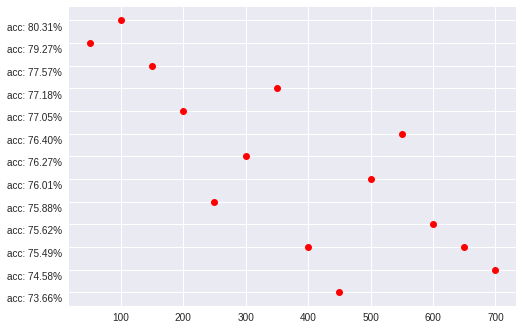

In [25]:
plt.plot((analysisdf.loc[:,"batchsize"]),(analysisdf.loc[:,"accuracy"]), 'ro')
plt.savefig('drive/Colab Notebooks/foo.png')

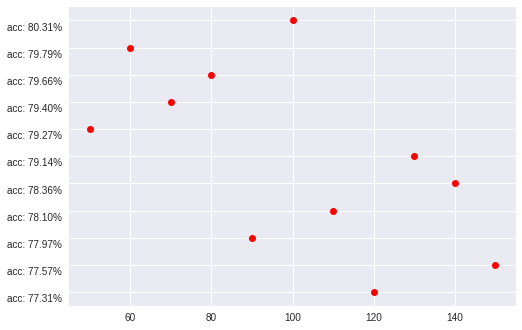

In [28]:
plt.plot((analysisdf.loc[:,"batchsize"]),(analysisdf.loc[:,"accuracy"]), 'ro')
plt.savefig('drive/Colab Notebooks/foo1.png')

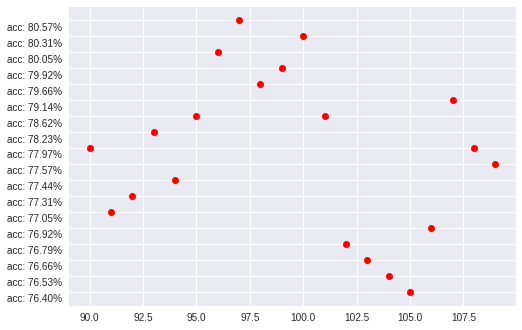

In [31]:
plt.plot((analysisdf.loc[:,"batchsize"]),(analysisdf.loc[:,"accuracy"]), 'ro')
plt.savefig('drive/Colab Notebooks/foo2.png')